<a id='top'></a>

# Texas COVID Vulnerability Report
**by Yvonne King, Brandi Reger, Jada Shipp, and Wenliang Sun**

**Quick Notebook Reference**

**1.** [**Project Plan**](#project_plan)<br>
**2.** [**Acquire Data**](#acquire_data)<br>
**3.** [**Prepare Data**](#prepare_data)<br>
**3.** [**Exploration**](#explore_data)<br>
**4.** [**Distribution Data whith Categorical Population Density**](#cat_pop_density)<br>
**5.** [**Correlation Between Population Density and Infection Percent**](#pop_density_infection_percent)<br>
**6.** [**Correlation Between Senior Citizen Status and Infection Percent**](#senior_citizens)<br>
**7.** [**Correlation Between Nursing Homes and Infection Percent**](#nursing_homes)<br>
**8.** [**Correlation Between SVI scores and Infection Percent**](#SVI_scores)<br>
**9.** [**Conclusions**](#conclusions)<br>

<a id='project_plan'></a>

## Project Plan

**Acquisition, Prep, and Initial Exploration**
* Collect all files from CDC, USDA, TXDHS
* Create a dataframe using pandas for each file
* Clean and prepare the data to perform aggregations and merge each dataframe together
* Remove/repair erroneous data
* Look at shape of data

**Exploration**
- Answer the following questions:
    - What social features do counties with COVID-19 have in common?


**Main Hypotheses**

- $H_0$: Vulnerability score is not related to higher infection rate.
- $H_a$: Vulnerability score is related to higher infection rate


- $H_0$: Population density correlates to higher infection rate
- $H_a$: Population density does not correlate to higher infection rate 


- $H_0$: Counties with higher population of senior citizens have higher infection rates
- $H_a$: Counties with higher population of senior citizens do not have higher infection rates

[**Back to top**](#top)<br>

## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Hypothesis testing
from math import sqrt
from scipy import stats

import acquire
import prepare
import explore

#Set figure size for all plots
plt.rc("figure", figsize = (16,16))

#Set fontsize for titles
plt.rc("font", size=14)

# Code to show all columns and rows of the dataframe 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

[**Back to top**](#top)<br>

<a id='acquire_data'></a>

## Acquire
- The ```acquire.py``` file has all the functions to call in our dataframes for the Texas subsets of the following files (which can be found in the Data folder:
    - County Classification
    - Cumulative Tests over Time by County
    - Food1
    - Hospitals
    - Jobs
    - NursinfFacilities
    - People
    - time_series_covid19_confirmed_US
    - Variable Name Lookup
    - Veterans
- We went through all the files above and dropped erroneous columns
- After each file was combed through, we combined all data into one large dataframe using the```merge_dataframes()``` function in the ```acquire.py```

In [2]:
#bring in complete dataframe
df = acquire.merge_dataframes()

#take a peek at the data
df.sample(5)

LACCESS_POP15    County  MedHHInc  Deep_Pov_All  PovertyUnder18Num  \
53      291.171379    crosby   37911.0      8.944637              563.0   
56   393661.068695    dallas   59838.0      6.501647           141359.0   
190   14799.874970   randall   69600.0      3.041623             3651.0   
67    28118.394313     ector   60431.0      4.661063             8634.0   
44     4316.817179  colorado   48258.0      4.325970             1047.0   

     PovertyAllAgesNum  LandAreaSQMiles2010  TotalPopEst2018  \
53              1349.0               900.20           5779.0   
56            368310.0               871.28        2637772.0   
190            11343.0               911.54         136271.0   
67             20485.0               897.69         162124.0   
44              2845.0               960.27          21217.0   

     Age65AndOlderNum2010  Under18Num2010  NaturalChange1018  AvgHHSize  \
53                   1058            1747               81.0       2.83   
56                 207972          654263           192342.0       2.79   
190                 15079           30103             5112.0       2.65   
67                  13954           39808            12907.0       3.02   
44                   4040            4968              -50.0       2.75   

     TotalOccHU  OwnHomeNum  FemaleHHNum  TotalHH  NonEnglishHHNum  \
53         2044        1451          290     2044              132   
56       917276      459974       143804   917276           104214   
190       49187       34560         5537    49187              940   
67        51954       34099         8207    51954             4839   
44         7511        6141          914     7511              265   

     HH65PlusAloneNum  Ed1LessThanHSNum  Ed2HSDiplomaOnlyNum  \
53                302               895                 1348   
56              69305            351441               372587   
190              4877              7072                19061   
67               4125             22442                28230   
44               1116              2651                 5218   

     Ed3SomeCollegeNum  Ed4AssocDegreeNum  Ed5CollegePlusNum  \
53                 822                208                480   
56              323718              94410             506554   
190              24416               8569              27833   
67               22505               5947              14604   
44                2662               1132               2673   

     WhiteNonHispanicNum2010  BlackNonHispanicNum2010  \
53                      2625                      199   
56                    784693                   518732   
190                    94361                     2701   
67                     56306                     5596   
44                     12496                     2636   

     AsianNonHispanicNum2010  NativeAmericanNonHispanicNum2010  \
53                         4                                13   
56                    117797                              7330   
190                     1625                               586   
67                      1004                               623   
44                        75                                24   

     HispanicNum2010  MultipleRaceNum2010 State  MedianVetsInc  \
53              3171                  123    TX        27171.0   
56            905940                66863    TX        40956.0   
190            19775                 2695    TX        50472.0   
67             72331                 3402    TX        43284.0   
44              5452                  394    TX        37781.0   

     MedianNonVetsInc  Vets18ONum  CLFVets18to64Num  NonVetsDisabilty  \
53            20286.0       205.0             101.0             502.0   
56            30076.0     93879.0           52366.0          120953.0   
190           33243.0      8915.0            5268.0            6438.0   
67            31095.0      6269.0            3758.0            9632.0   
44            27315.0    

In [3]:
#look at the shape of the data
df.shape

(254, 78)

In [4]:
#look at data types and counts
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 0 to 253
Data columns (total 78 columns):
LACCESS_POP15                         253 non-null float64
County                                254 non-null object
MedHHInc                              254 non-null float64
Deep_Pov_All                          254 non-null float64
PovertyUnder18Num                     254 non-null float64
PovertyAllAgesNum                     254 non-null float64
LandAreaSQMiles2010                   254 non-null float64
TotalPopEst2018                       254 non-null float64
Age65AndOlderNum2010                  254 non-null int64
Under18Num2010                        254 non-null int64
NaturalChange1018                     254 non-null float64
AvgHHSize                             254 non-null float64
TotalOccHU                            254 non-null int64
OwnHomeNum                            254 non-null int64
FemaleHHNum                           254 non-null int64
TotalHH              

In [5]:
df

LACCESS_POP15         County  MedHHInc  Deep_Pov_All  PovertyUnder18Num  \
0     23111.241421       anderson   45969.0      4.287712             2486.0   
1      5015.975463        andrews   84946.0      3.720851              774.0   
2     20927.331551       angelina   46653.0      7.613627             5855.0   
3      8865.511478        aransas   46912.0      9.002793             1423.0   
4      2147.672378         archer   61190.0      3.490241              268.0   
5      1896.207974      armstrong   57210.0      1.680217               66.0   
6      9400.113631       atascosa   50594.0      6.014197             3254.0   
7      3256.073226         austin   59942.0      3.212152             1184.0   
8       667.901387         bailey   45051.0      7.730747              565.0   
9      7158.456173        bandera   53008.0      5.403271              829.0   
10    21416.782497        bastrop   61883.0      4.414494             4182.0   
11      455.647221         baylor   41180.0      5.120137              232.0   
12    10775.395693            bee   41806.0      9.763147             2134.0   
13   103120.541995           bell   54292.0      6.011905            18493.0   
14   451601.664033          bexar   54210.0      6.774865           118619.0   
15      485.062880         blanco   64832.0      2.962896              363.0   
16      641.000000         borden   66101.0      1.057402               19.0   
17     1762.381976         bosque   48460.0      4.577823              954.0   
18    20113.870643          bowie   47339.0      8.460885             5642.0   
19    69647.355857       brazoria   74225.0      4.024407            12620.0   
20    52558.408686         brazos   50113.0     15.102377             9297.0   
21     2642.144081       brewster   45670.0      6.426906              366.0   
22     1637.000002        briscoe   44409.0      6.369009               68.0   
23     1179.309819         brooks   30116.0     17.924671              972.0   
24    13832.296476          brown   47097.0      5.975664             1703.0   
25     2215.593346       burleson   53626.0      5.454129              948.0   
26    14182.998882         burnet   56696.0      3.340408             1872.0   
27     5776.481970       caldwell   52588.0      9.533015             2059.0   
28     7732.014137        calhoun   52085.0      4.725362             1239.0   
29     4001.973448       callahan   50330.0      7.799443              624.0   
30   100015.195854        cameron   38106.0     13.688837            50998.0   
31     1247.022111           camp   43714.0      8.213053             1039.0   
32     1235.921865         carson   64799.0      4.142905              175.0   
33     2118.904961           cass   44154.0      7.822681             2140.0   
34      960.309637         castro   45689.0      7.282694              523.0   
35     6741.755307       chambers   89513.0      5.025628             1280.0   
36     8279.829288       cherokee   43483.0      7.192471             3253.0   
37     3108.749950      childress   42291.0      4.830918              360.0   
38     5527.836258           clay   58356.0      4.914842              348.0   
39      662.163643        cochran   42873.0     11.250435              235.0   
40     3319.212896           coke   44804.0      4.051915              149.0   
41     1745.746927        coleman   39484.0      7.418043              528.0   
42    99230.762309         collin   96936.0      3.089090            17331.0   
43      224.944088  collingsworth   39536.0      5.804029              207.0   
44     4316.817179       colorado   48258.0      4.325970             1047.0   
45    23139.175920          comal   76523.0      4.051168             3396.0   
46     2143.457501       comanche   52251.0      7.047892              732.0   
47     1092.264684         concho   40987.0      4.693611              129.0   
48     2805.004589          cooke   52047.0      5.145674             2329.0   
49   

[**Back to top**](#top)<br>

<a id='prepare_data'></a>

# Prepare

During the preparation phase we:
1. Handled any null values by replacing them with zero since each row represents a county in Texas
2. Added the following calculated fields:
    - Cases per 1k, 10k, & 100k
    - Positivity rate (cases / tests)
    - population density (how many people per sq mile of land in the county)
    - numerical columns into percents
    - Proportion of all children that live below poverty line
    - Proportion of population that live below poverty line
    - Proportion of seniors that live below poverty line
    - Percentage of heads of house who own their home
    - Rent home percentage
    - Percentage for female heads of households
    - of all heads of households, what proportion are over 65 and live alone
    - of all heads of households, what proportion do not speak english
    - of the adult population, what proportion have what level of education
    - of the population, what proportion are various races
    - How does the median income for vets compare to the median income in the county
    - What proportion of the adult population is a vet
    - What proportion of the adult population is disabled
    - What proportion of the vet population is poor
3. Capitalized county name
4. Updated all datatypes
5. Rounded decimals to 2 pints
6. Created the following categorical columns:
    - Population density binned into High, Mid and low
    - Infection percent binned into High, Mid and low

Functions have been created to handle all of the above in the ```prepare.py``` file

To bring in the data we will call the ```get_data()``` function from the ```prepare.py``` file

In [6]:
#read in dataframe
df = prepare.get_data()

In [7]:
#take a look at a sample of our data to ensure everything came in as anticipated
df.sample(3)

LACCESS_POP15    County  MedHHInc  Deep_Pov_All  PovertyUnder18Num  \
36     8279.829288  Cherokee     43483      7.192471               3253   
149    5991.281579     Llano     54019      4.049554                771   
128    8665.570582   Kaufman     67434      4.829521               5365   

     PovertyAllAgesNum  LandAreaSQMiles2010  TotalPopEst2018  \
36                8623                 1052            52592   
149               2628                  934            21646   
128              14539                  780           128622   

     Age65AndOlderNum2010  Under18Num2010  NaturalChange1018  AvgHHSize  \
36                   7608           13173               1757       2.73   
149                  6002            3077              -1147       2.41   
128                 10622           29754               5301       3.14   

     TotalOccHU  OwnHomeNum  FemaleHHNum  TotalHH  NonEnglishHHNum  \
36        17940       12890         2391    17940              913   
149        8491        6791          491     8491              103   
128       37364       28509         5017    37364             1051   

     HH65PlusAloneNum  Ed1LessThanHSNum  Ed2HSDiplomaOnlyNum  \
36               2006              6989                10640   
149              1619              2321                 4295   
128              3004             10550                25276   

     Ed3SomeCollegeNum  Ed4AssocDegreeNum  Ed5CollegePlusNum  \
36                8001               2482               5708   
149               4431               1264               4251   
128              18463               6191              15799   

     WhiteNonHispanicNum2010  BlackNonHispanicNum2010  \
36                     31892                     7401   
149                    17303                      102   
128                    72328                    10571   

     AsianNonHispanicNum2010  NativeAmericanNonHispanicNum2010  \
36                       221                               125   
149                       76                                87   
128                      869                               551   

     HispanicNum2010  MultipleRaceNum2010  MedianVetsInc  MedianNonVetsInc  \
36             10499                 1102          29974             23291   
149             1542                  273          32211             22429   
128            17548                 2357          44546             30658   

     Vets18ONum  CLFVets18to64Num  NonVetsDisabilty  VetsDisabilty  \
36         2942              1196              2897            177   
149        2548               734              1853            234   
128        6901              4017              7295            756   

     NonVetsPoor  VetsPoor  UnempRate2018  NumCivLaborforce2018  \
36          4532        92            4.1                 20979   
149         1133        60            3.7                  8543   
128         8104       159            3.5                 61846   

     PctEmpAgriculture  PctEmpMining  PctEmpConstruction  PctEmpManufacturing  \
36            3.236103      2.951287           10.042231            10.474367   
149           3.084667      1.729479           15.862158             4.594734   
128           0.609767      1.065278            9.075731             9.558463   

     PctEmpTrade  PctEmpTrans  PctEmpInformation  PctEmpFIRE  PctEmpServices  \
36     13.990375     4.468670           1.443724    4.134748       43.203693   
149    12.803304     3.781621           1.226123    5.524006       46.799174   
128    15.260512     6.638477           1.684119    5.676642       45.329655   

     PctEmpGovt  RuralUrbanContinuumCode2013  UrbanInfluenceCode2013  \
36     6.054803                            6                       5   
149    4.594734                            7                      11   
128    5.101356                            1                       1   

     Metro2013  Micropolitan2013  Type_2015_Farming_NO  \
3

In [8]:
#Let's take a quick look at the shape of the data to make sure no rows were dropped
df.shape

(254, 102)

In [9]:
#make sure there are no nulls
df.isnull().sum()

LACCESS_POP15                         0
County                                0
MedHHInc                              0
Deep_Pov_All                          0
PovertyUnder18Num                     0
PovertyAllAgesNum                     0
LandAreaSQMiles2010                   0
TotalPopEst2018                       0
Age65AndOlderNum2010                  0
Under18Num2010                        0
NaturalChange1018                     0
AvgHHSize                             0
TotalOccHU                            0
OwnHomeNum                            0
FemaleHHNum                           0
TotalHH                               0
NonEnglishHHNum                       0
HH65PlusAloneNum                      0
Ed1LessThanHSNum                      0
Ed2HSDiplomaOnlyNum                   0
Ed3SomeCollegeNum                     0
Ed4AssocDegreeNum                     0
Ed5CollegePlusNum                     0
WhiteNonHispanicNum2010               0
BlackNonHispanicNum2010               0


In [10]:
df.isna().sum().sum()

0

In [11]:
df.isna().sum().sum()

0

**Quick Notes**
- Each row in our dataframe represents a County in Texas
- There are 254 Counties in Texas and those counties are broken into 11 regions across Texas
- A Data Dictionary is available in our README file

[**Back to top**](#top)<br>

<a id='explore_data'></a>

# Exploratory Data Analysis (EDA)

In this section we will:
1. View the distribution of our numerical data
1. Look at the region overview

## What does the Distribution of our Data look like by Region?
- Here we are going to look at the following columns:
    - ```RPL_THEME1``` - Socioeconomic 
    - ```RPL_THEME2``` - Household Composition & Disability
    - ```RPL_THEME3``` - Minority Status & Language
    - ```RPL_THEME4``` - Housing Type & Transportation
    - ```RPL_THEMES``` - Overall tract summary ranking variable
    - ```num_covid_cases``` - number of covid cases

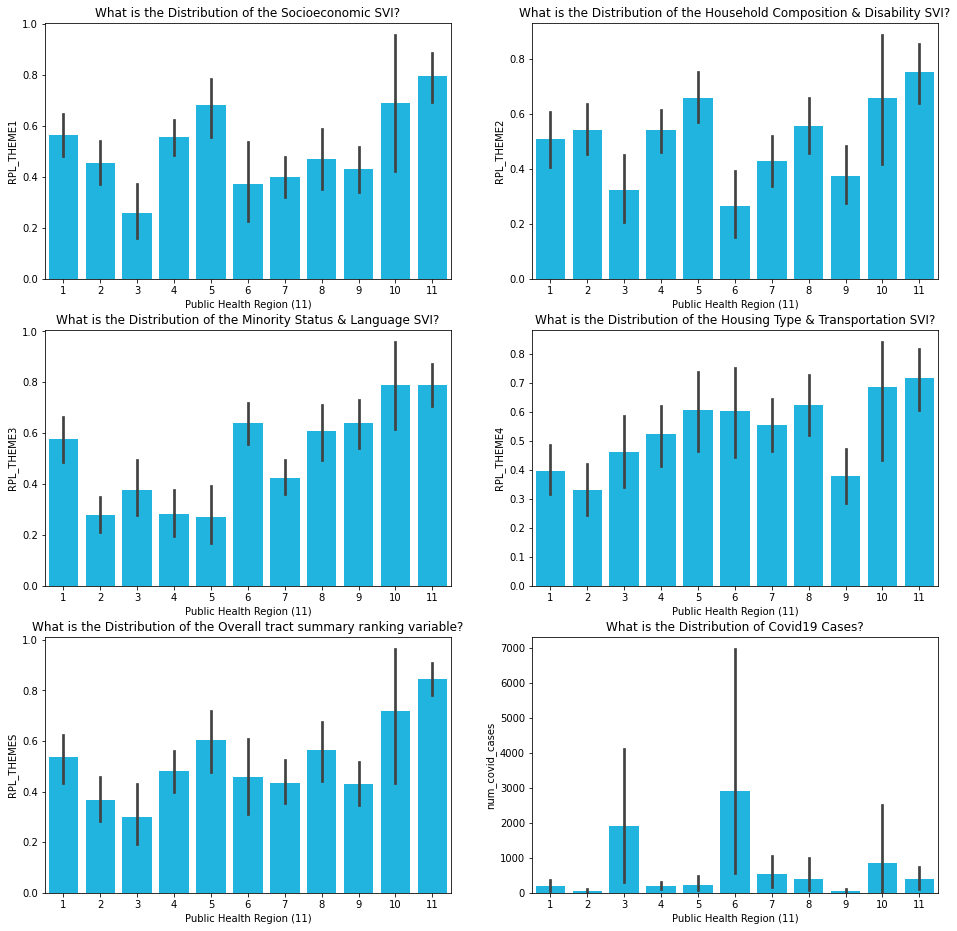

In [12]:
#function to plot our variables from above by region
explore.plot_region_barplots(df)

In [13]:
#subset the 11 regions into their own df using the get_all_region_subsets_for_distro function
df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11 = explore.get_all_region_subsets_for_distro(df)

### Distribution Plots for Region 1

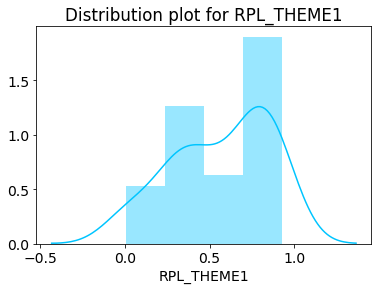

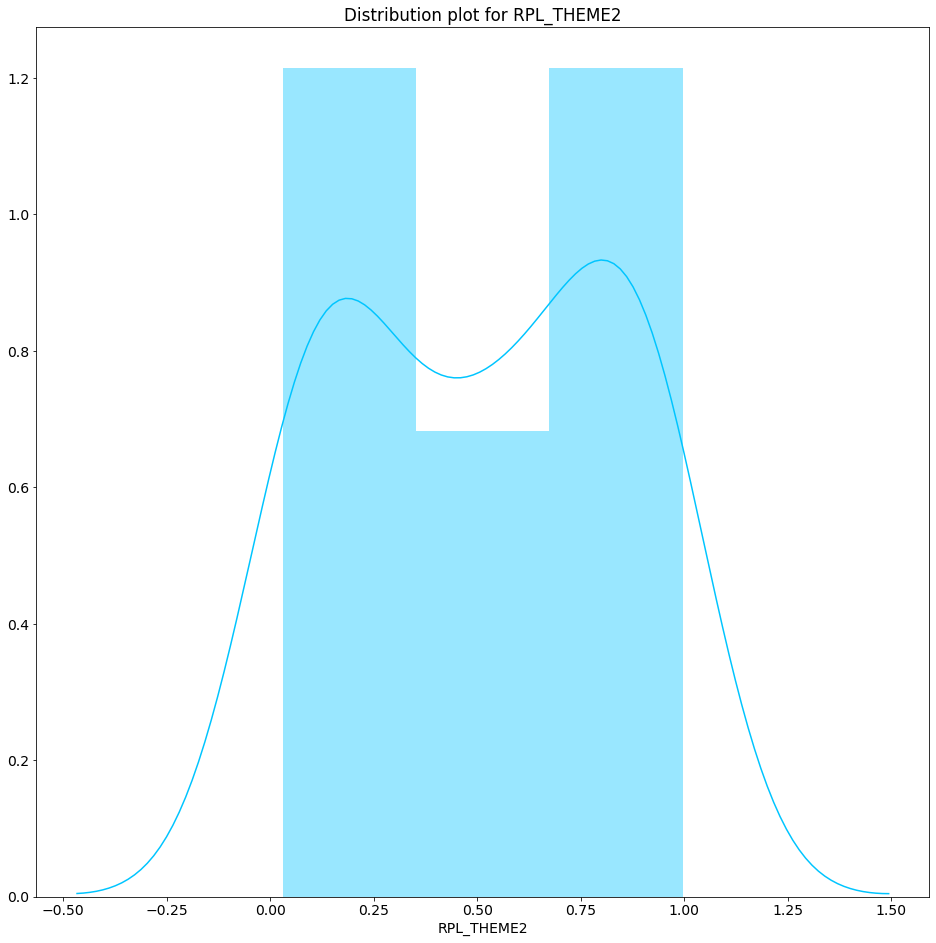

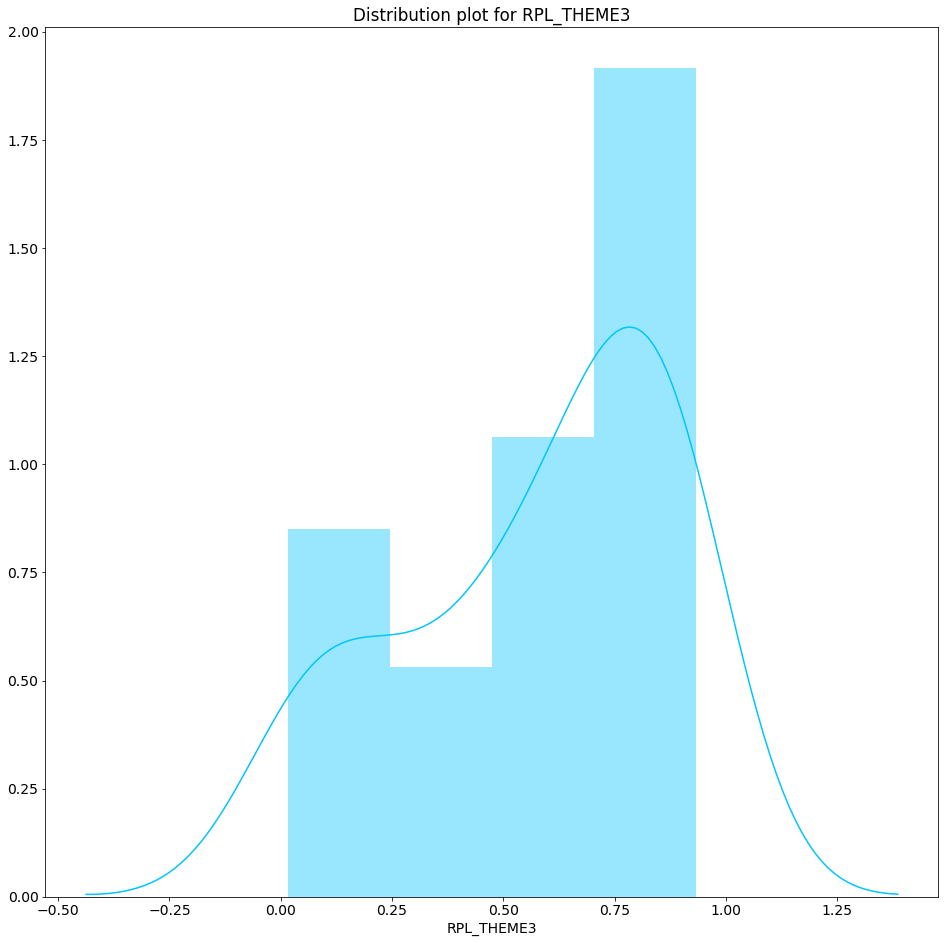

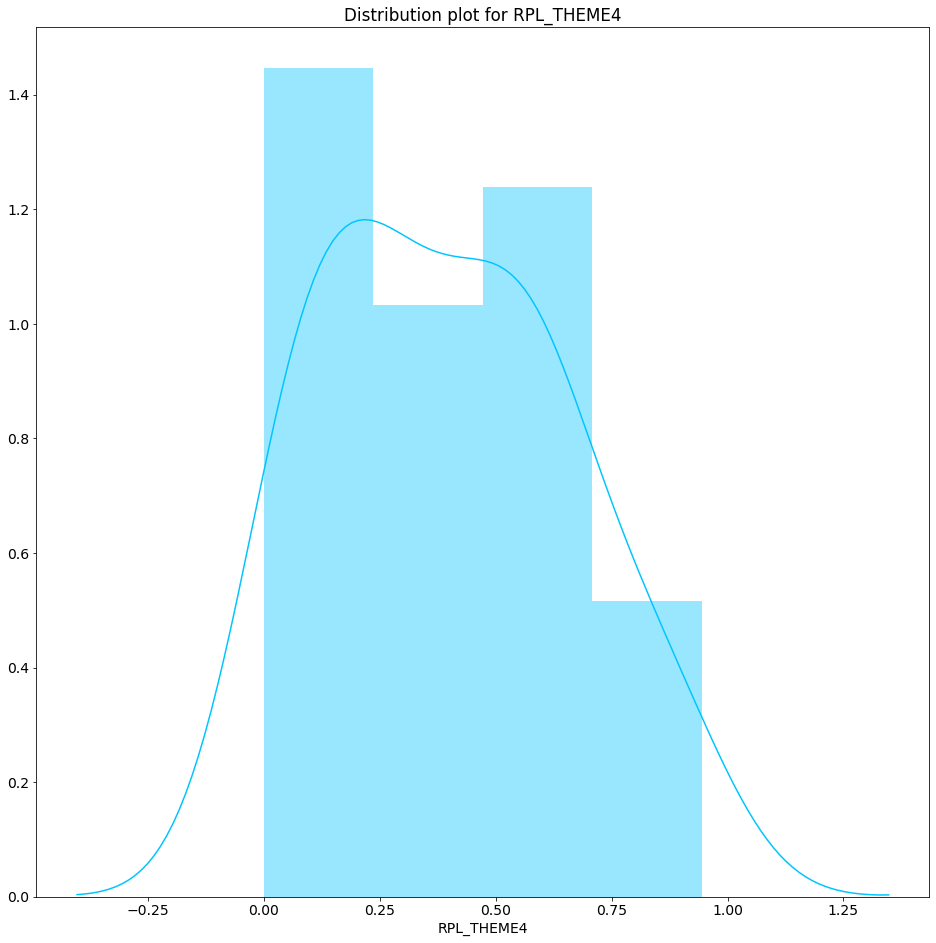

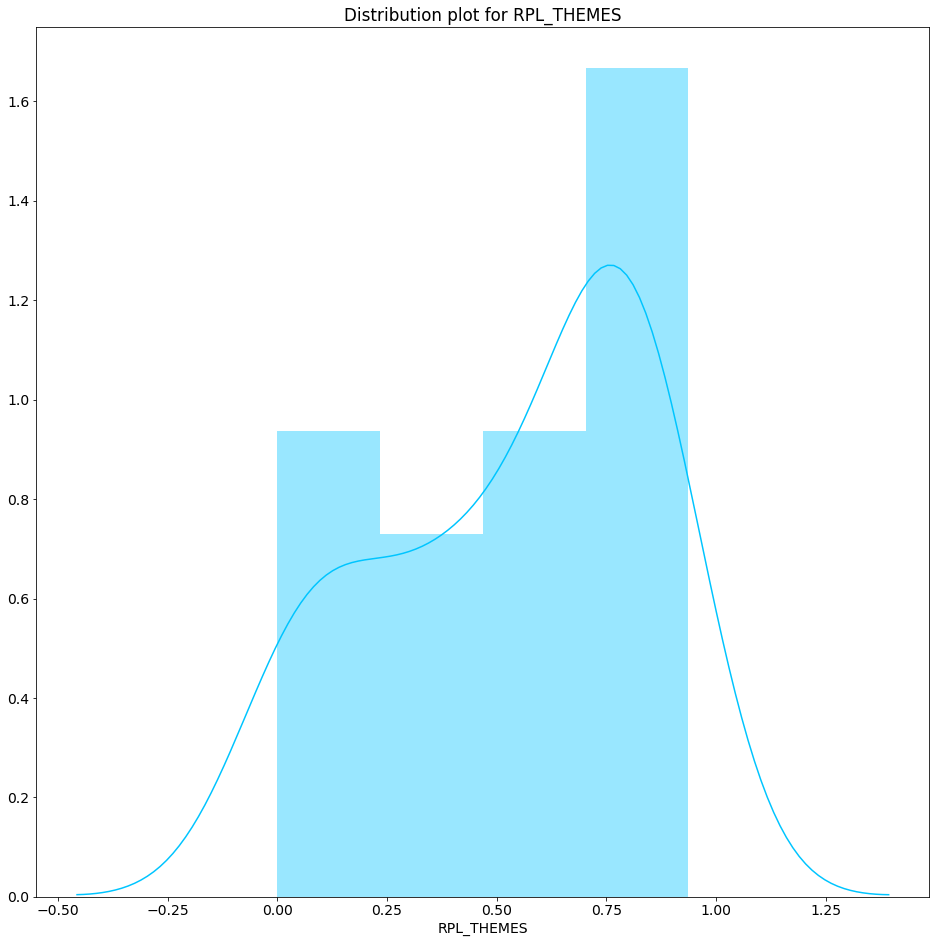

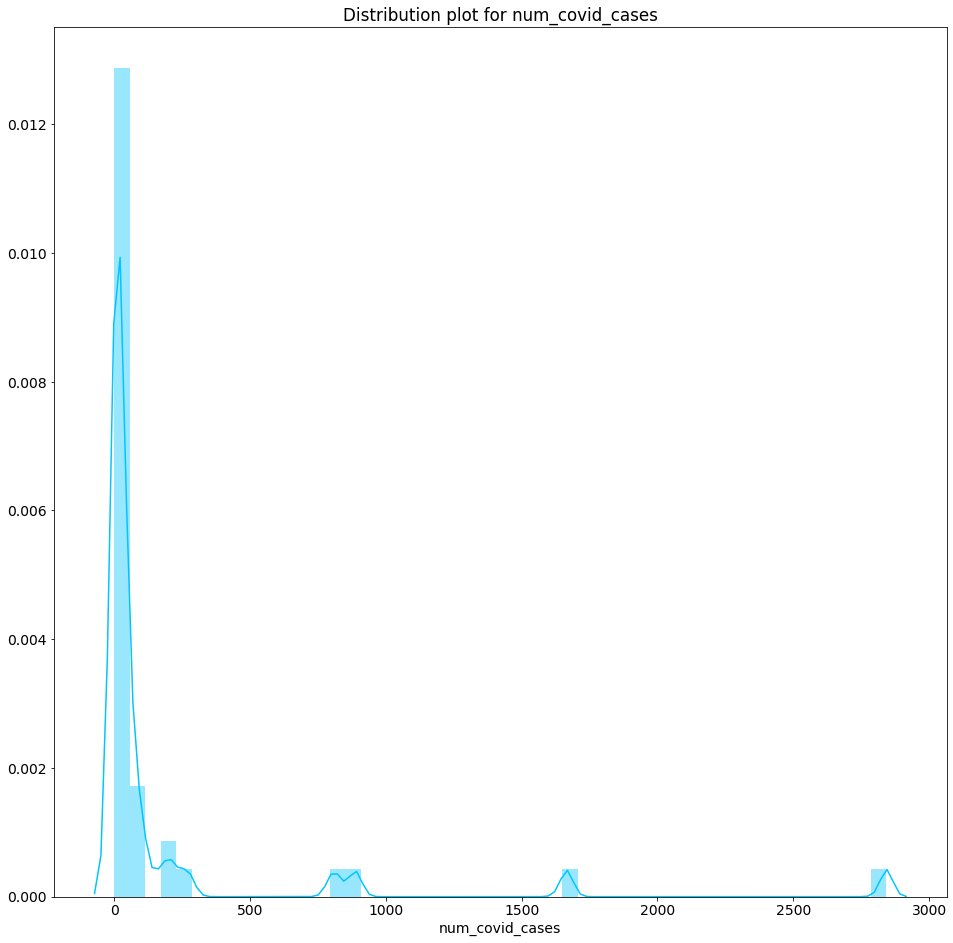

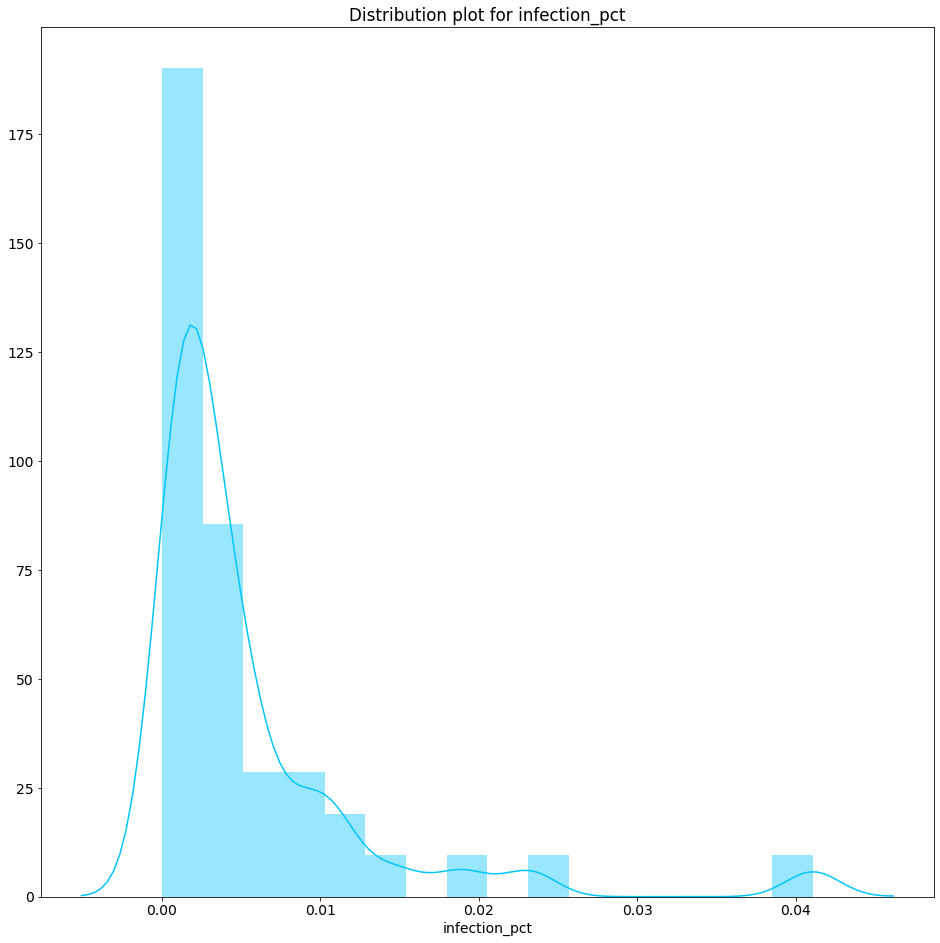

In [14]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_1)

### Distribution Plots for Region 2

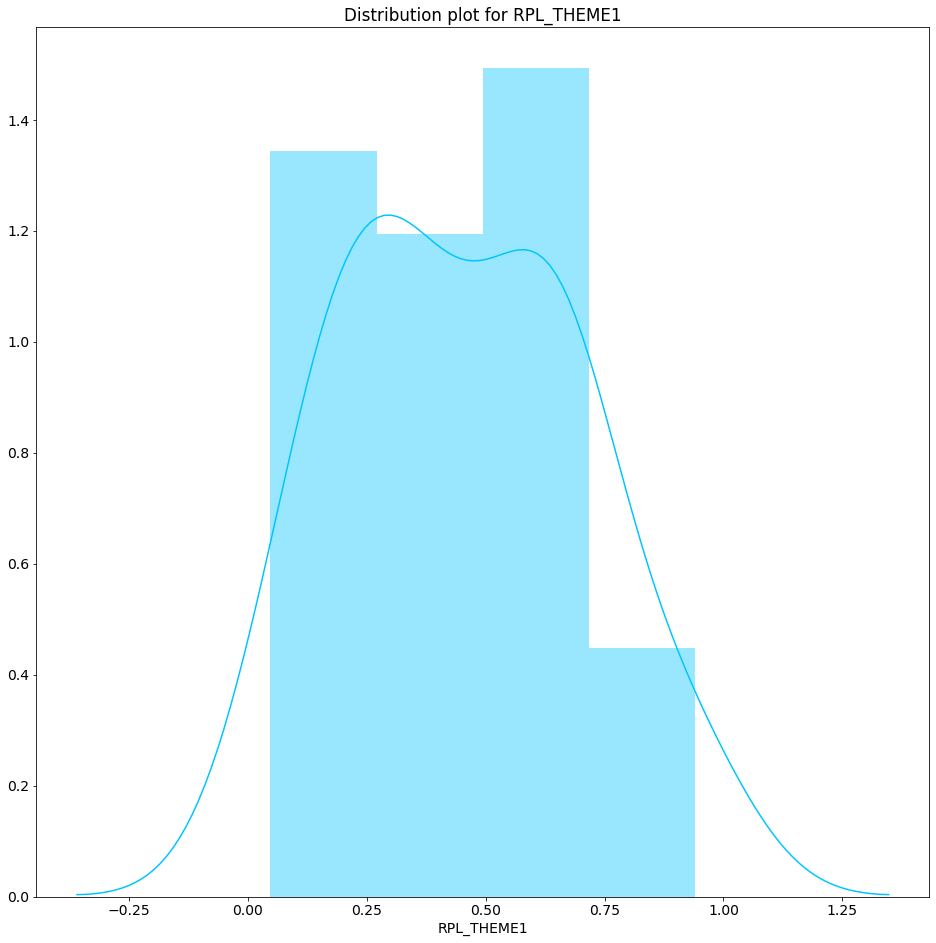

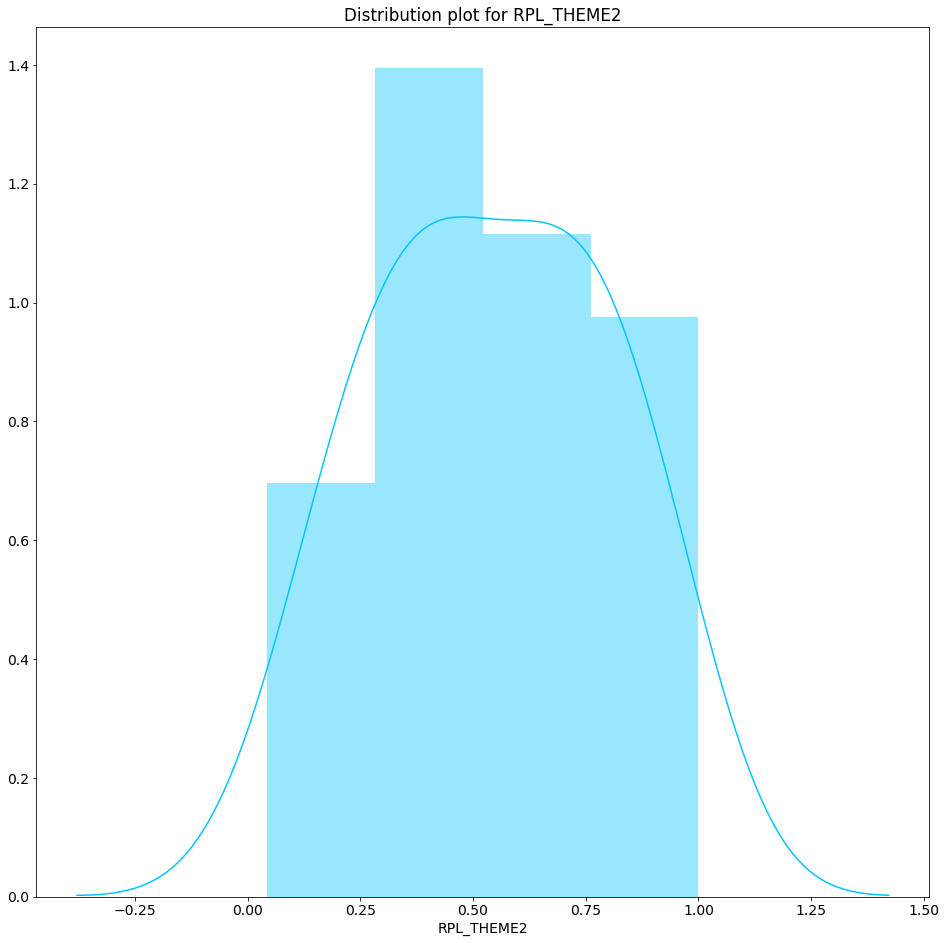

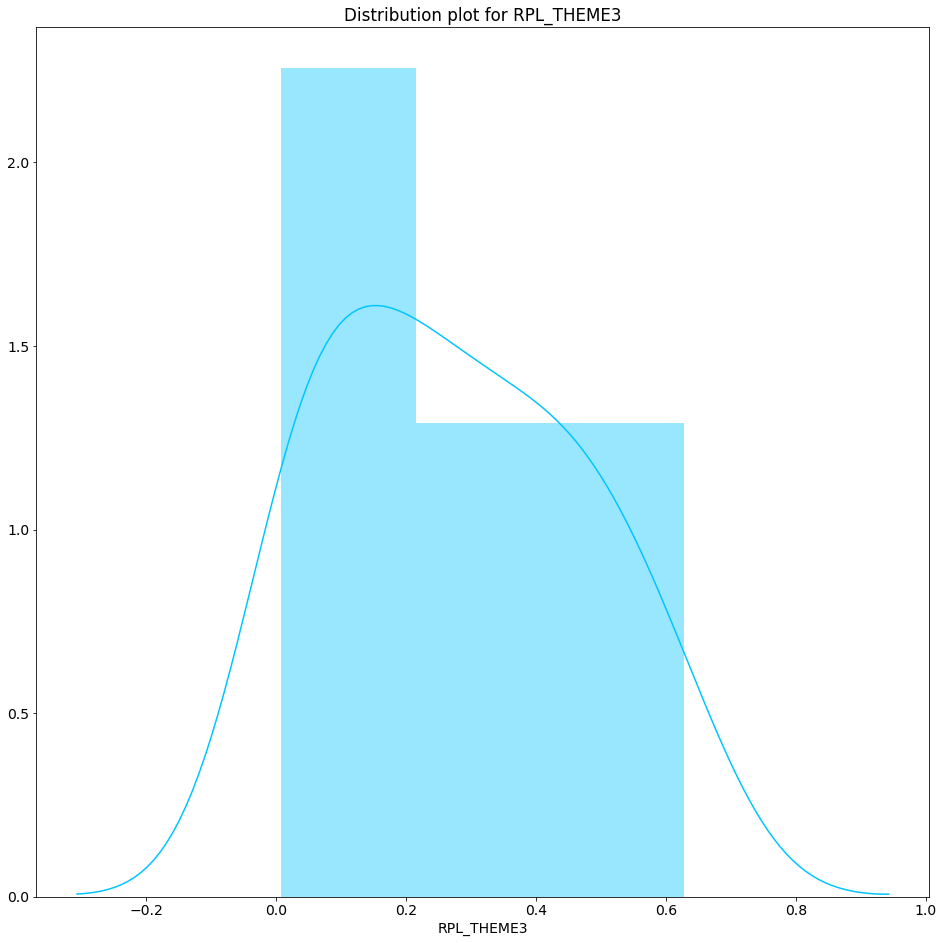

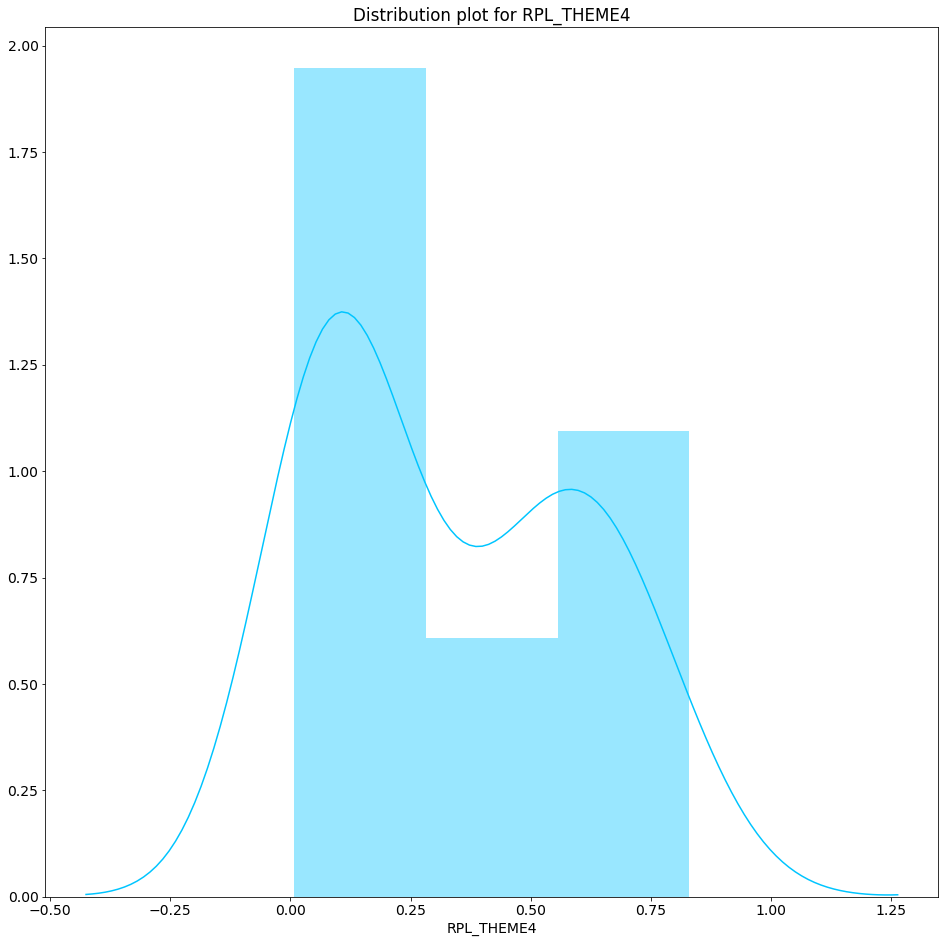

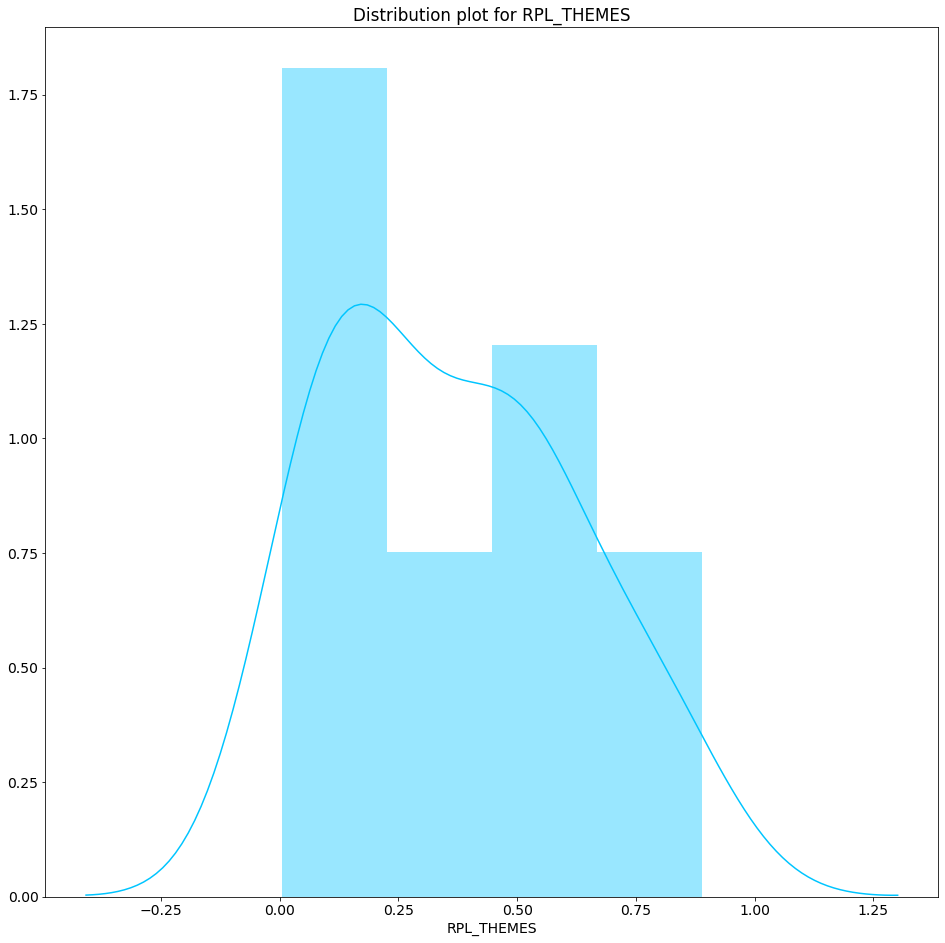

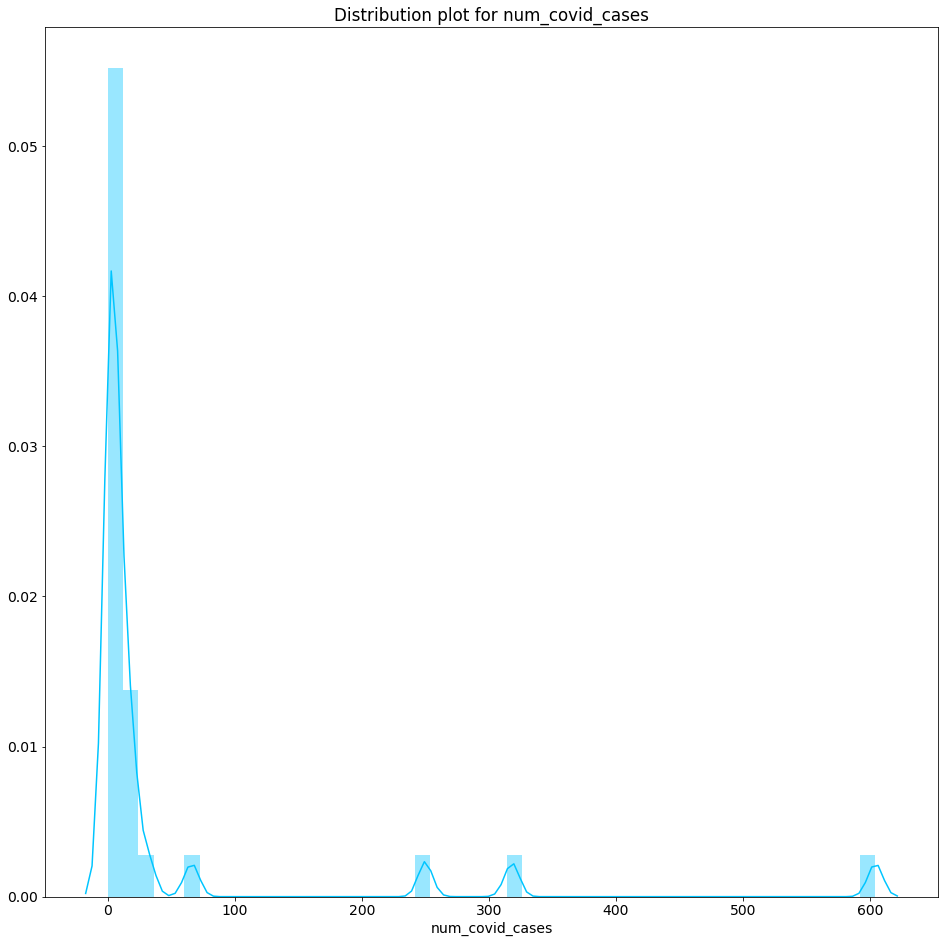

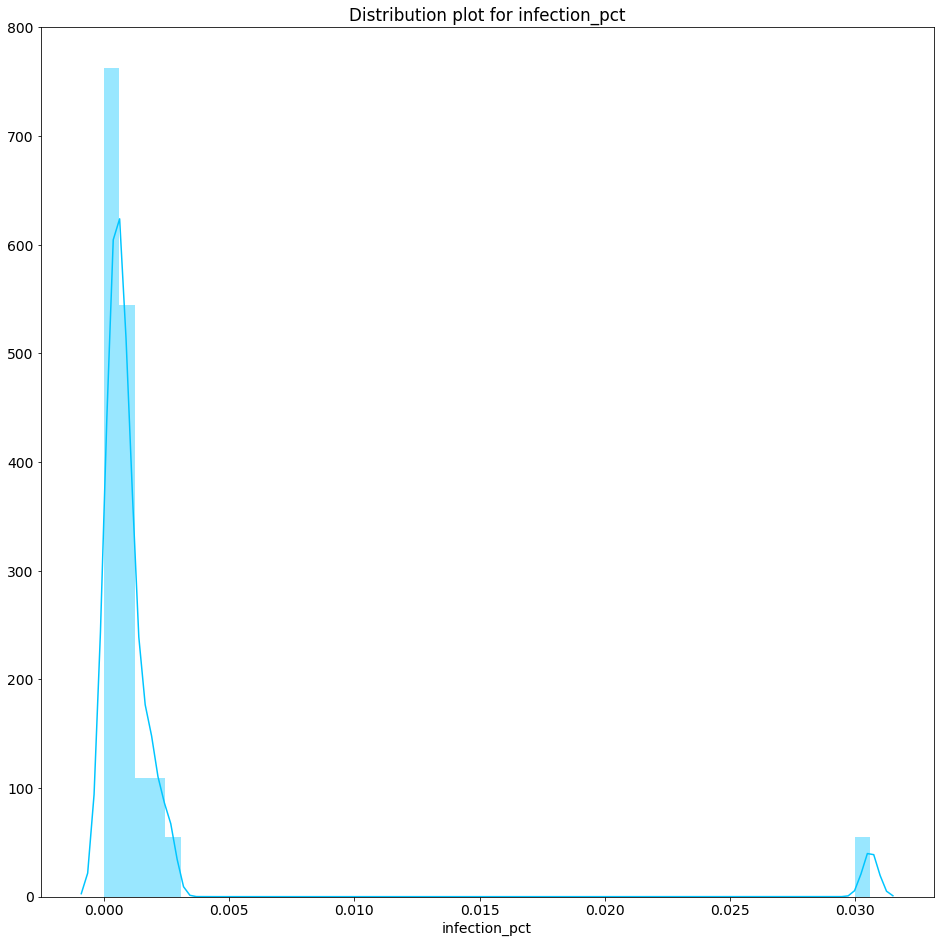

In [15]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_2)

### Distribution Plots for Region 3

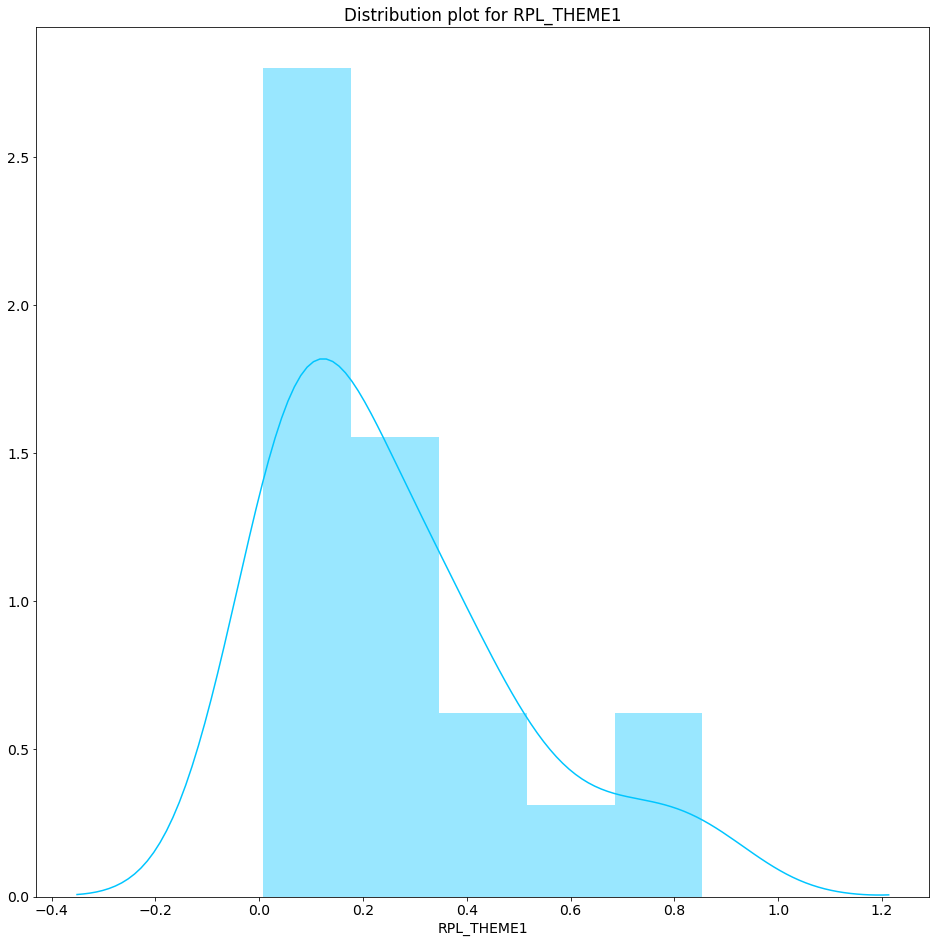

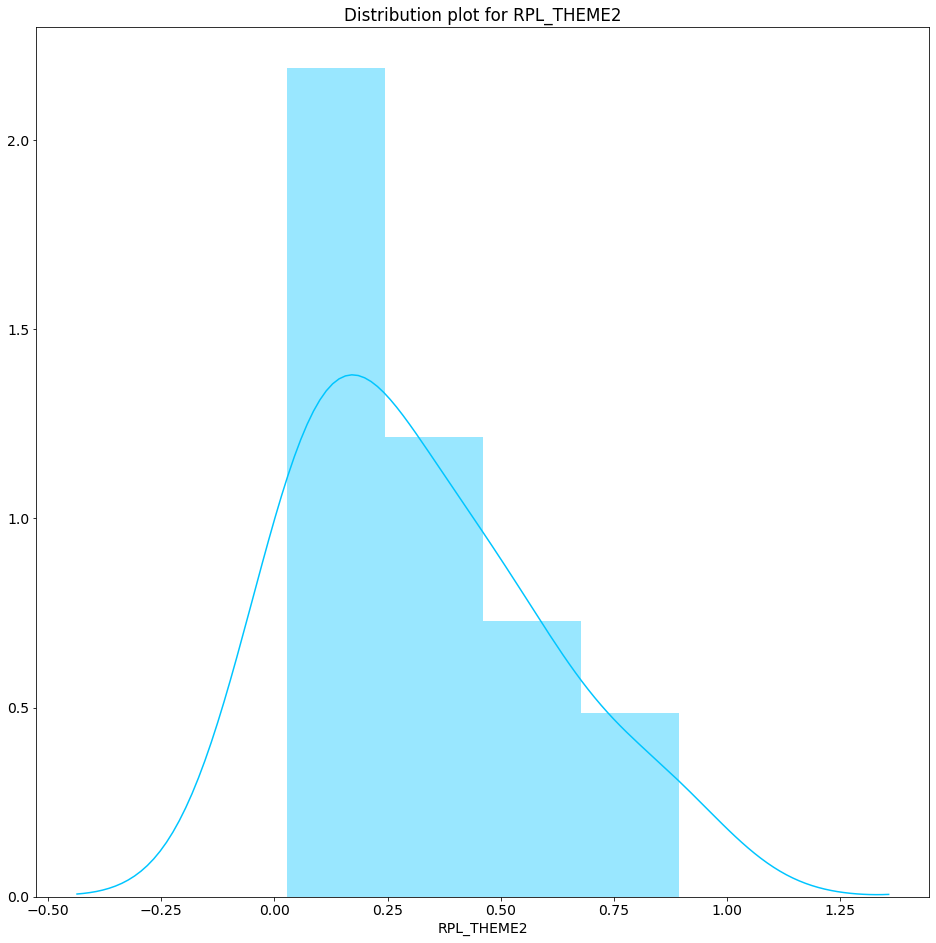

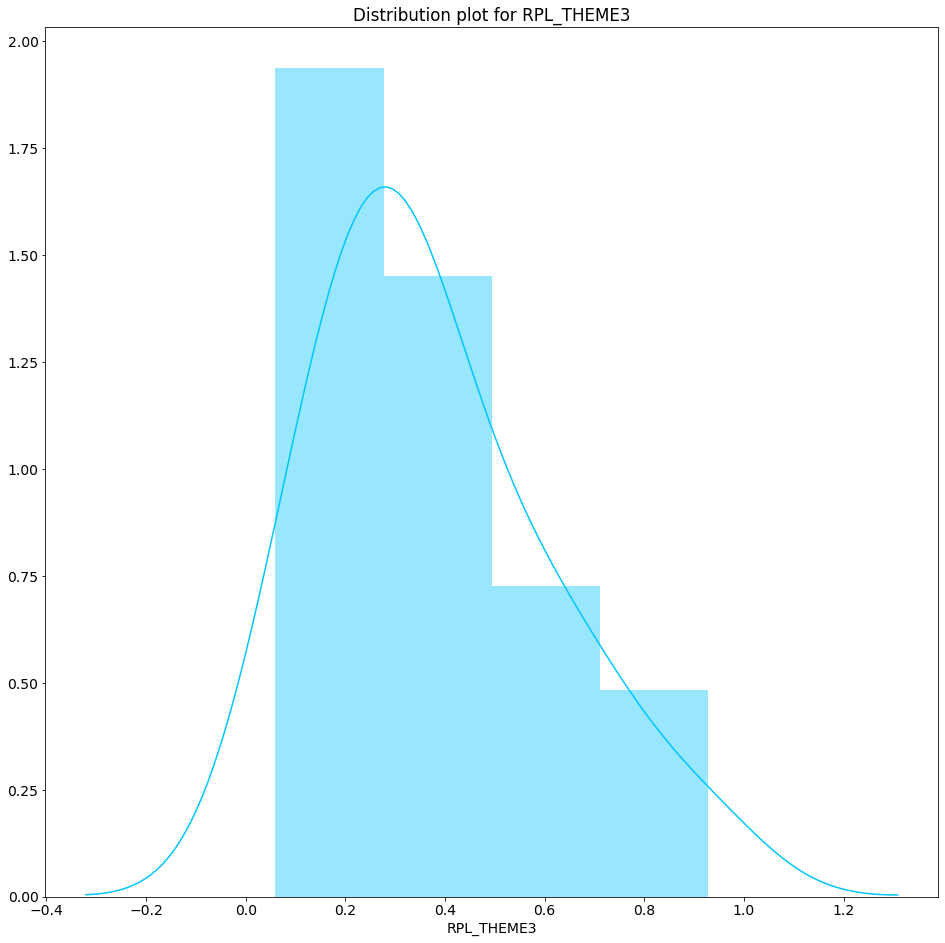

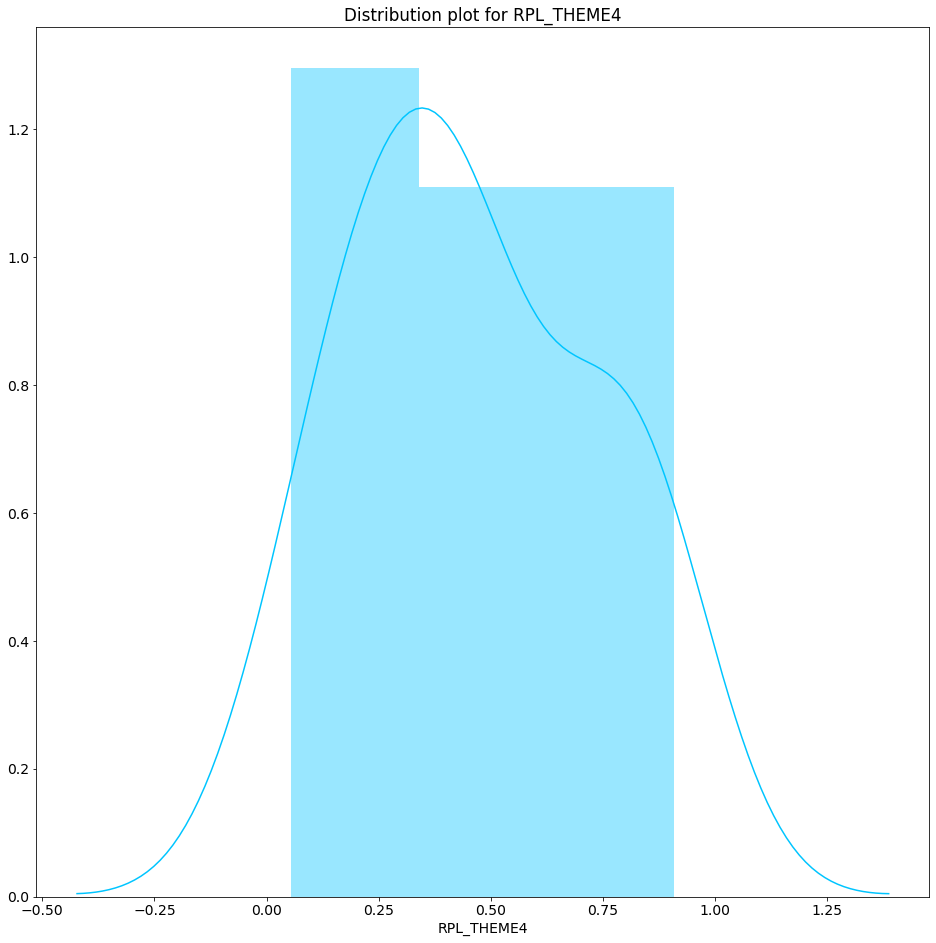

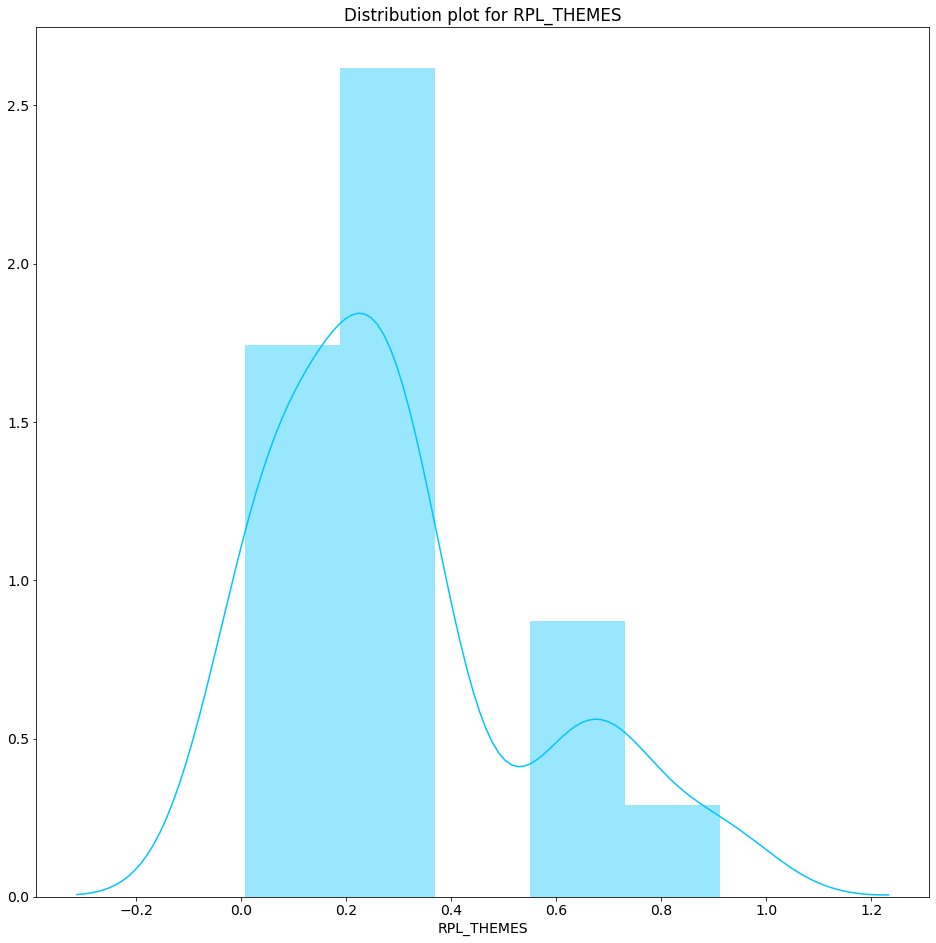

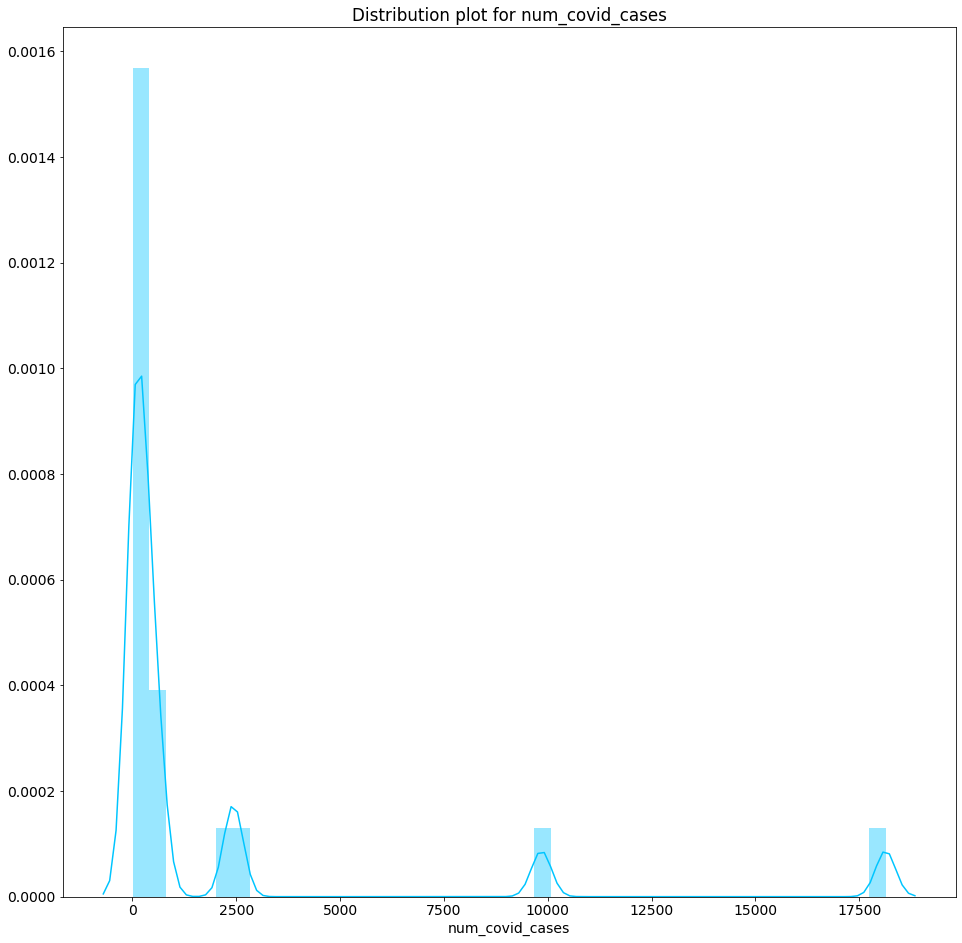

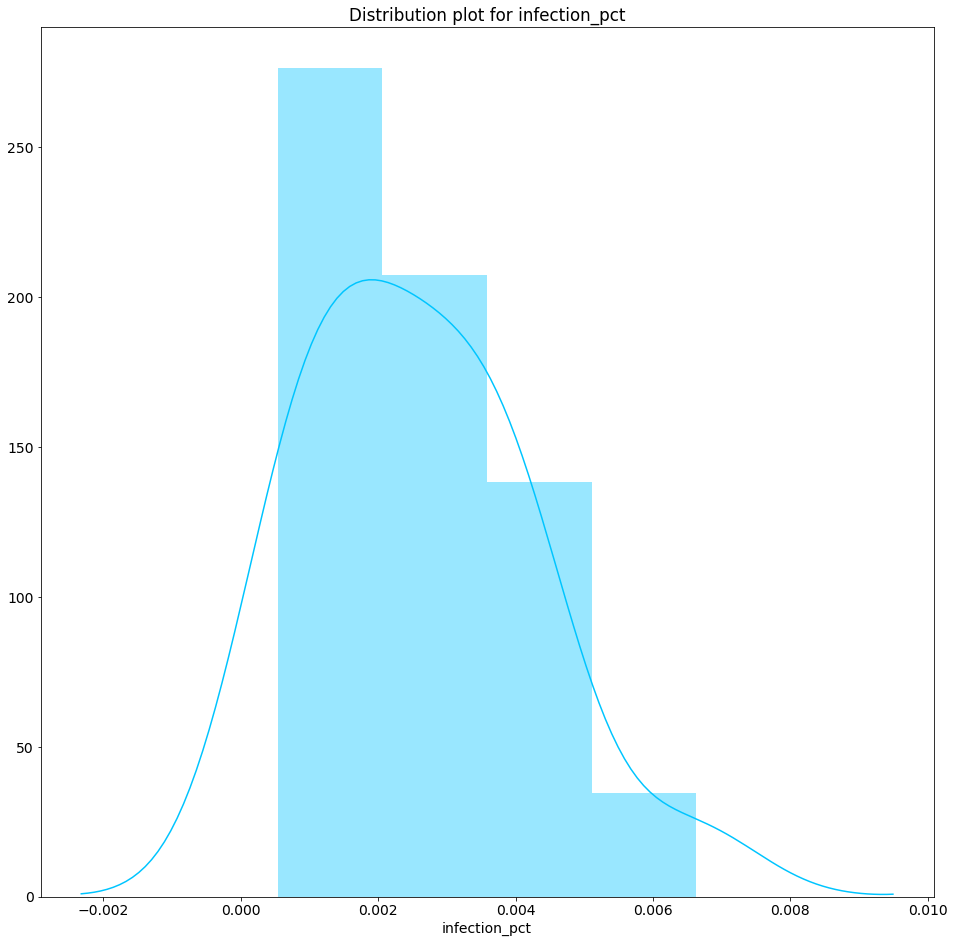

In [16]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_3)

### Distribution Plots for Region 4

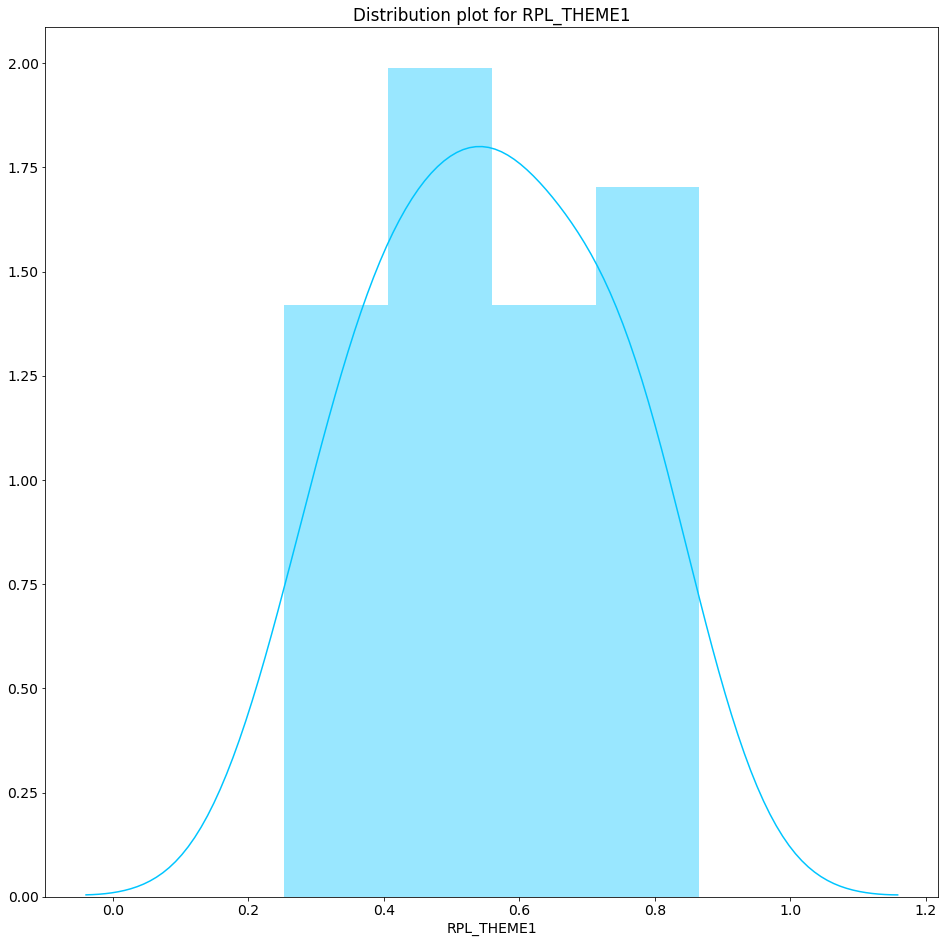

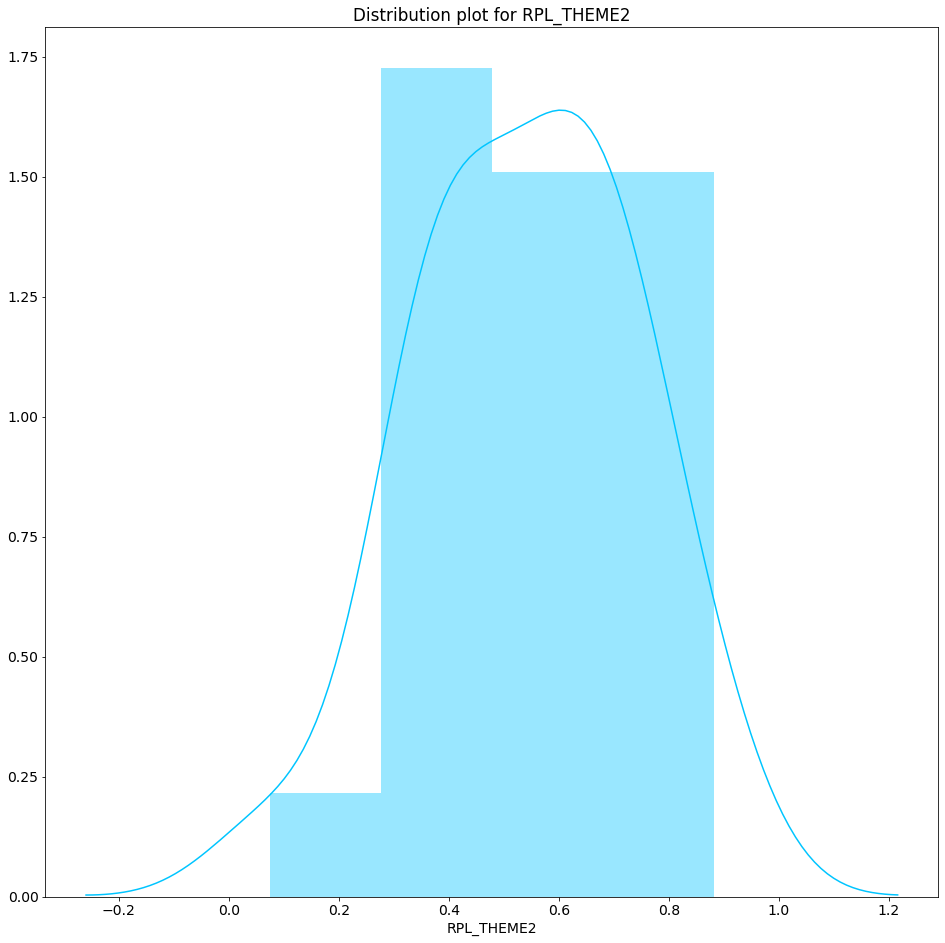

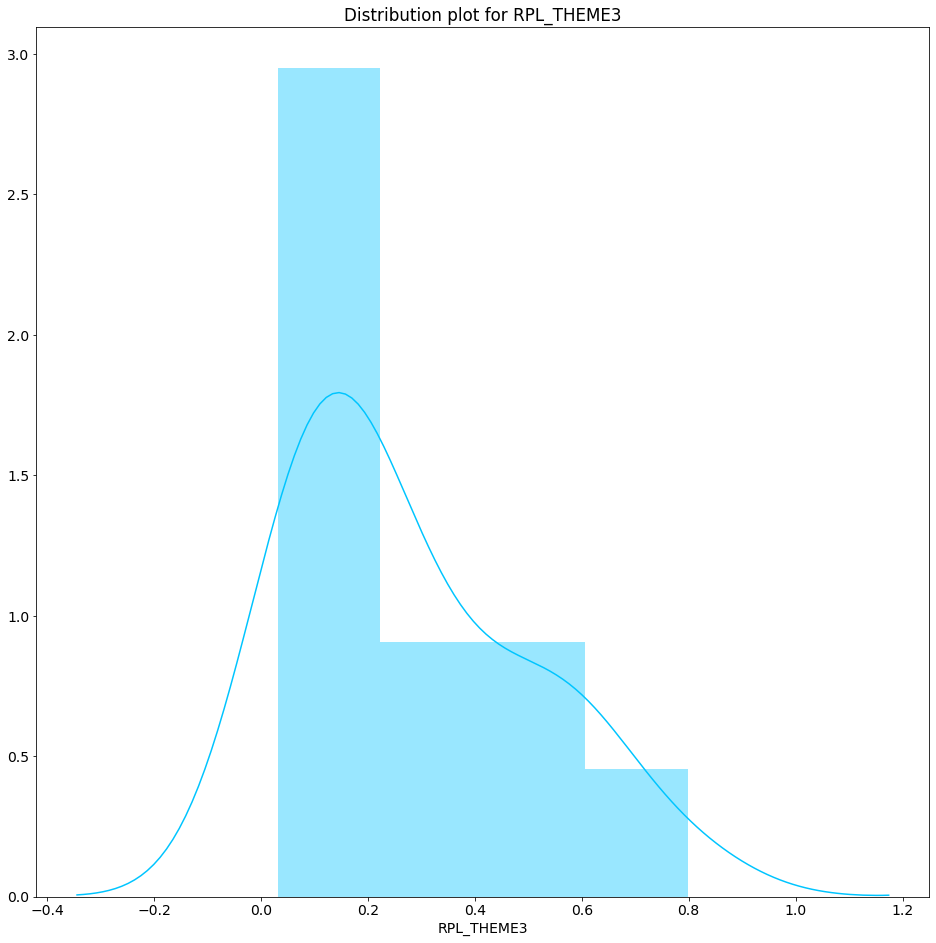

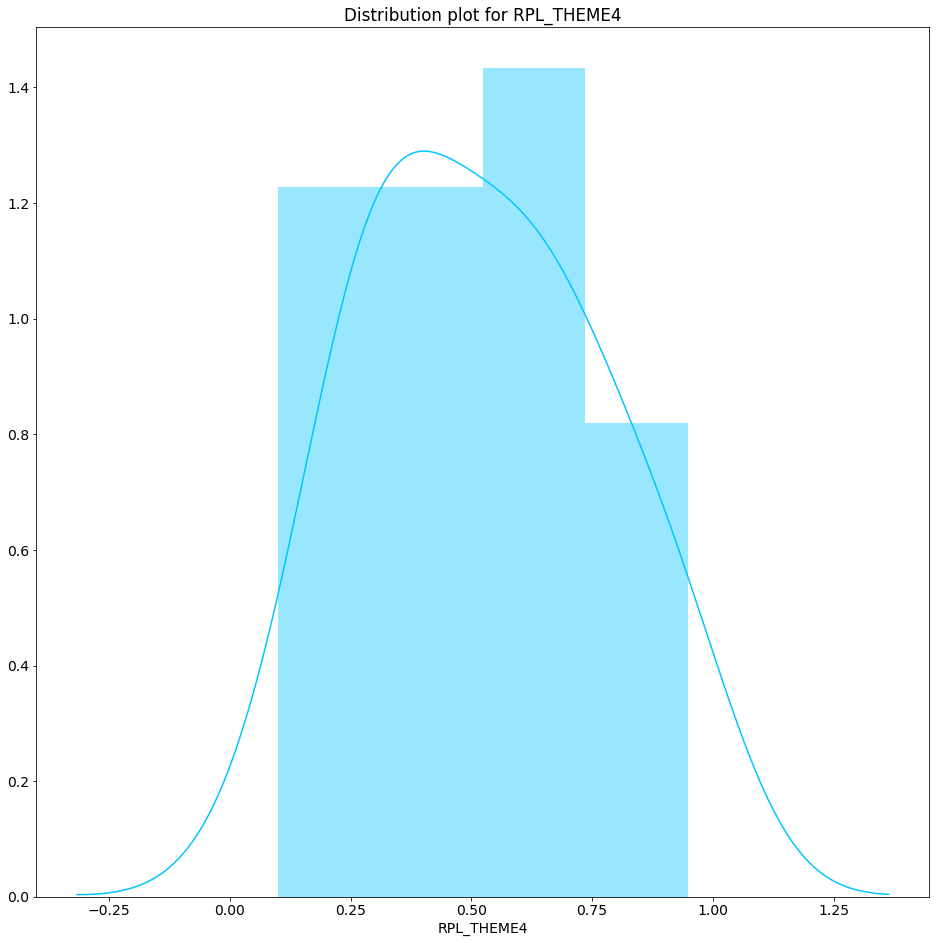

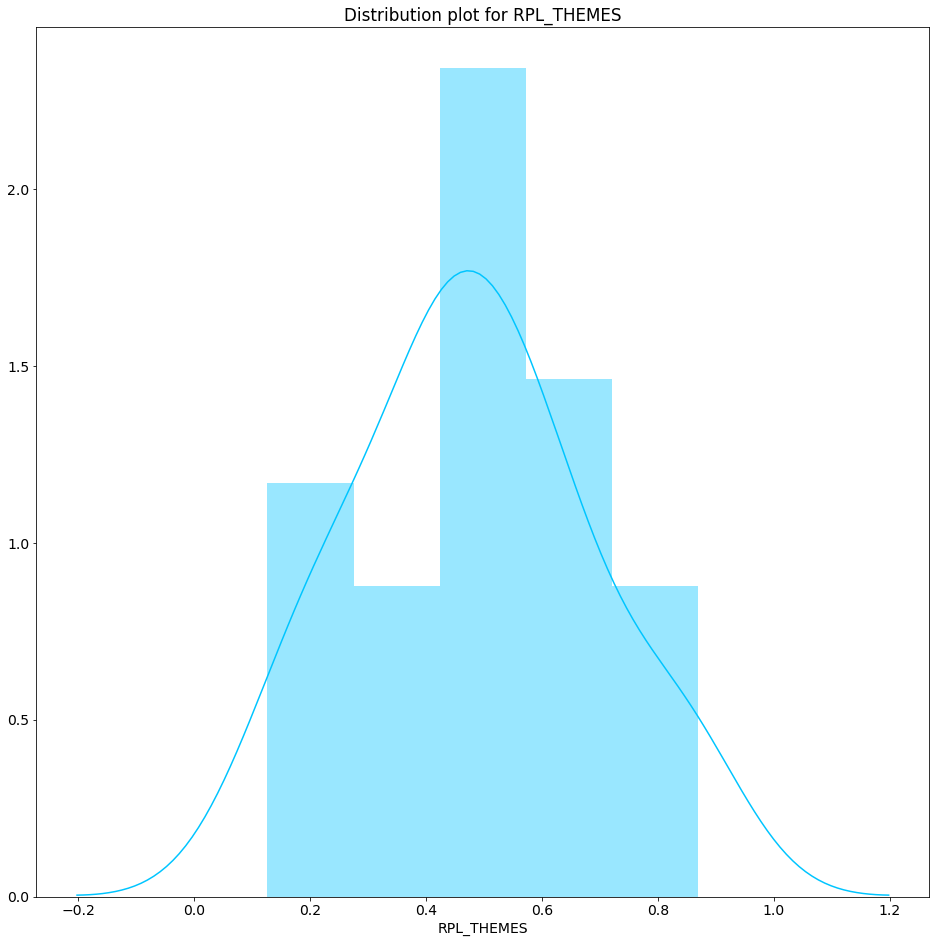

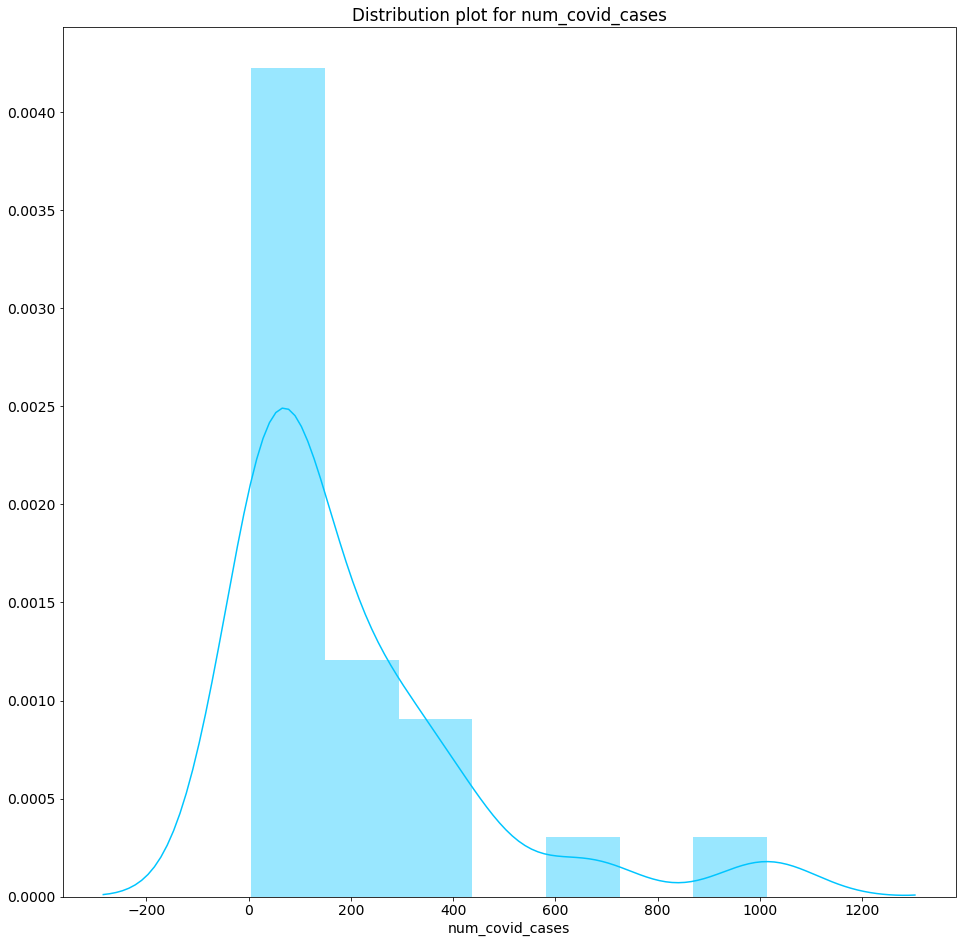

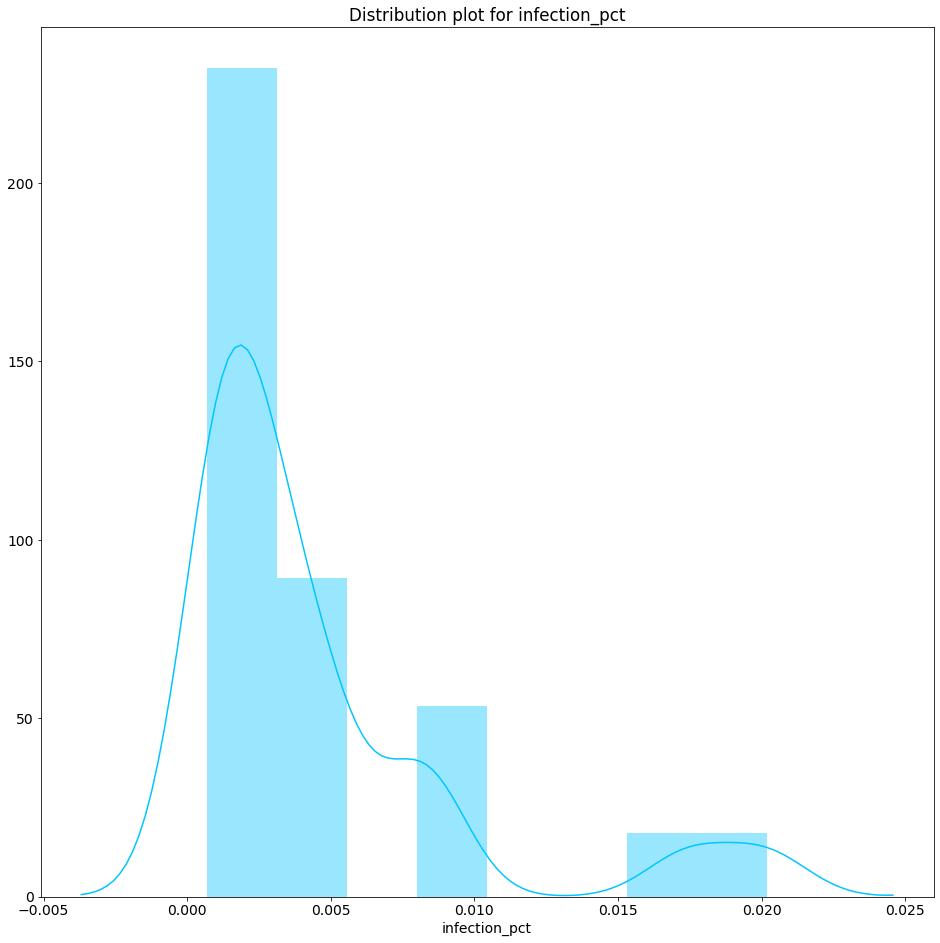

In [17]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_4)

### Distribution Plots for Region 5

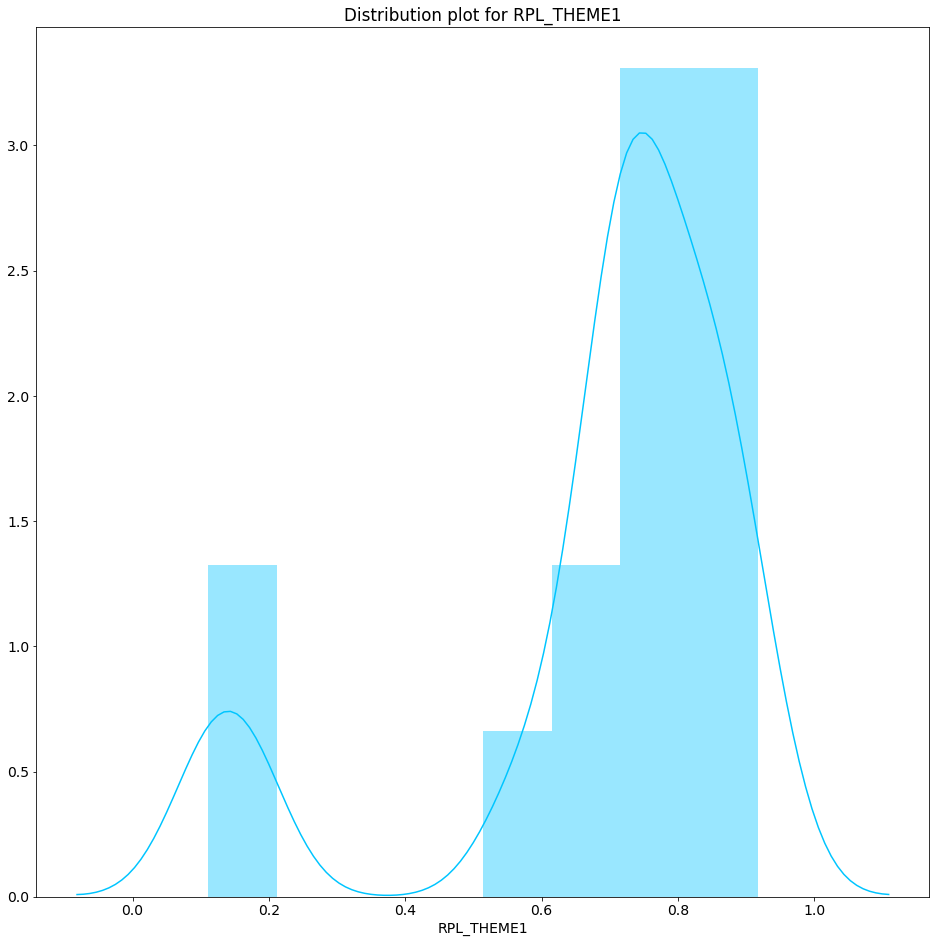

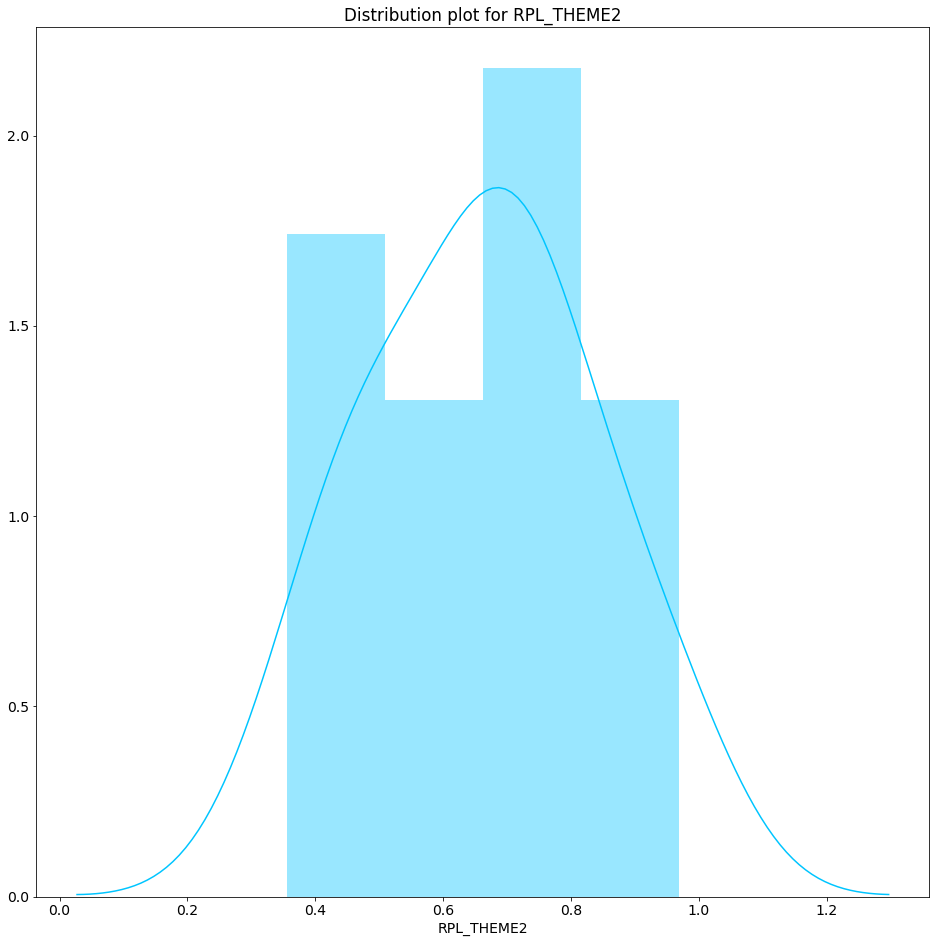

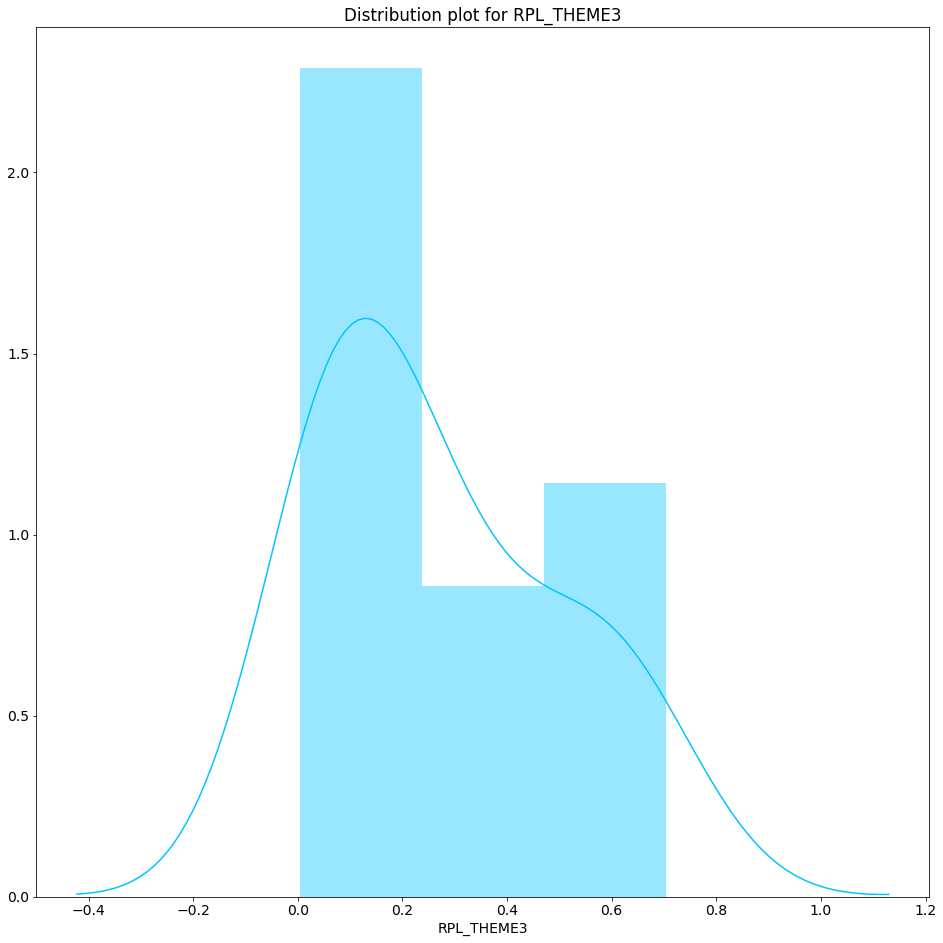

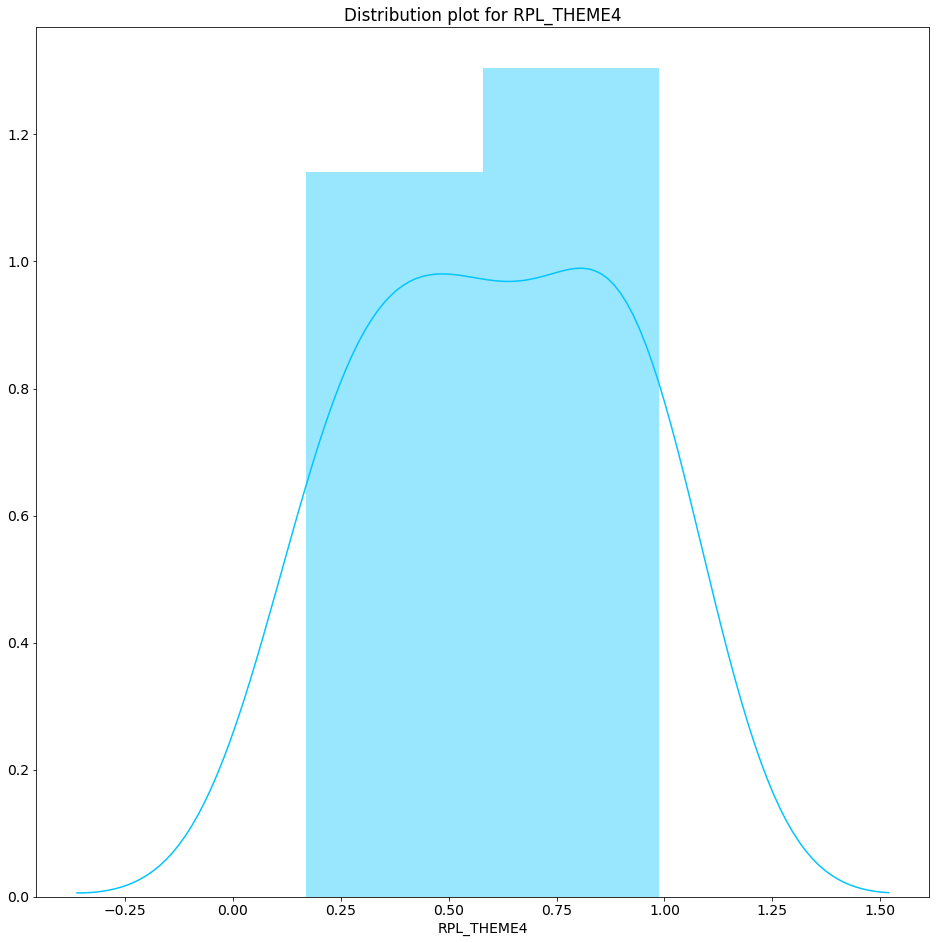

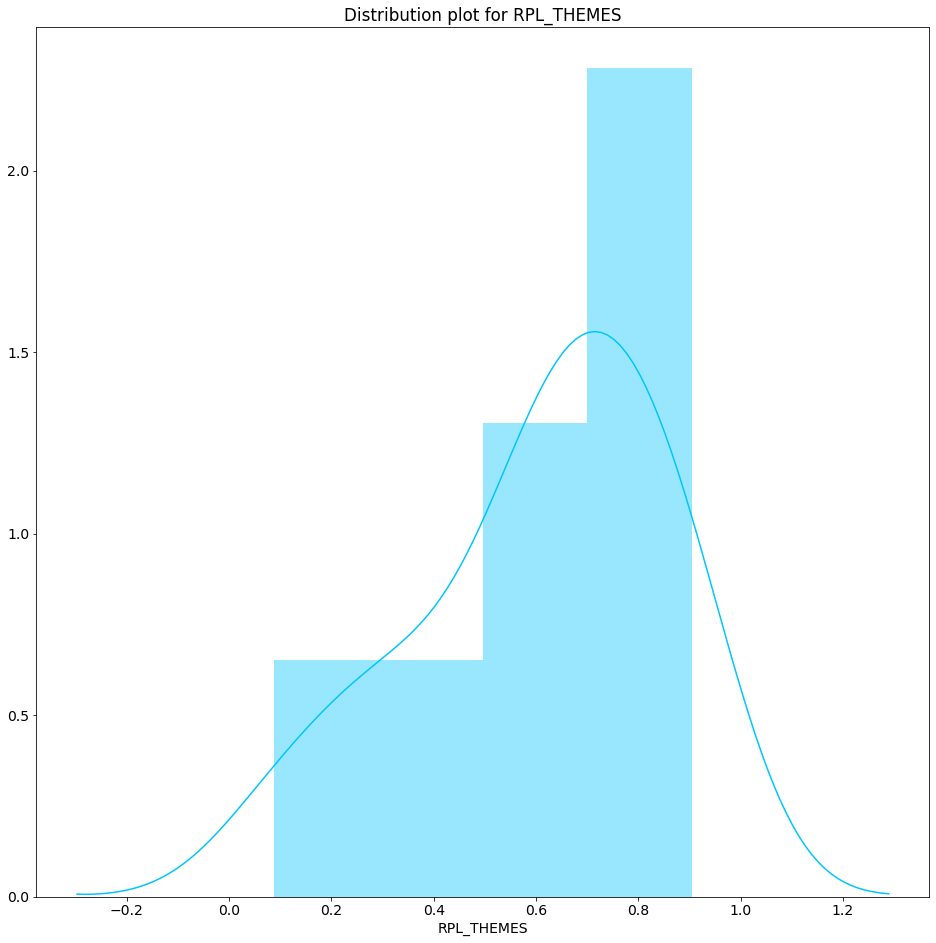

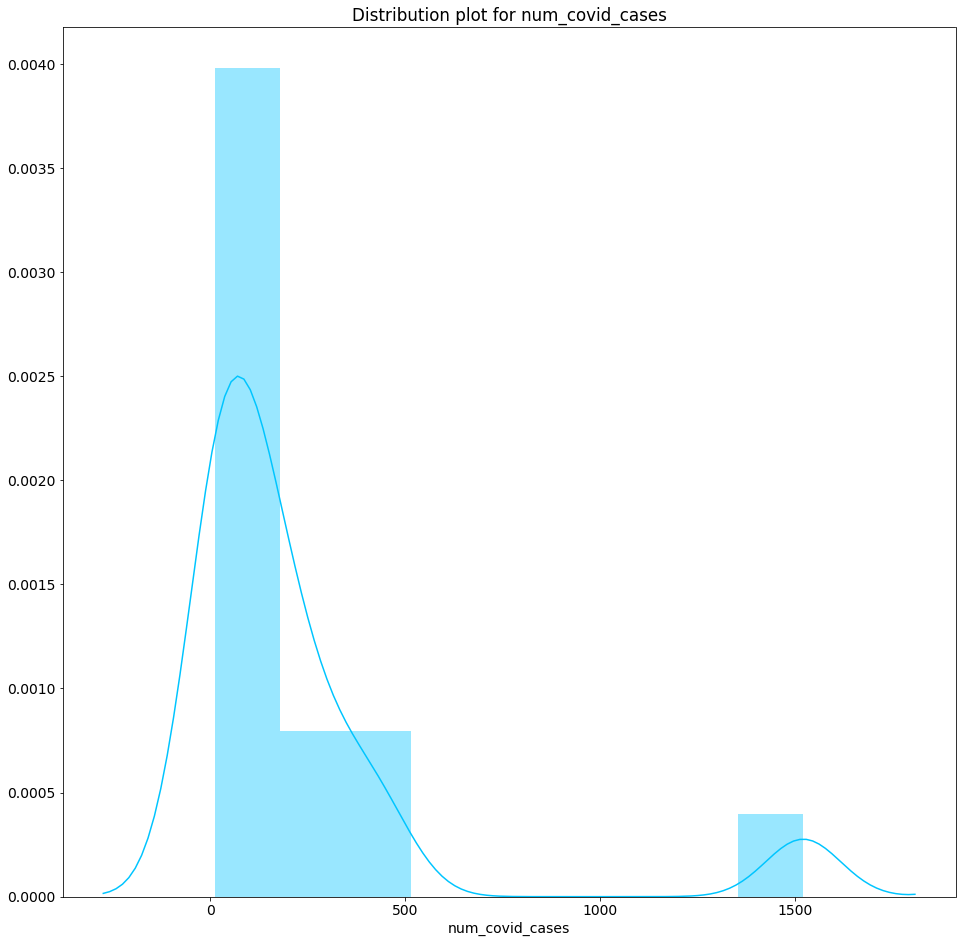

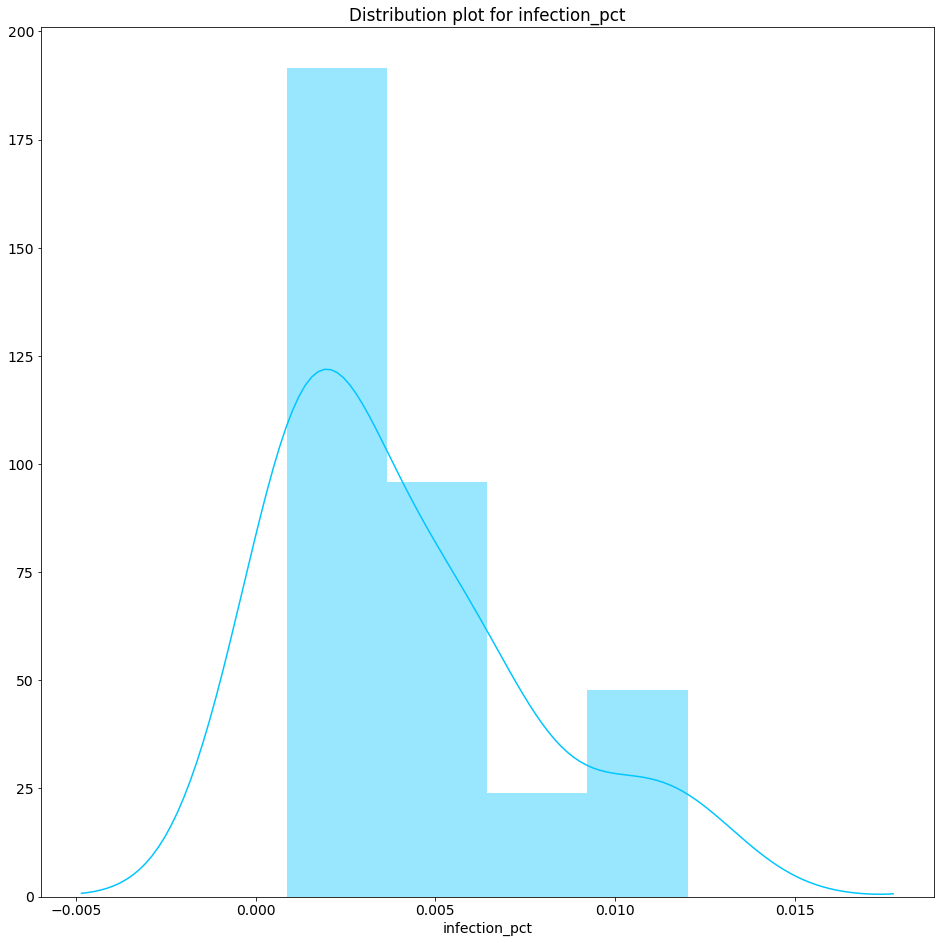

In [18]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_5)

### Distribution Plots for Region 6

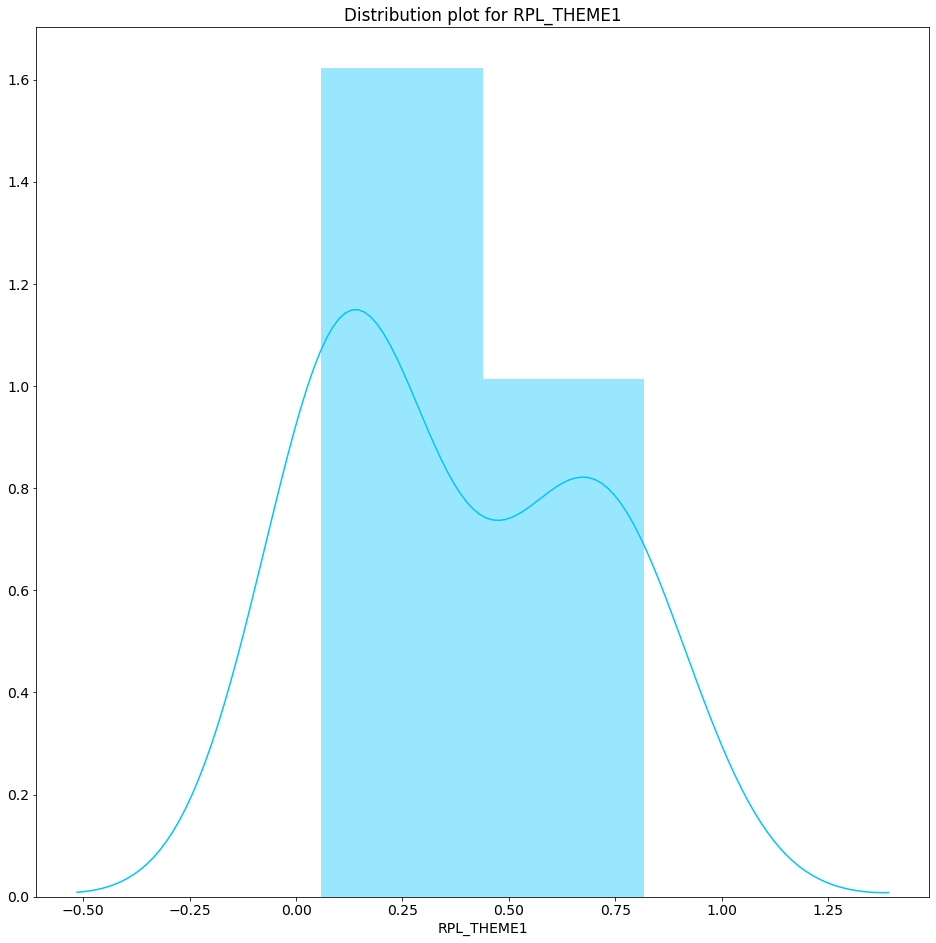

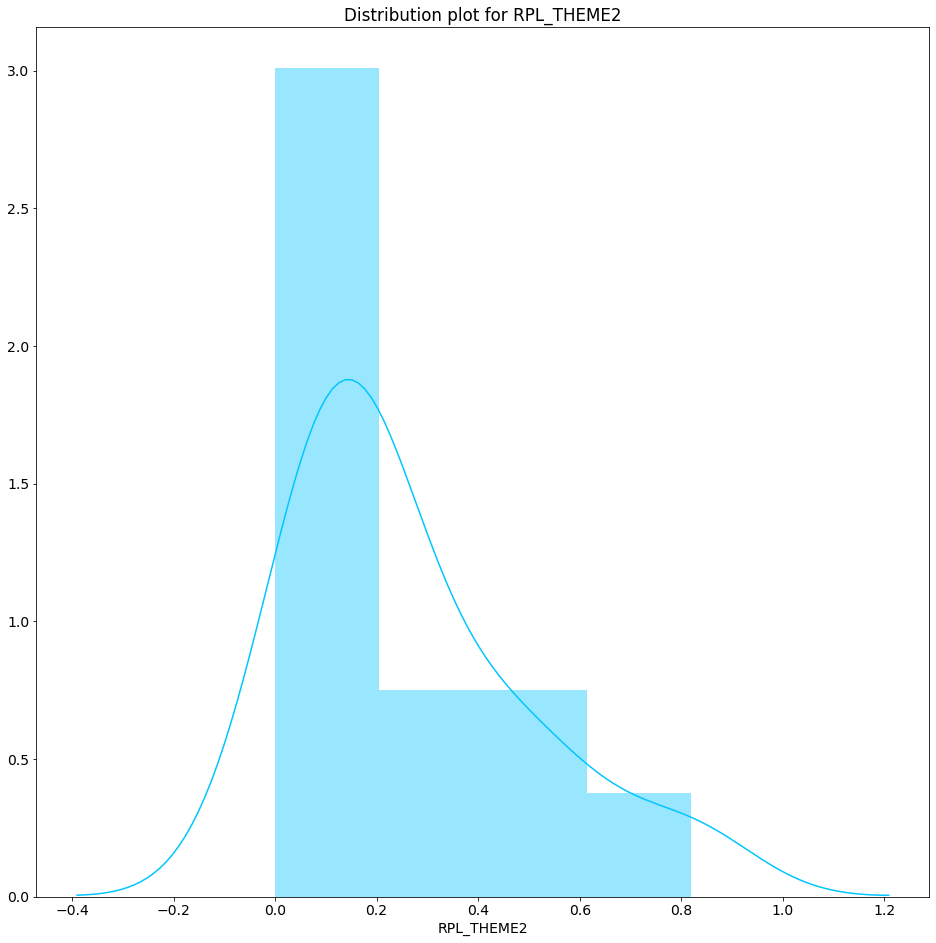

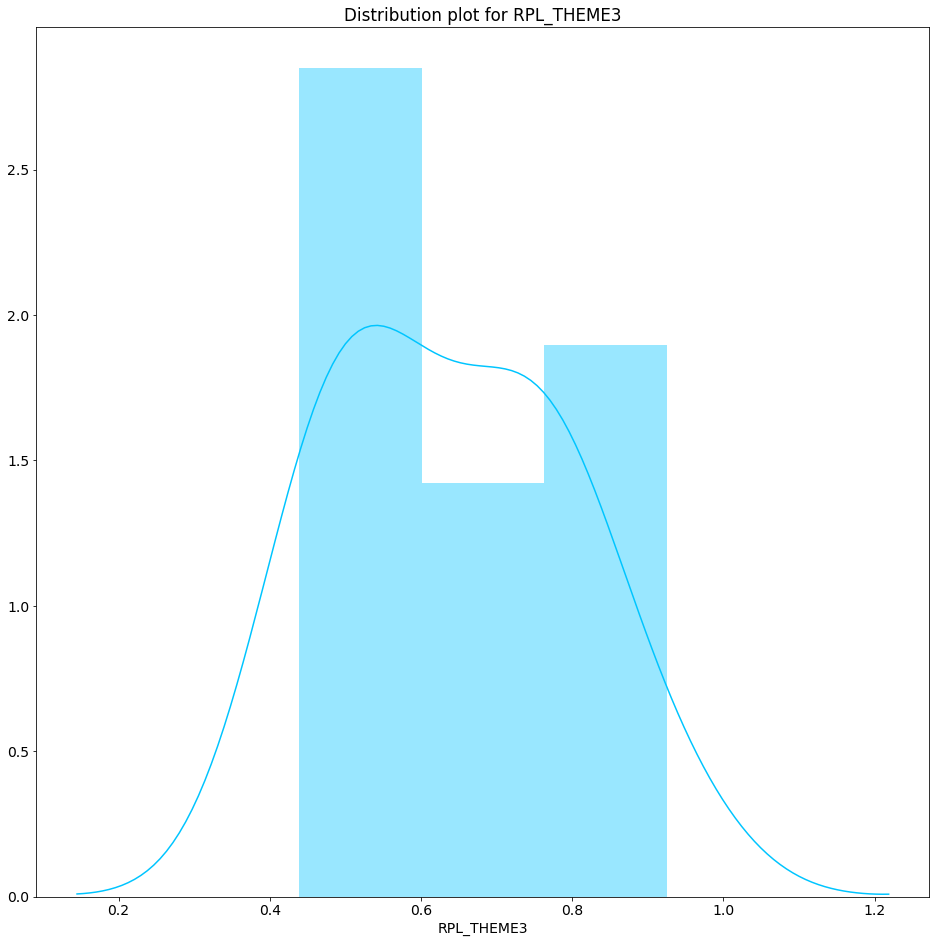

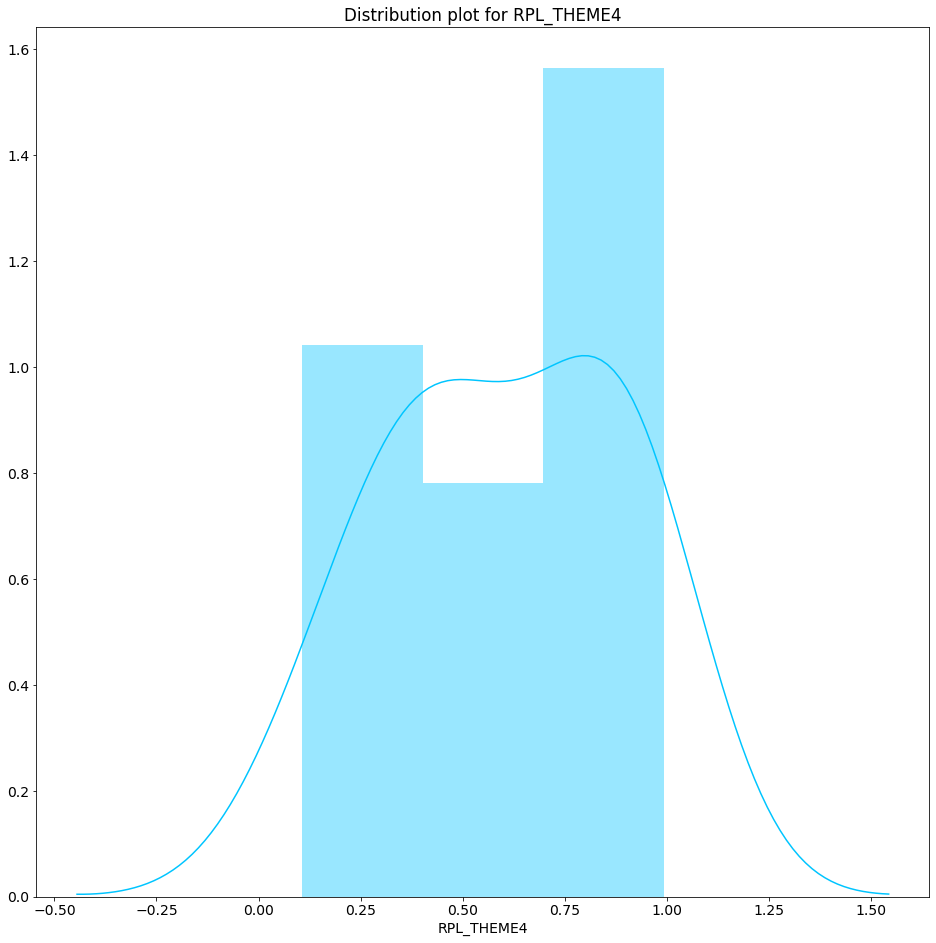

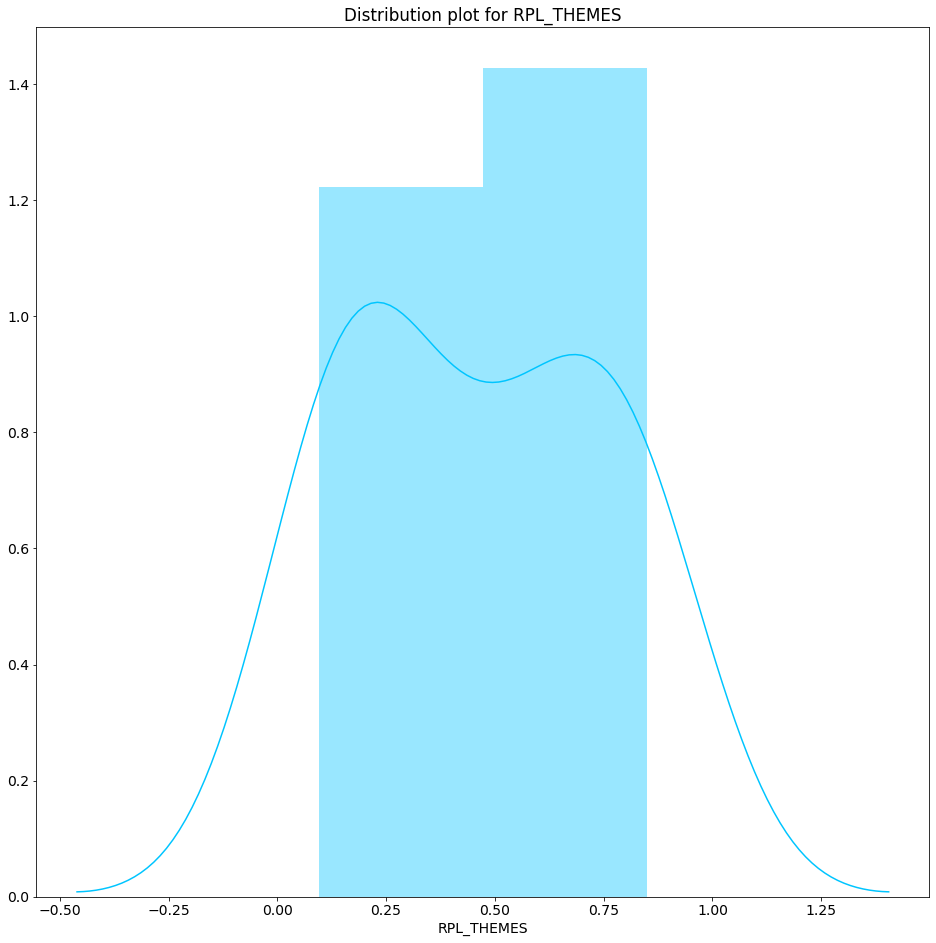

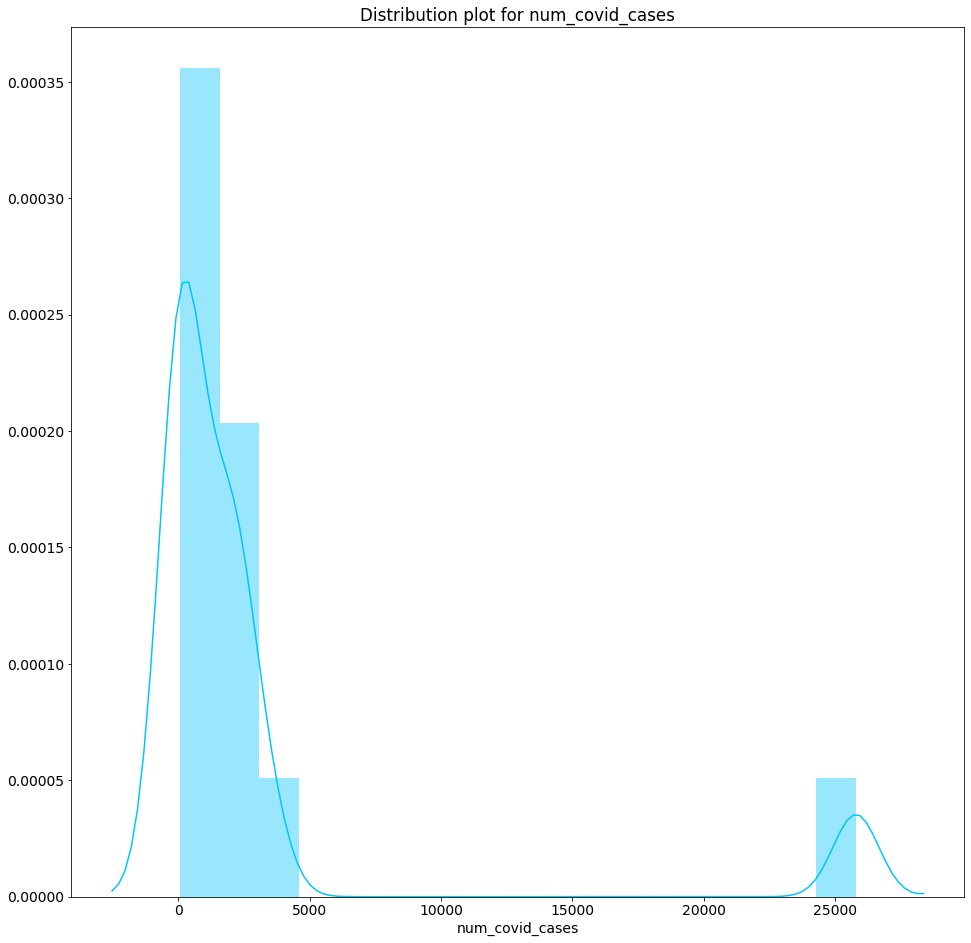

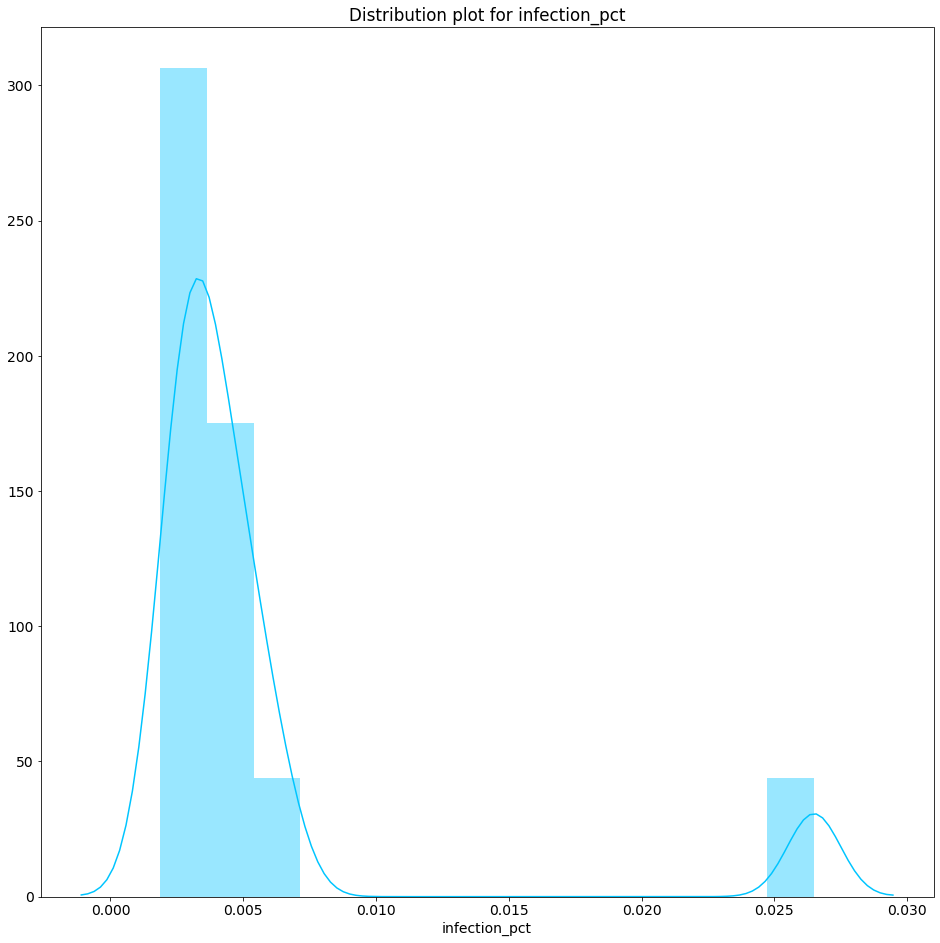

In [19]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_6)

### Distribution Plots for Region 7

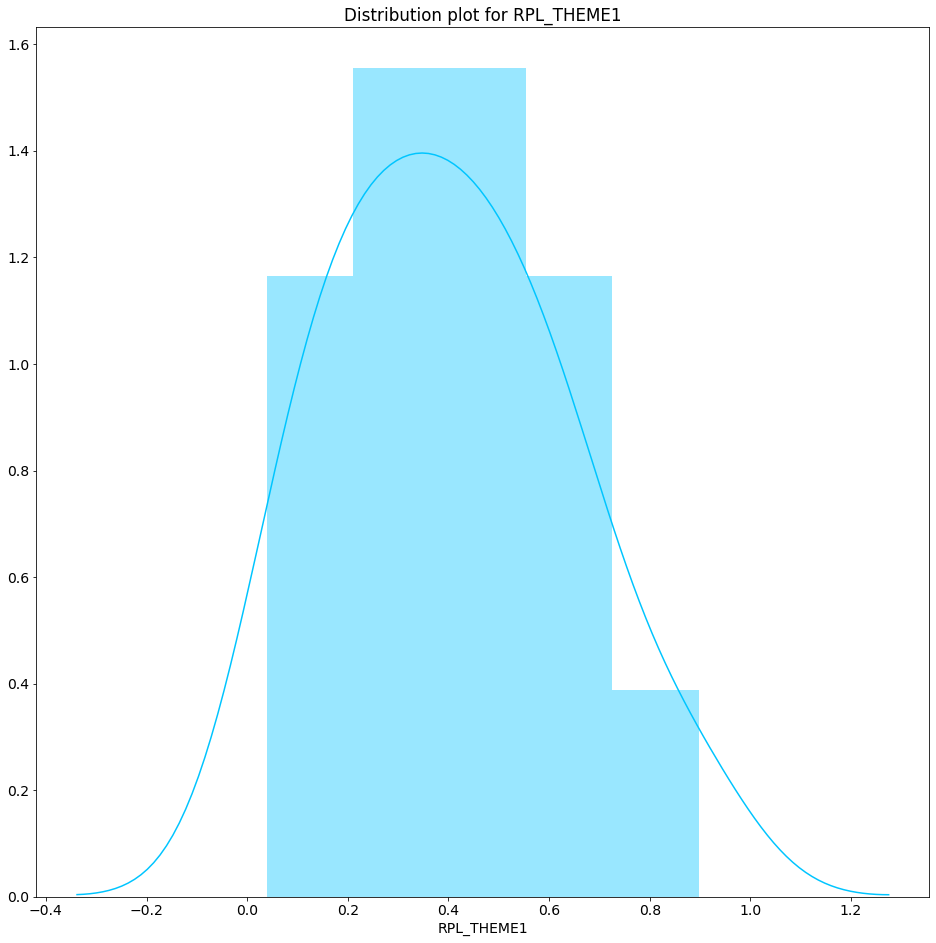

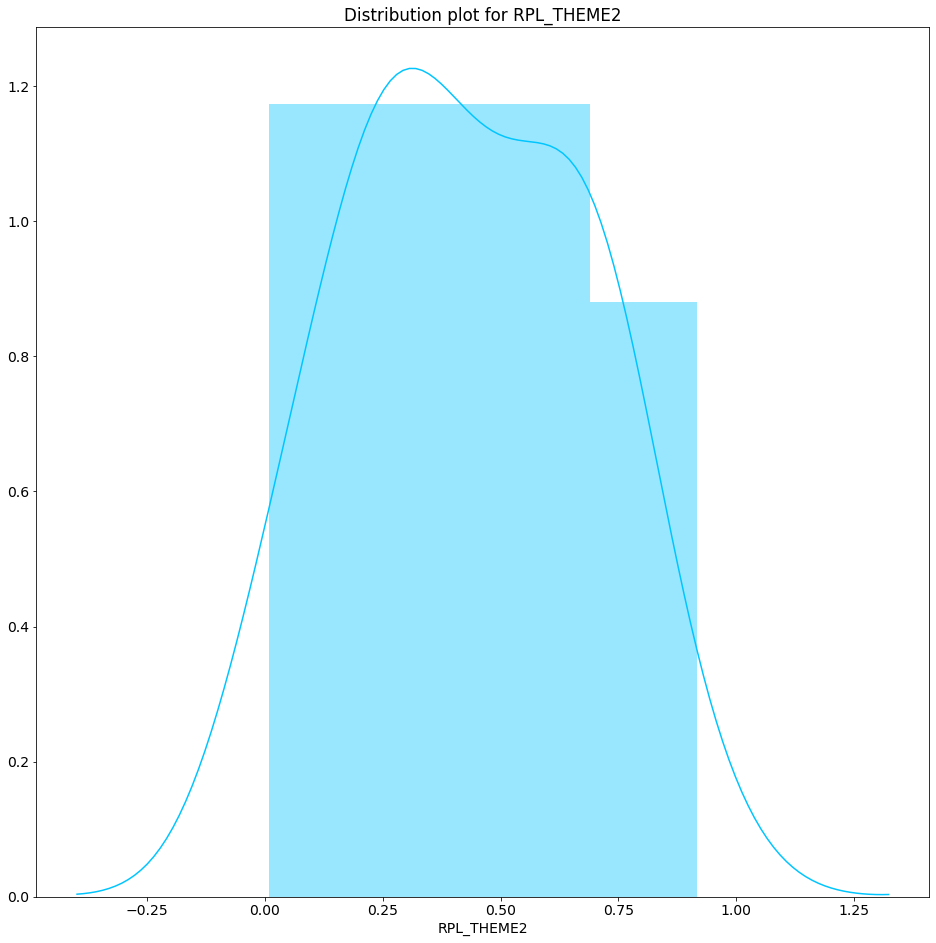

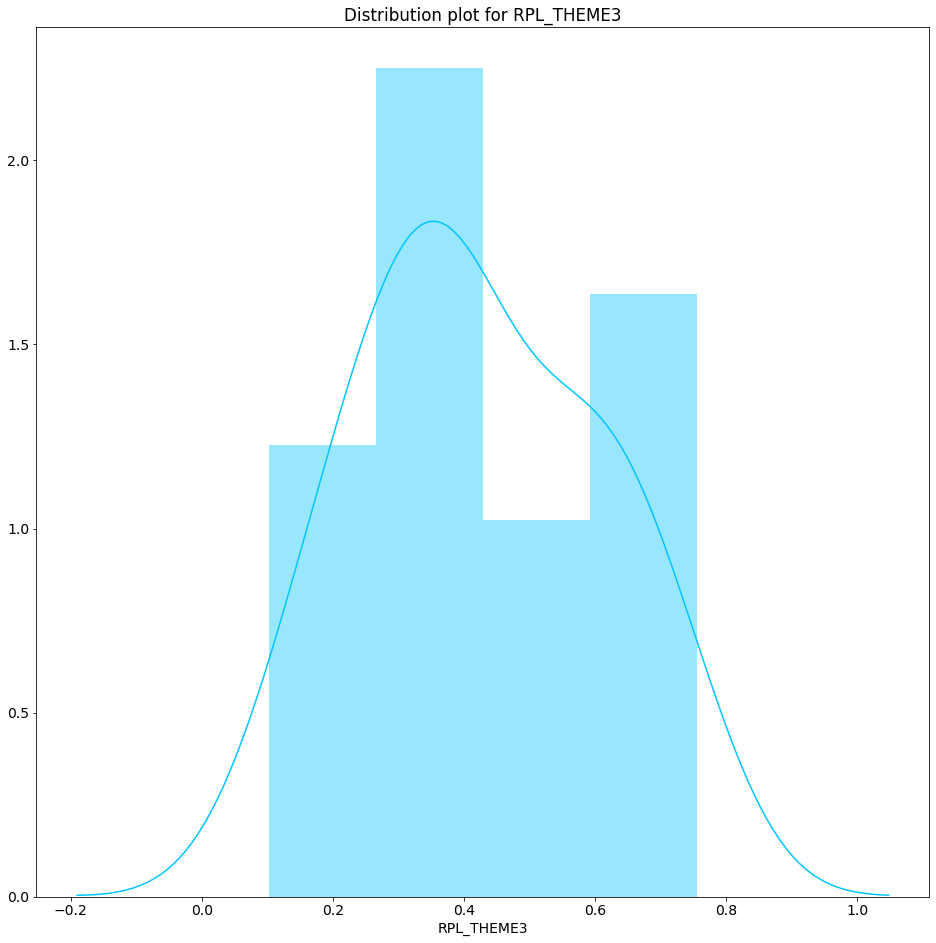

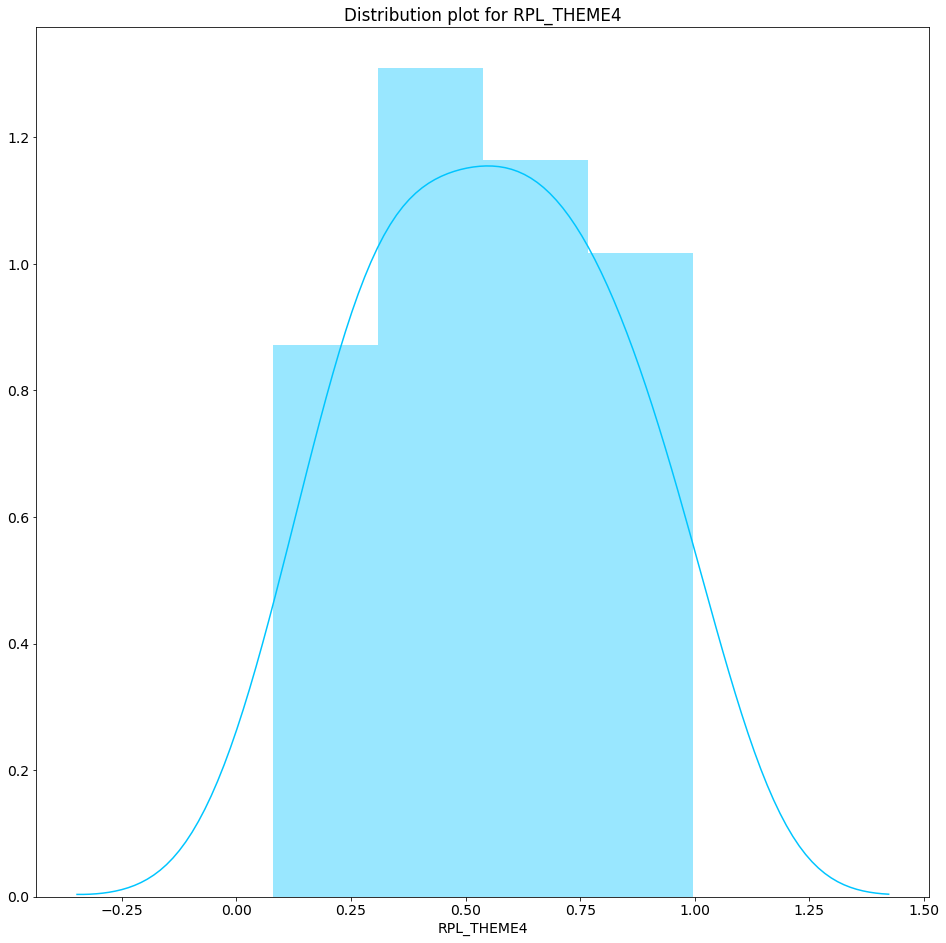

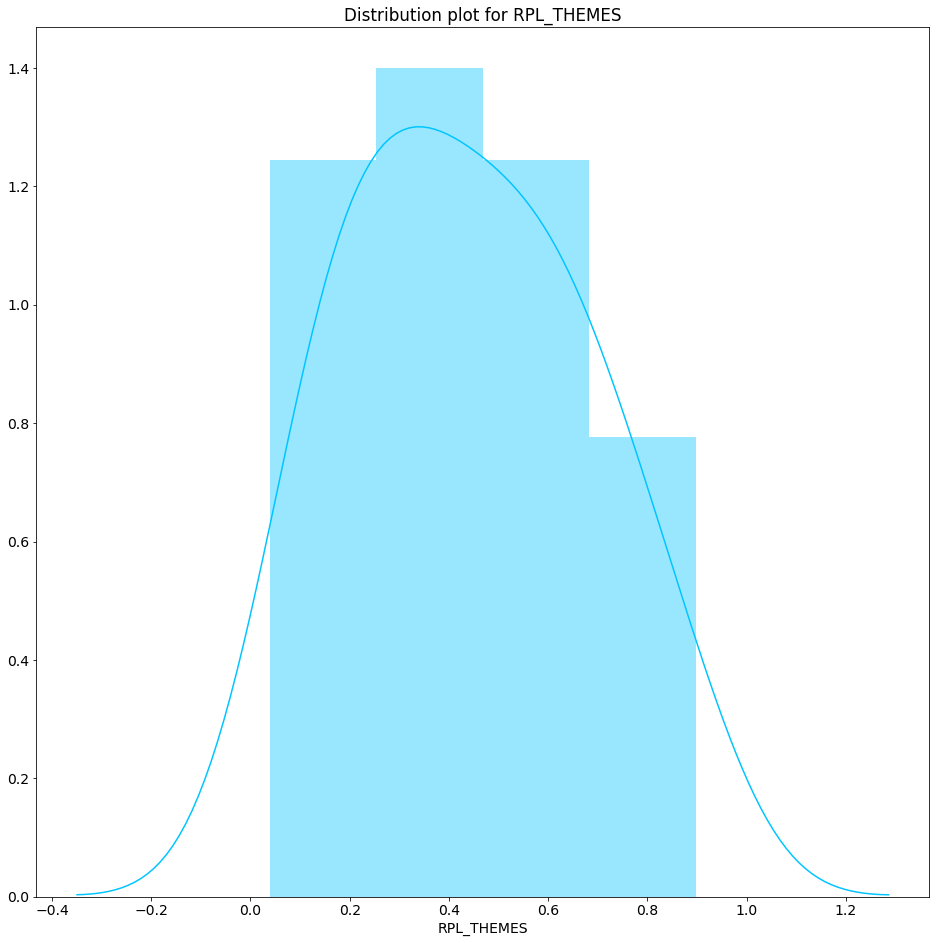

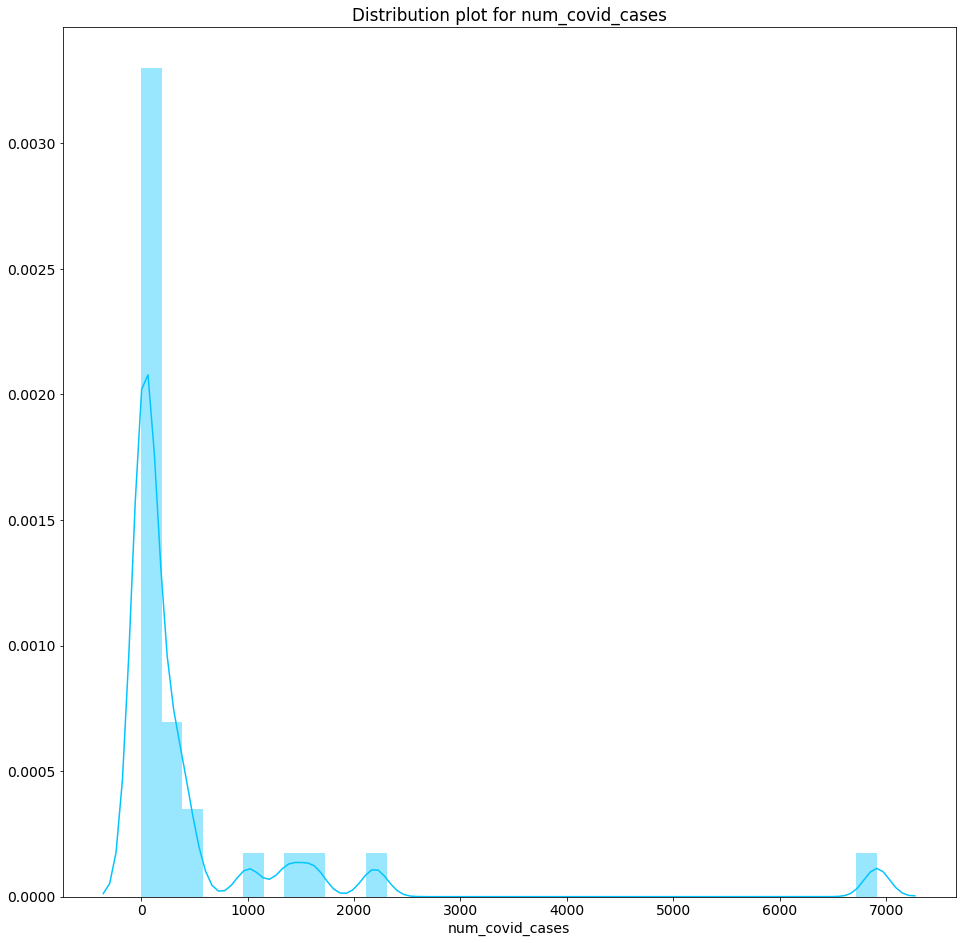

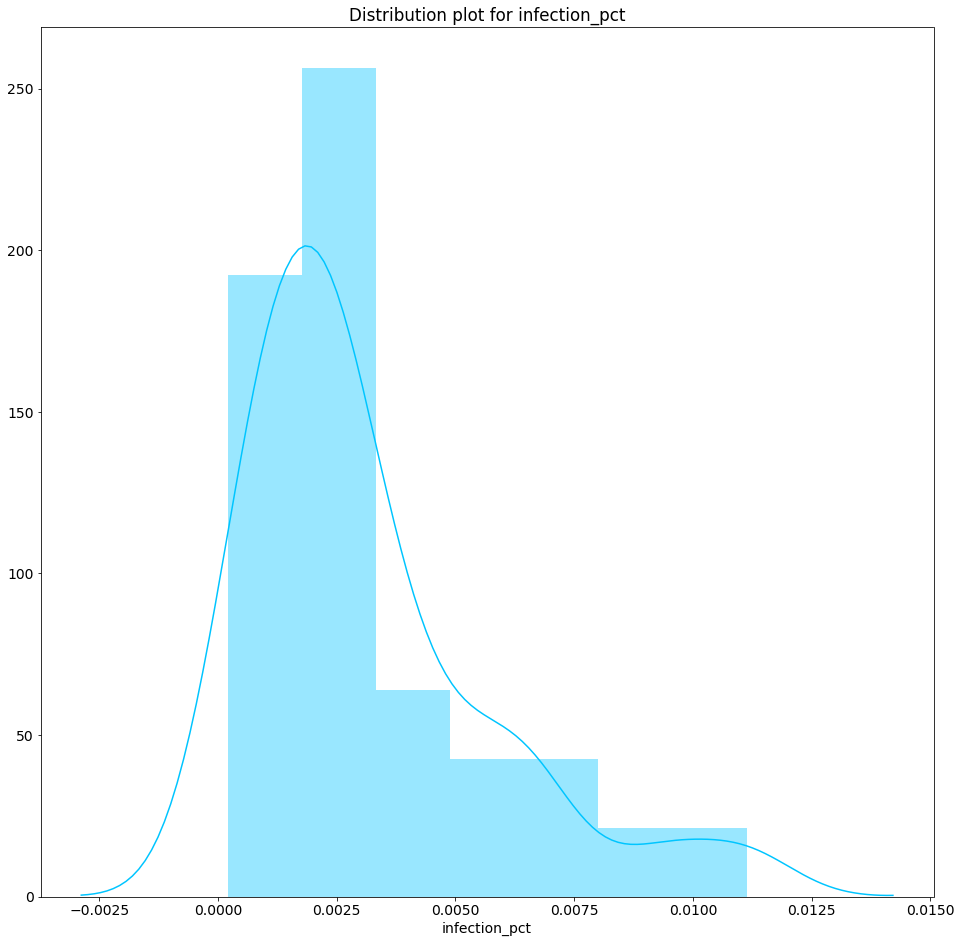

In [20]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_7)

### Distribution Plots for Region 8

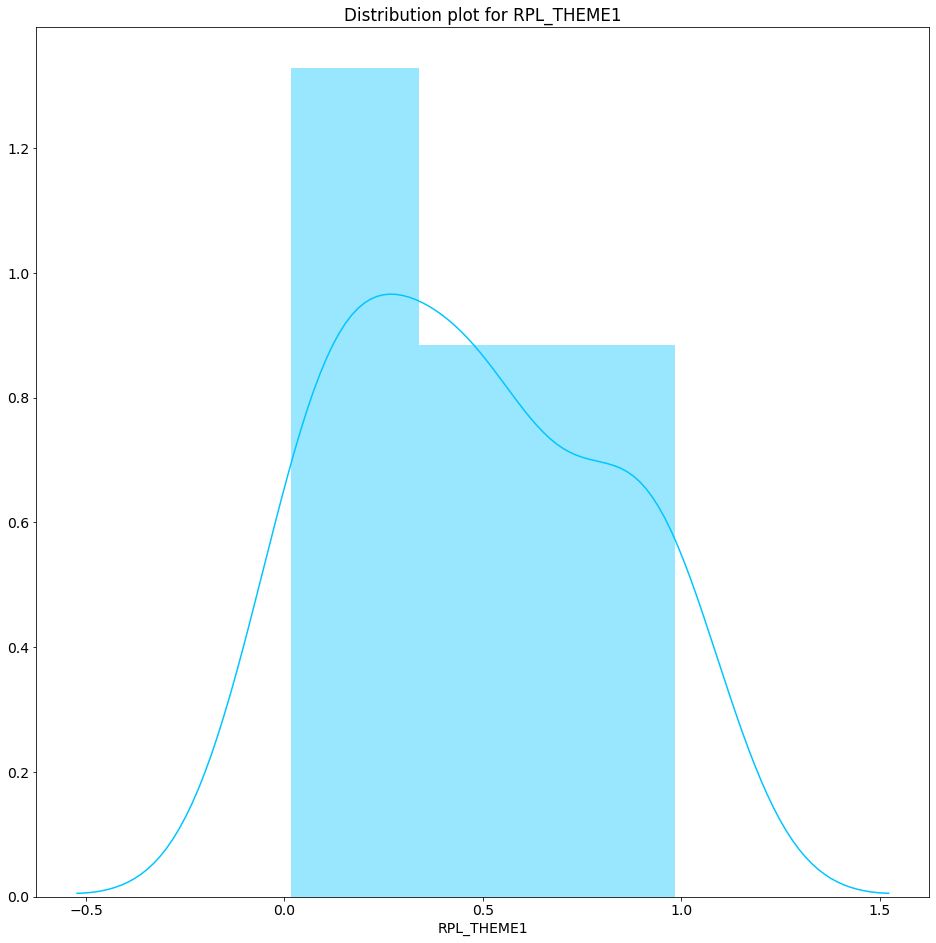

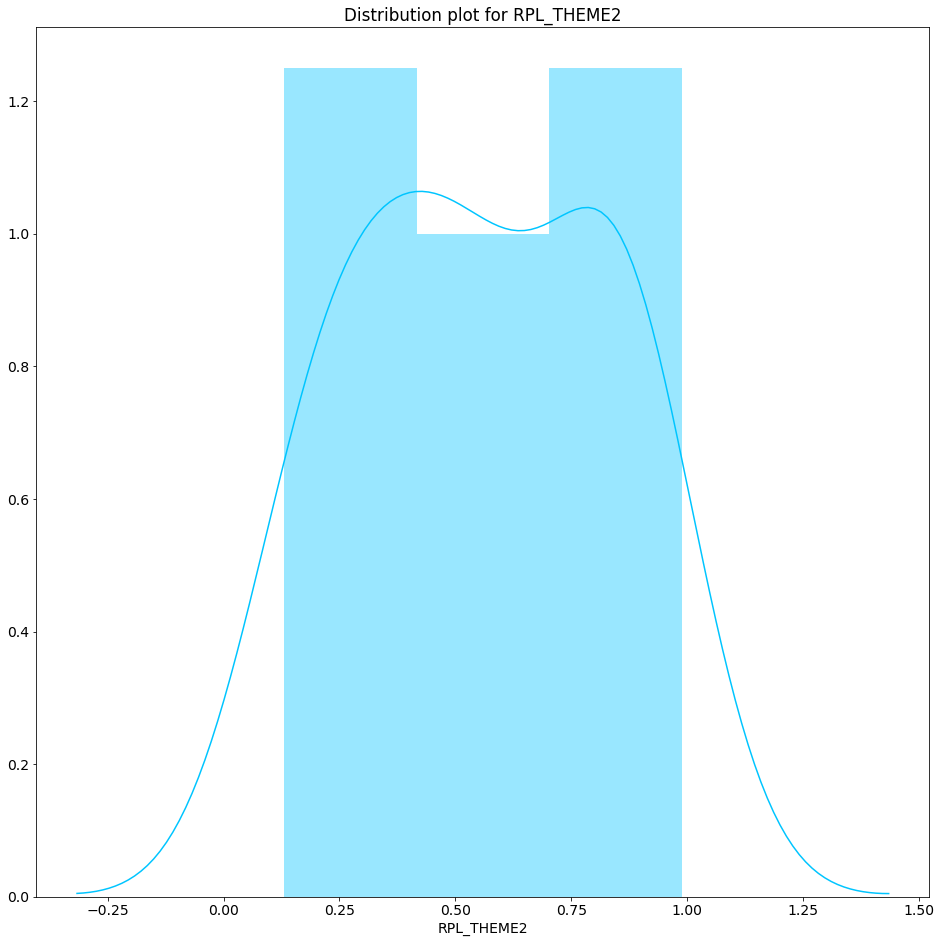

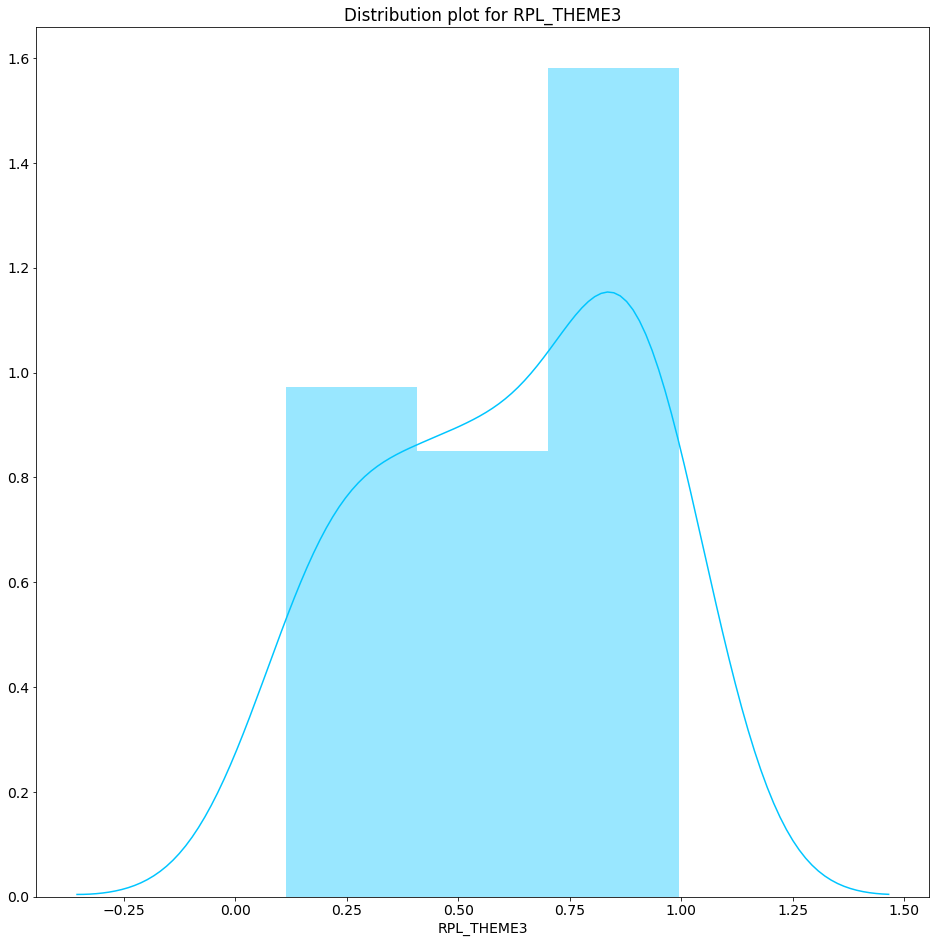

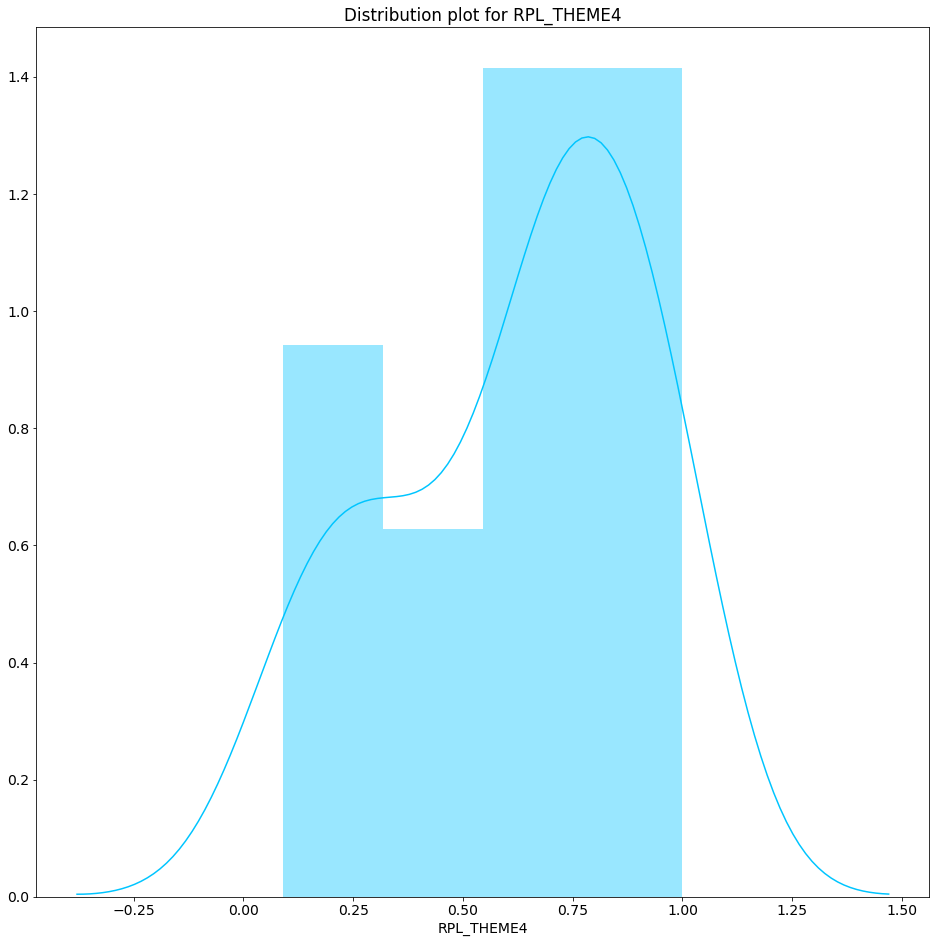

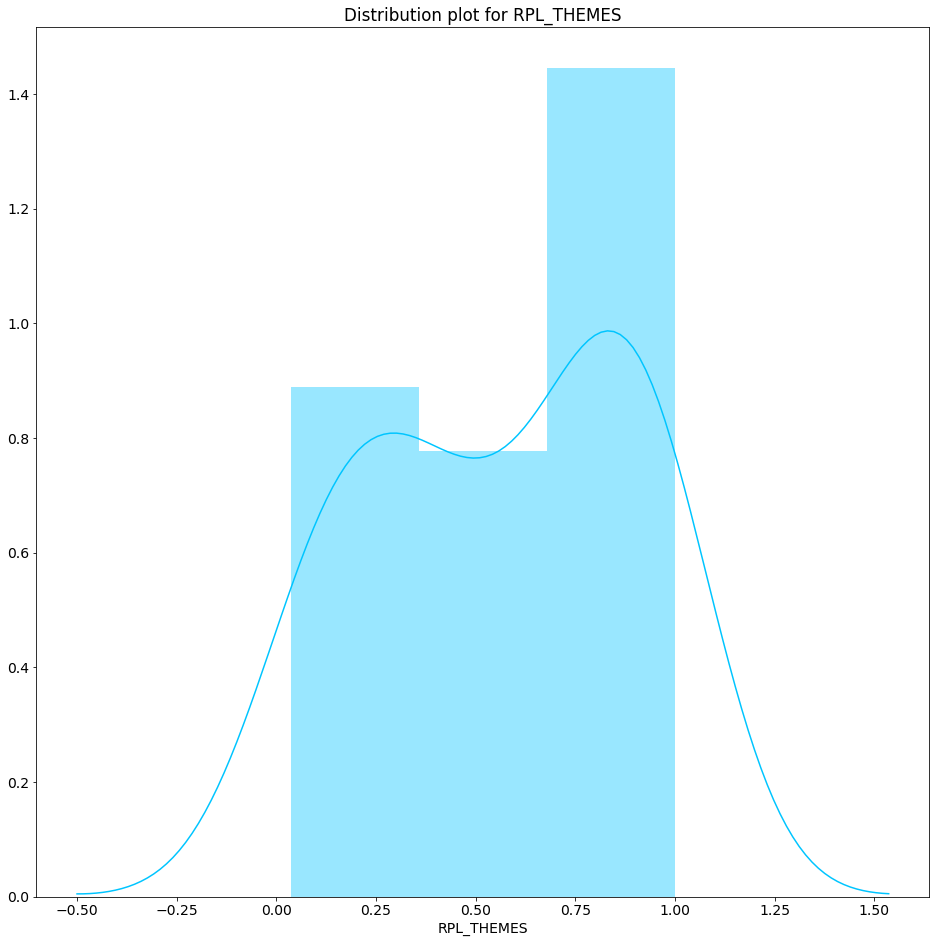

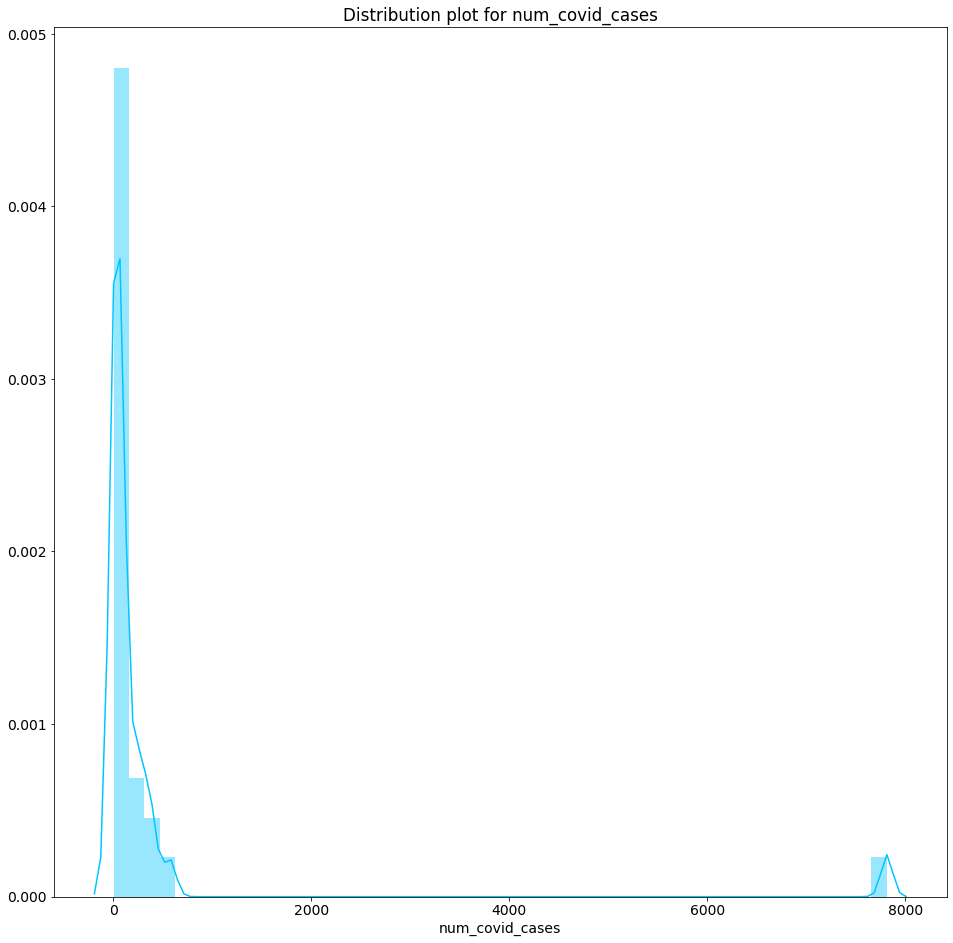

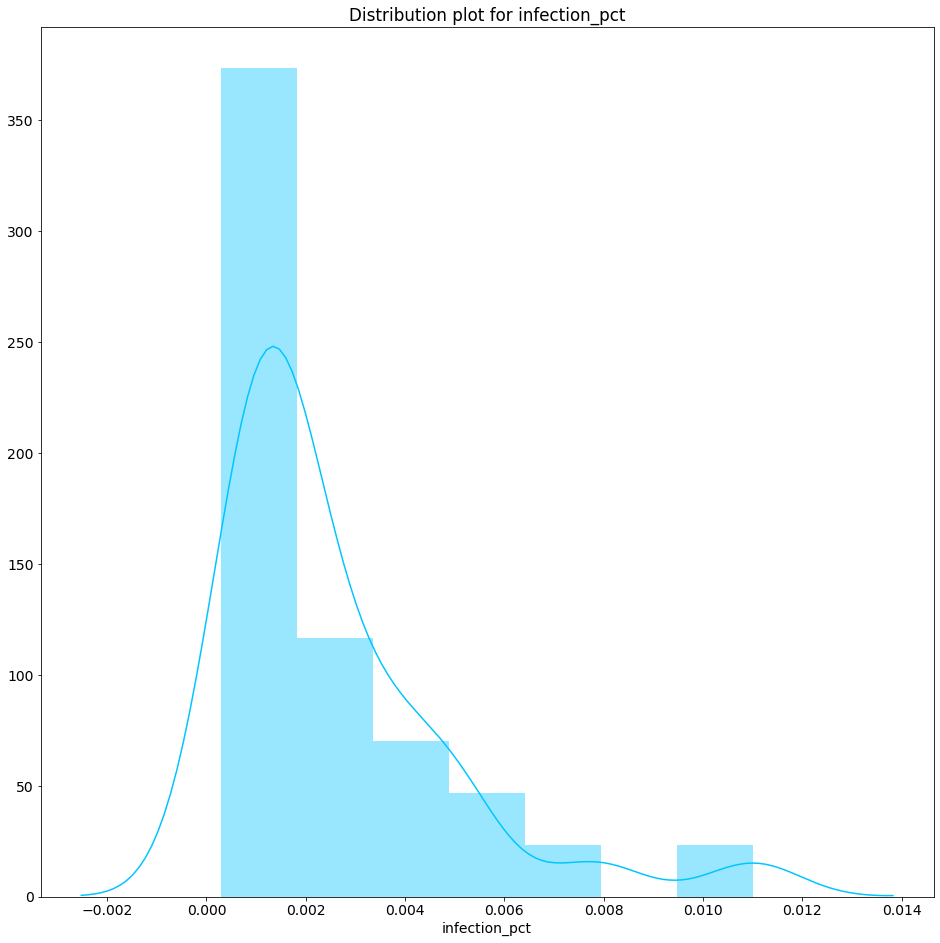

In [21]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_8)

### Distribution Plots for Region 9

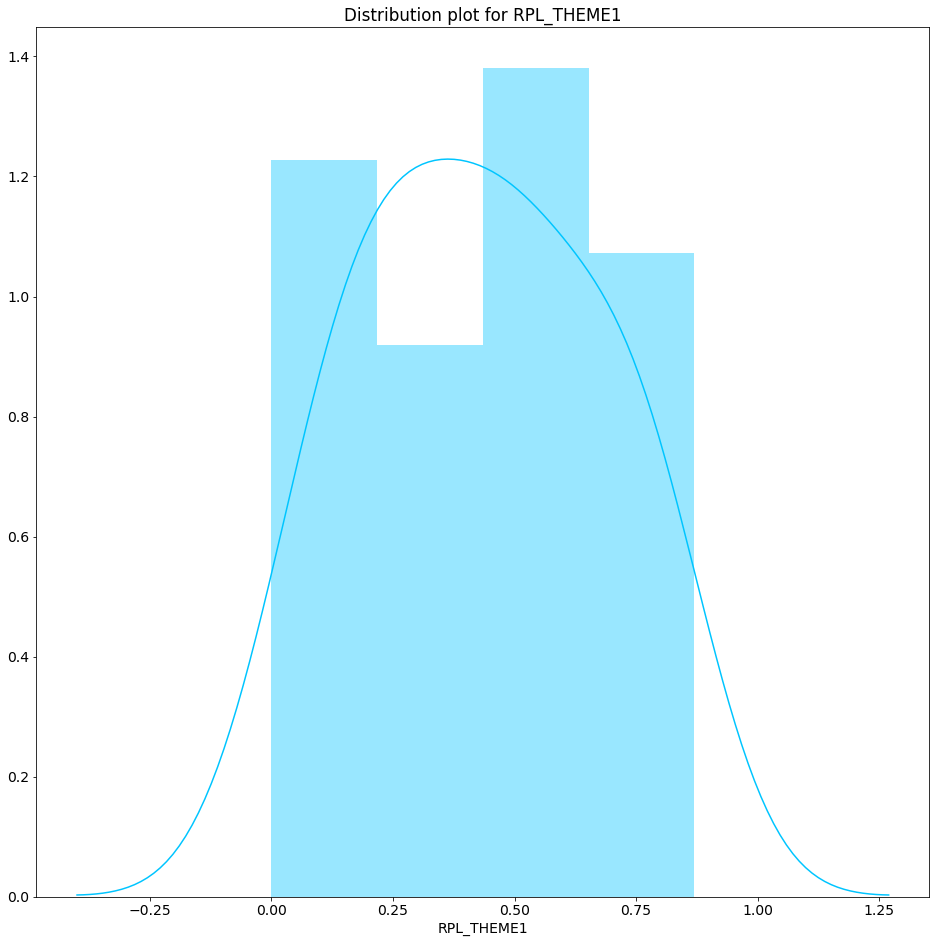

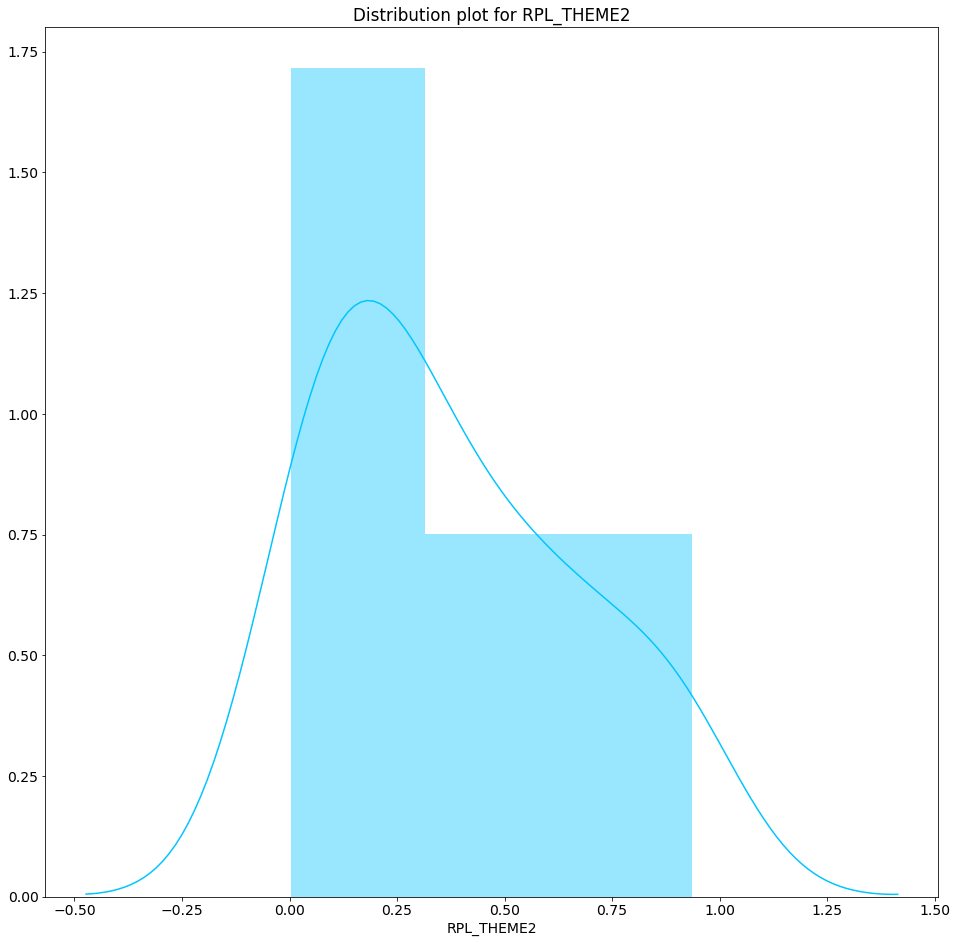

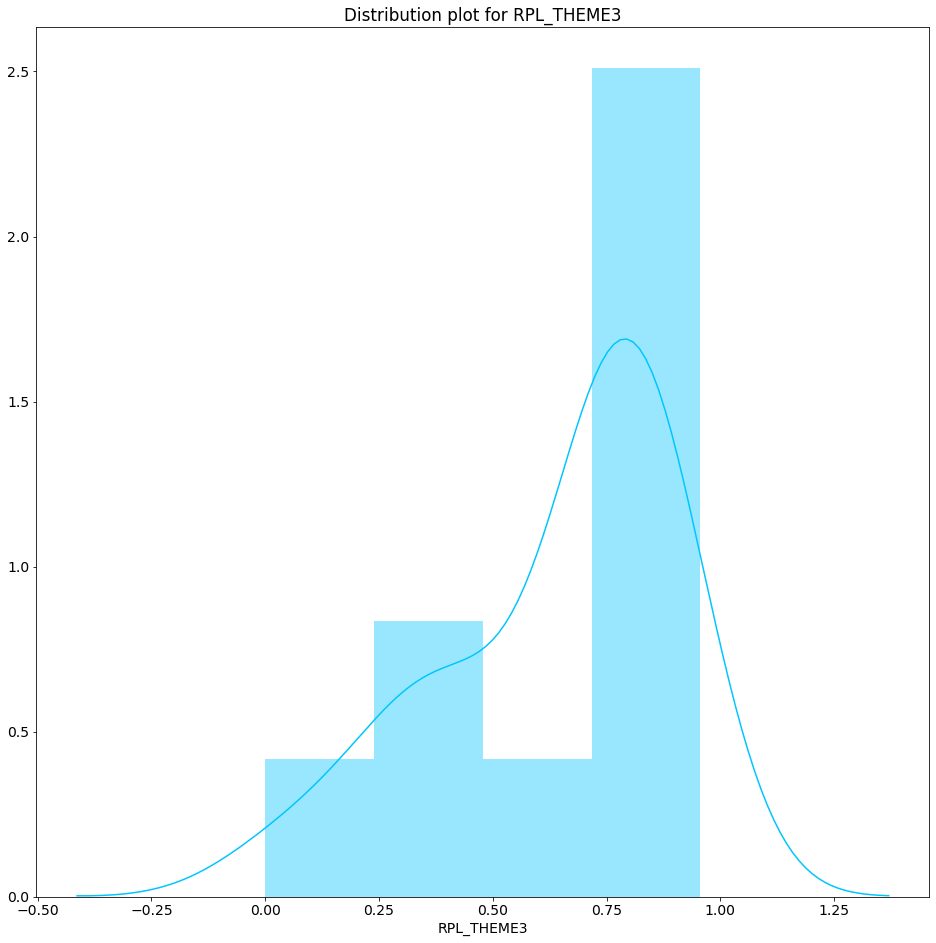

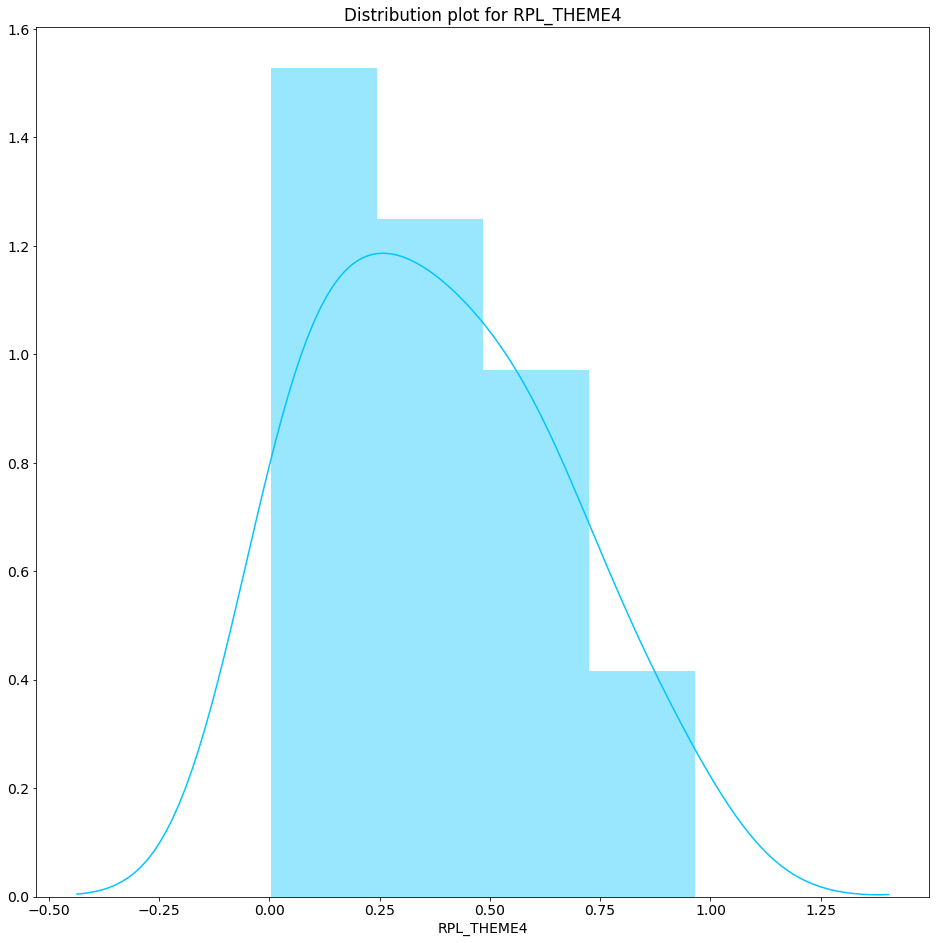

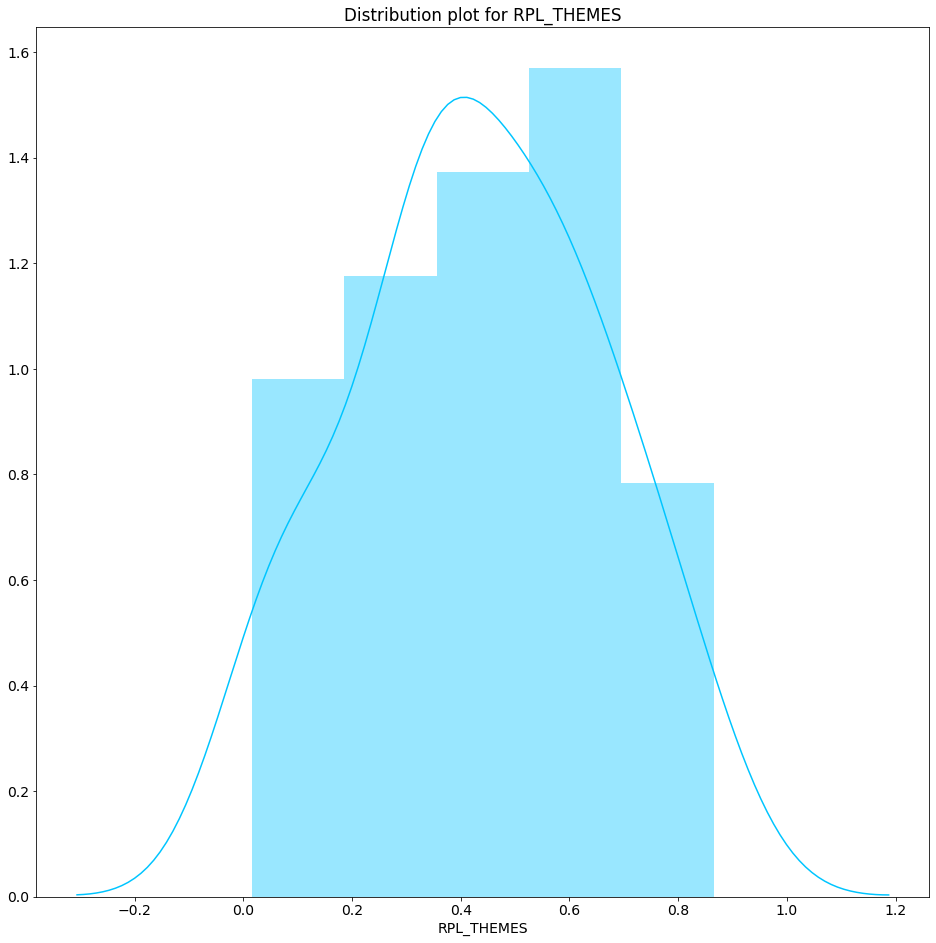

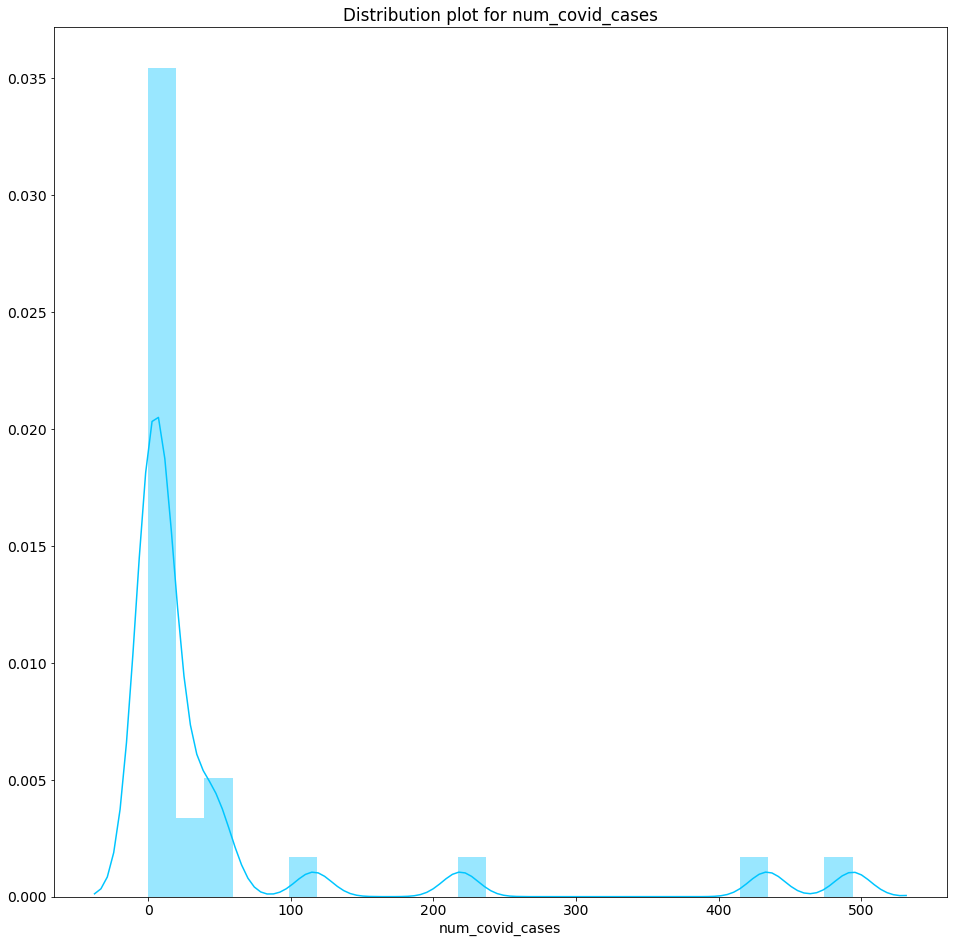

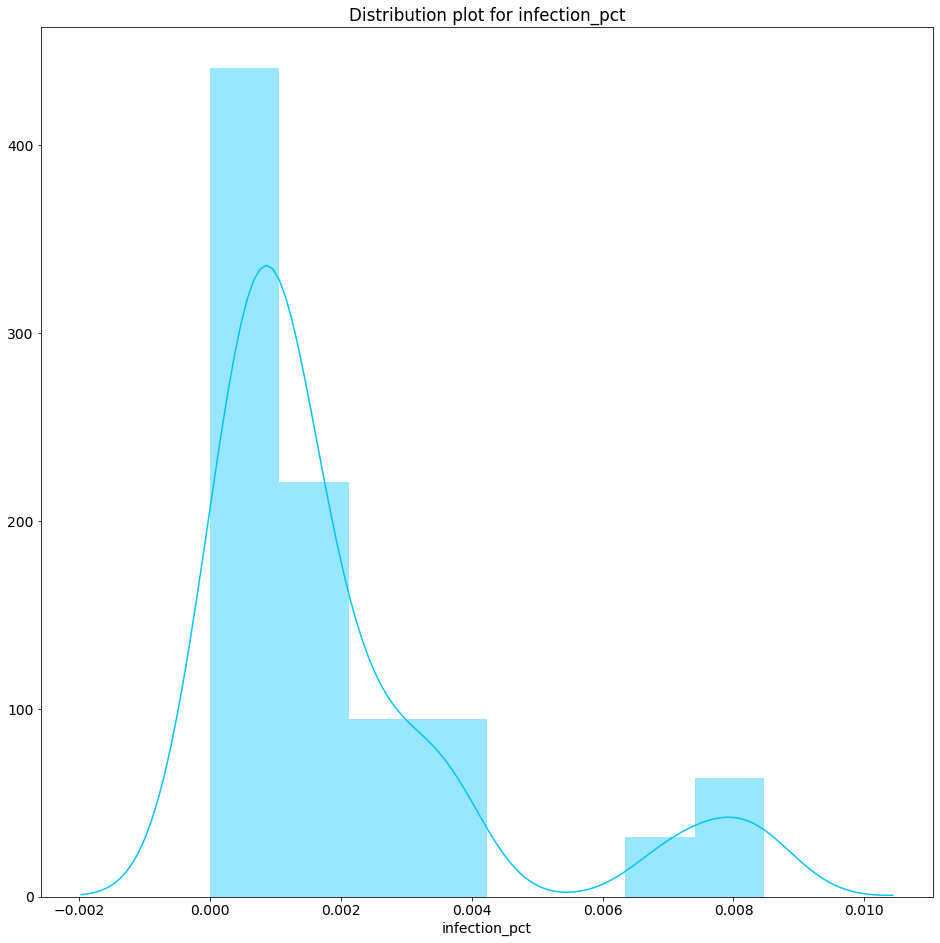

In [22]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_9)

### Distribution Plots for Region 10

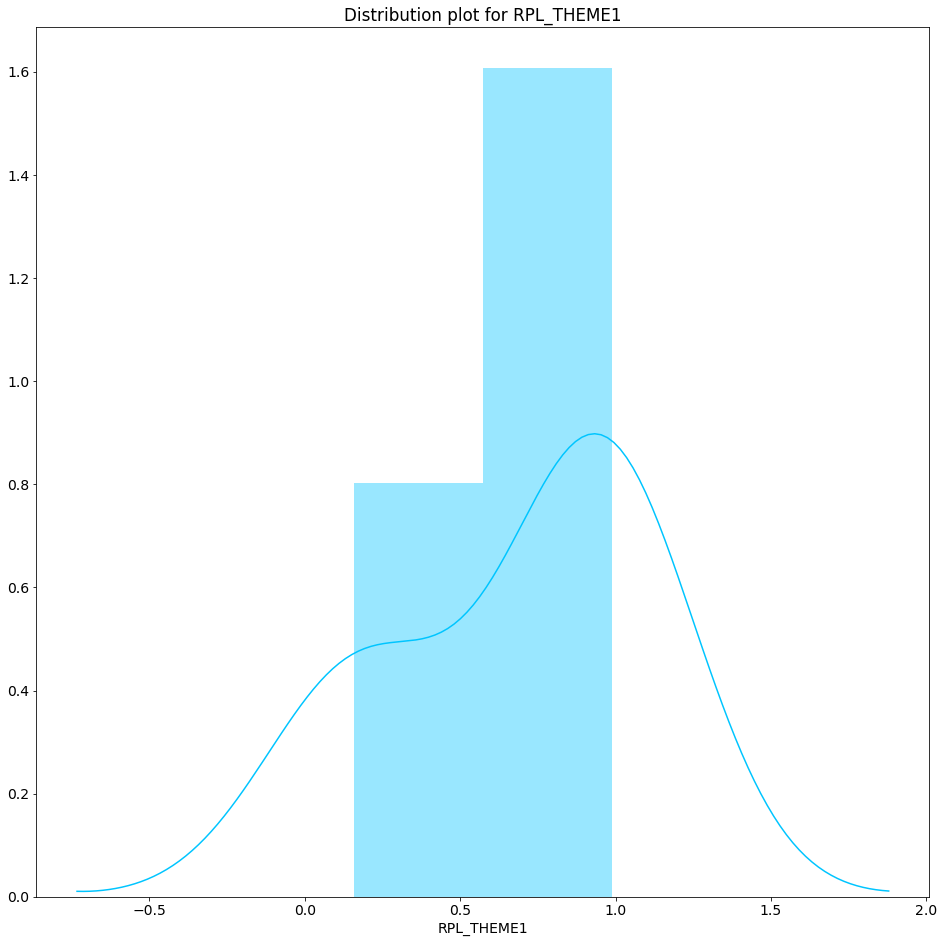

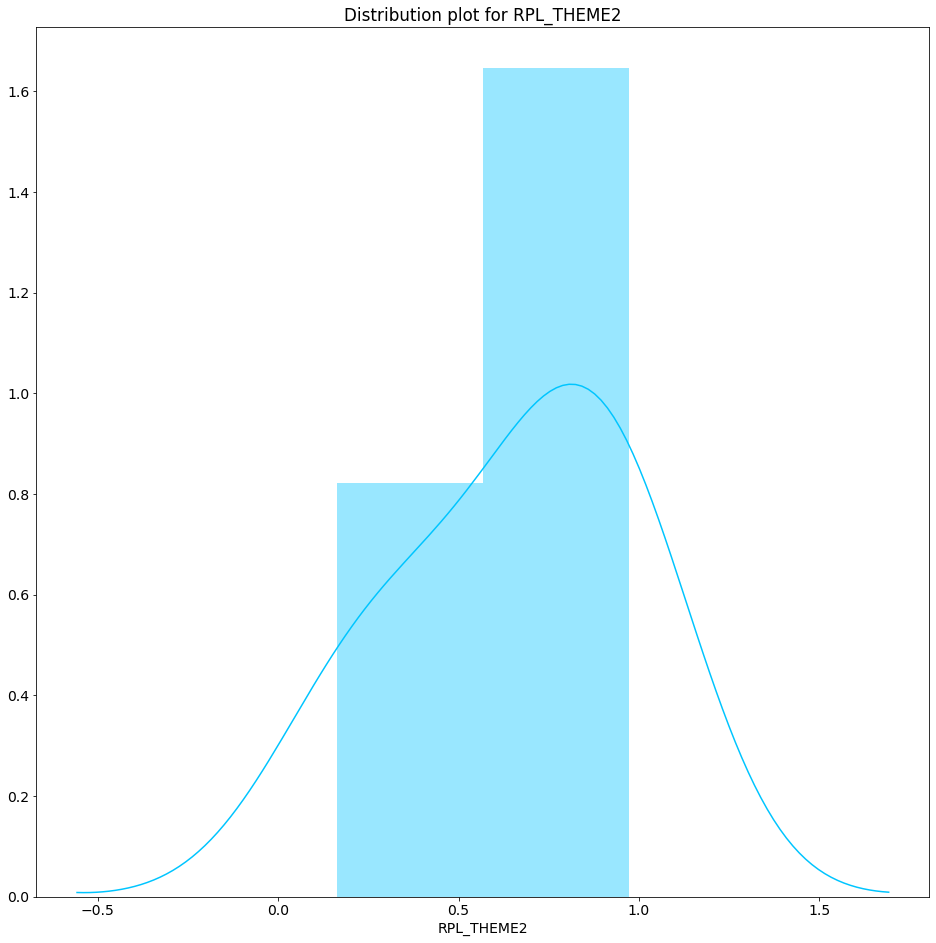

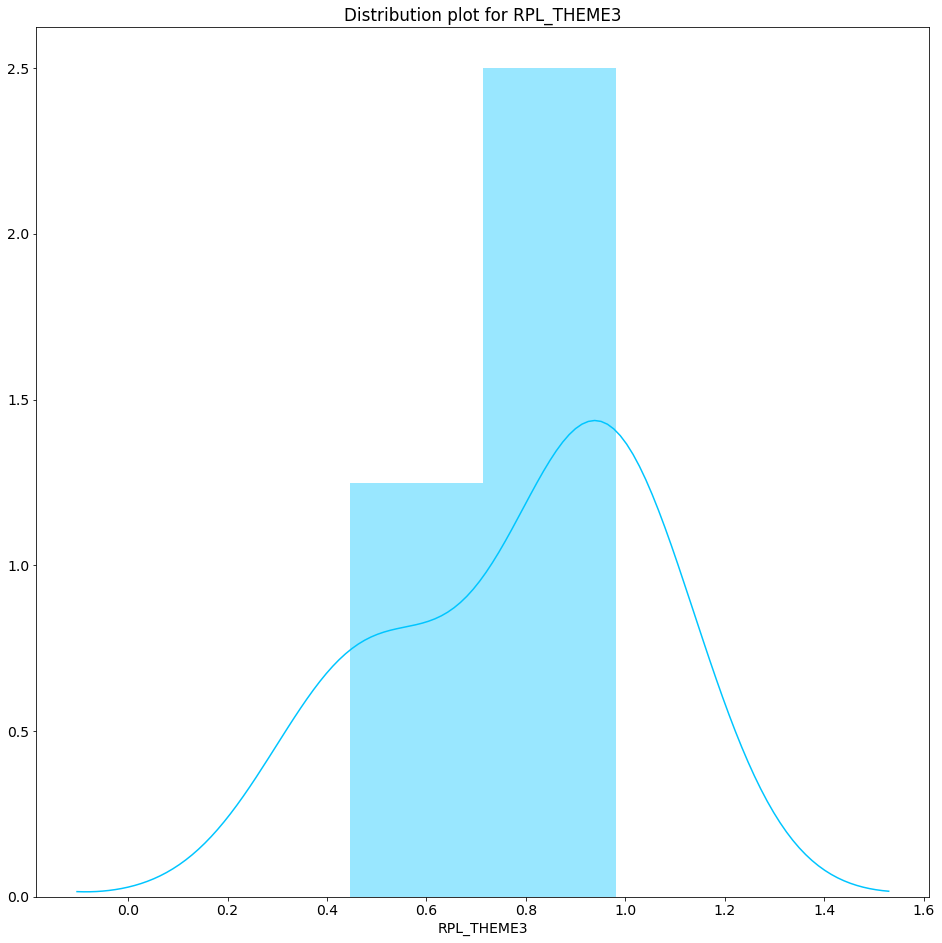

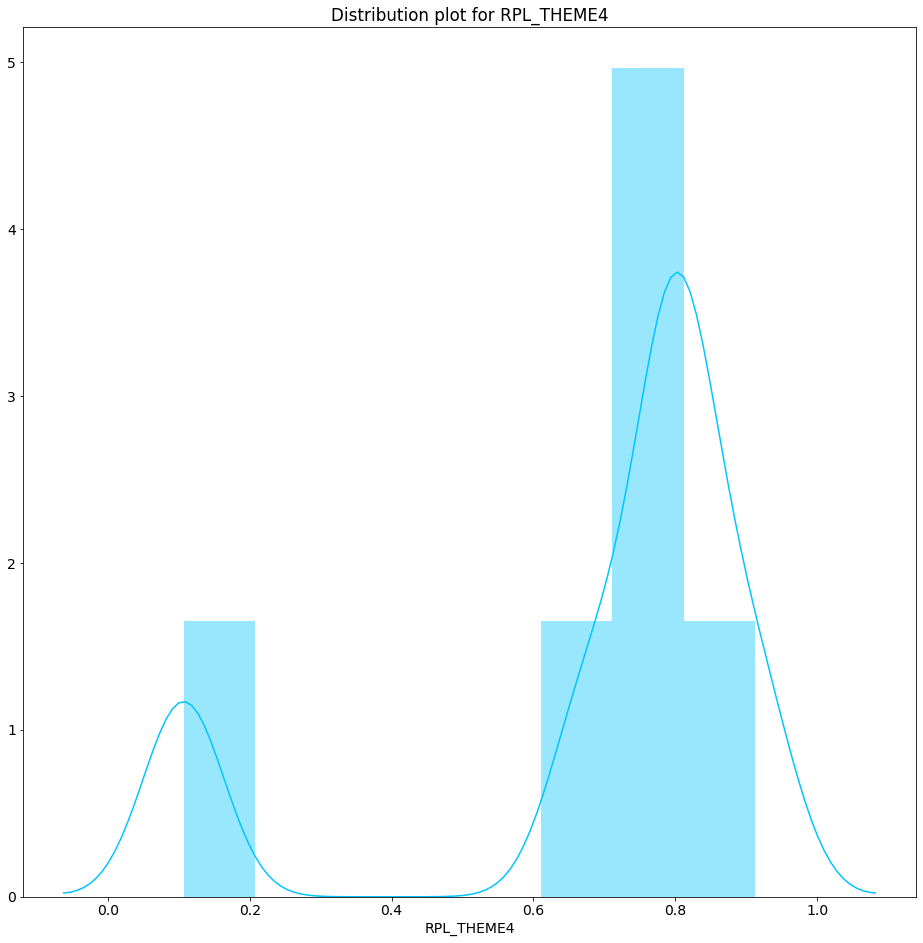

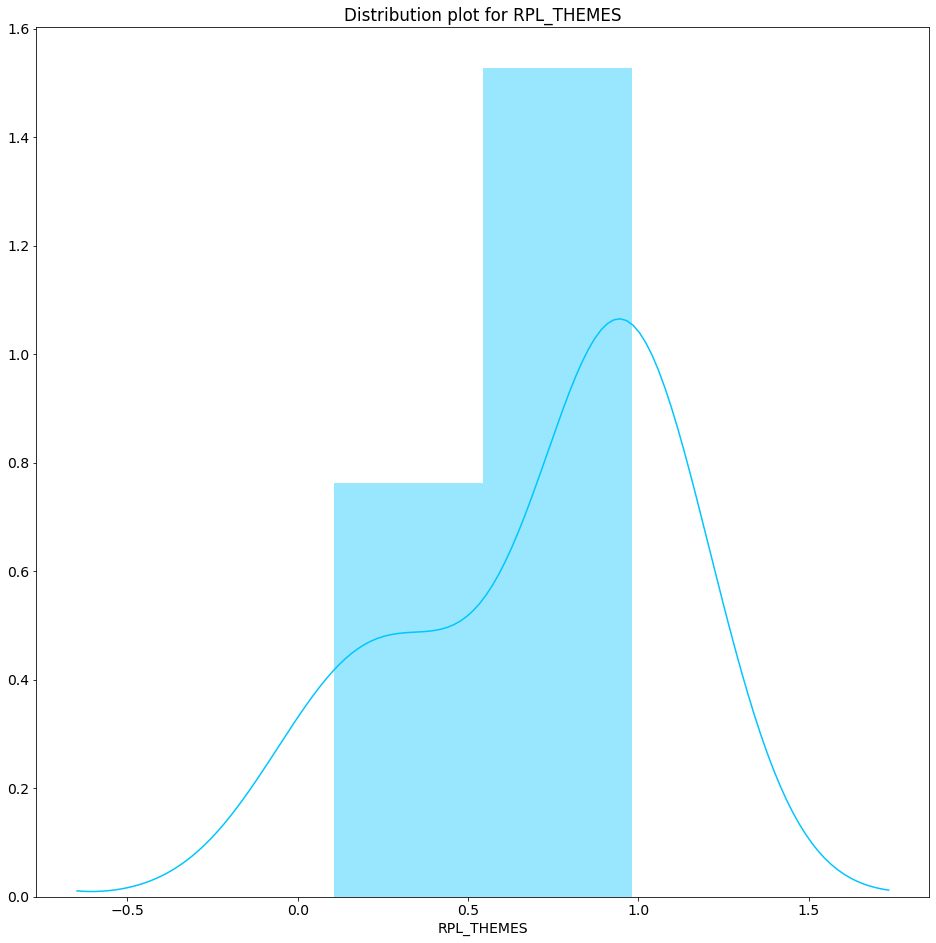

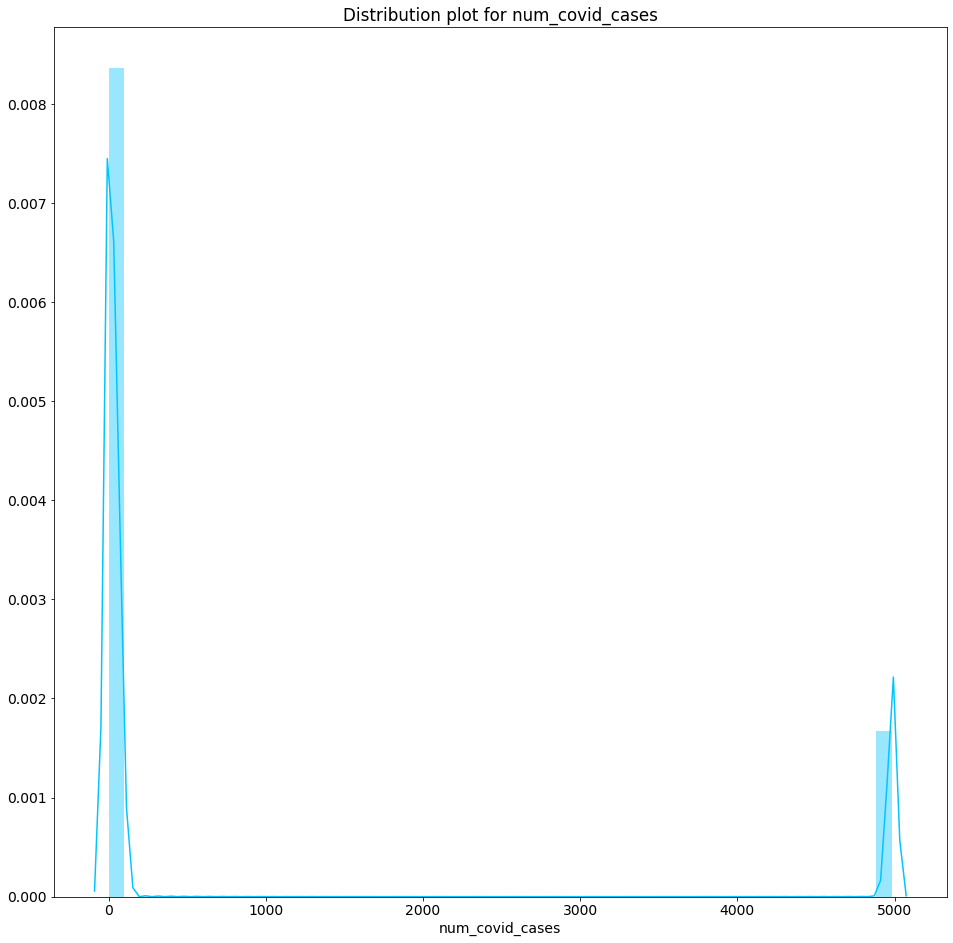

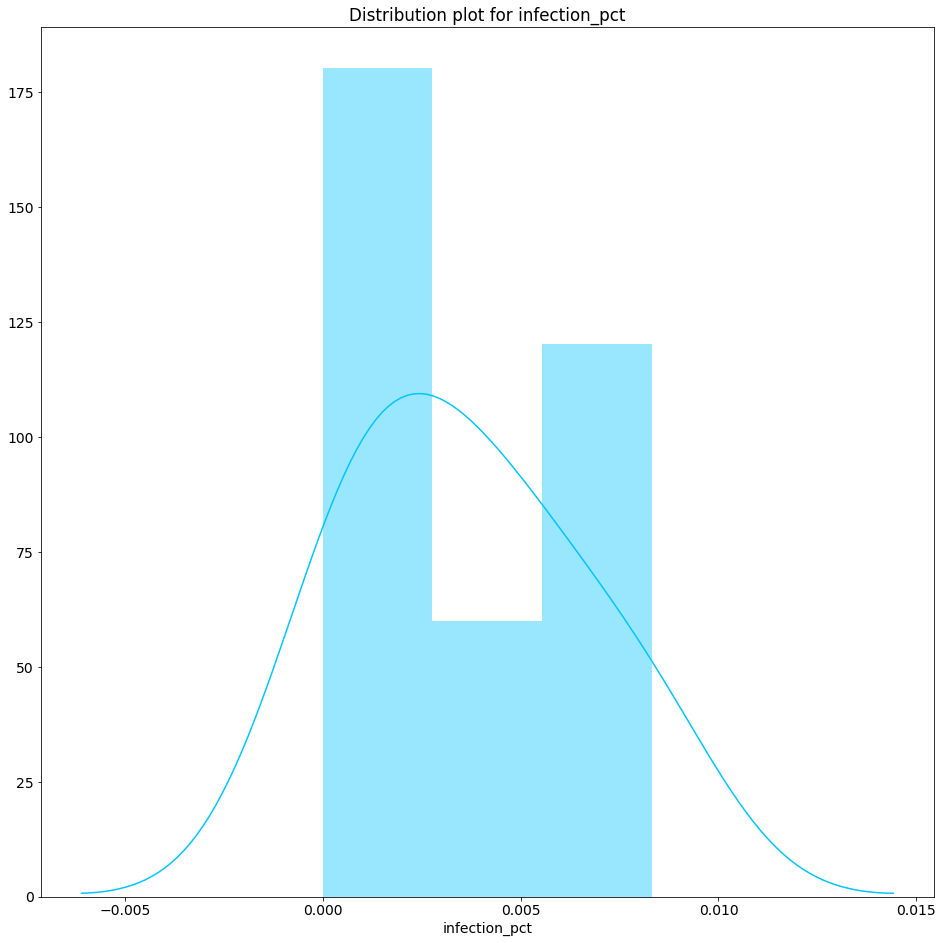

In [23]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_10)

### Distribution Plots for Region 11

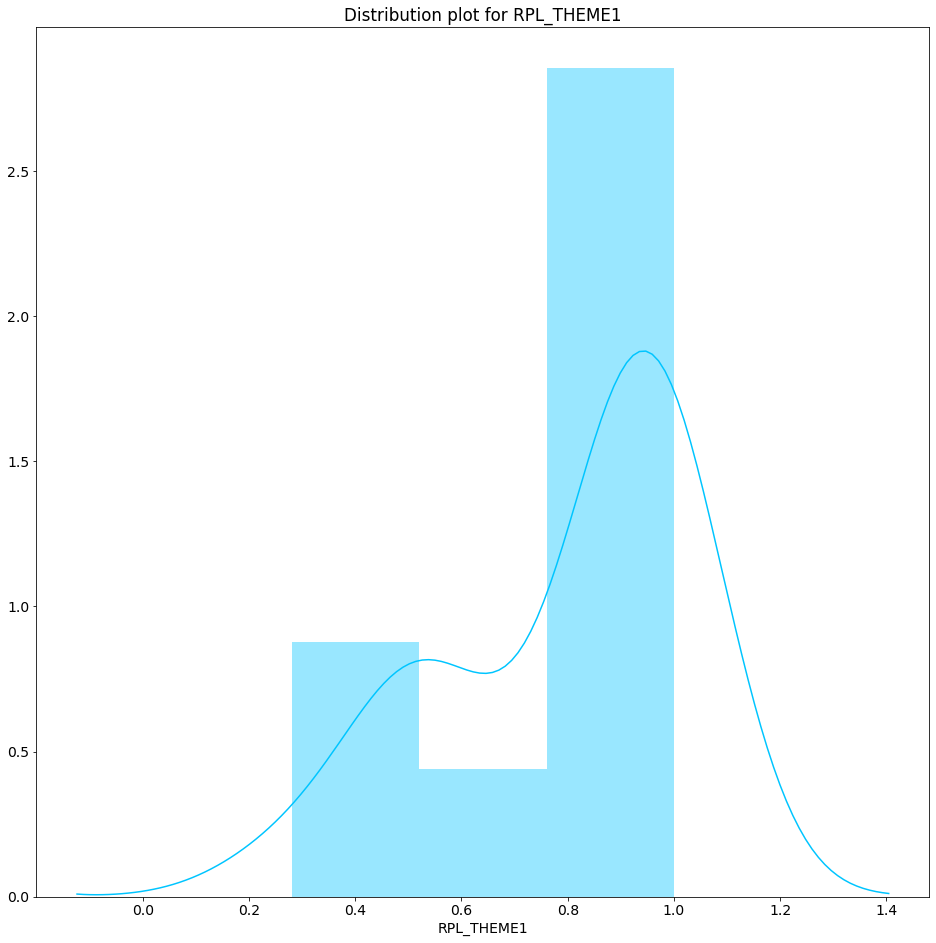

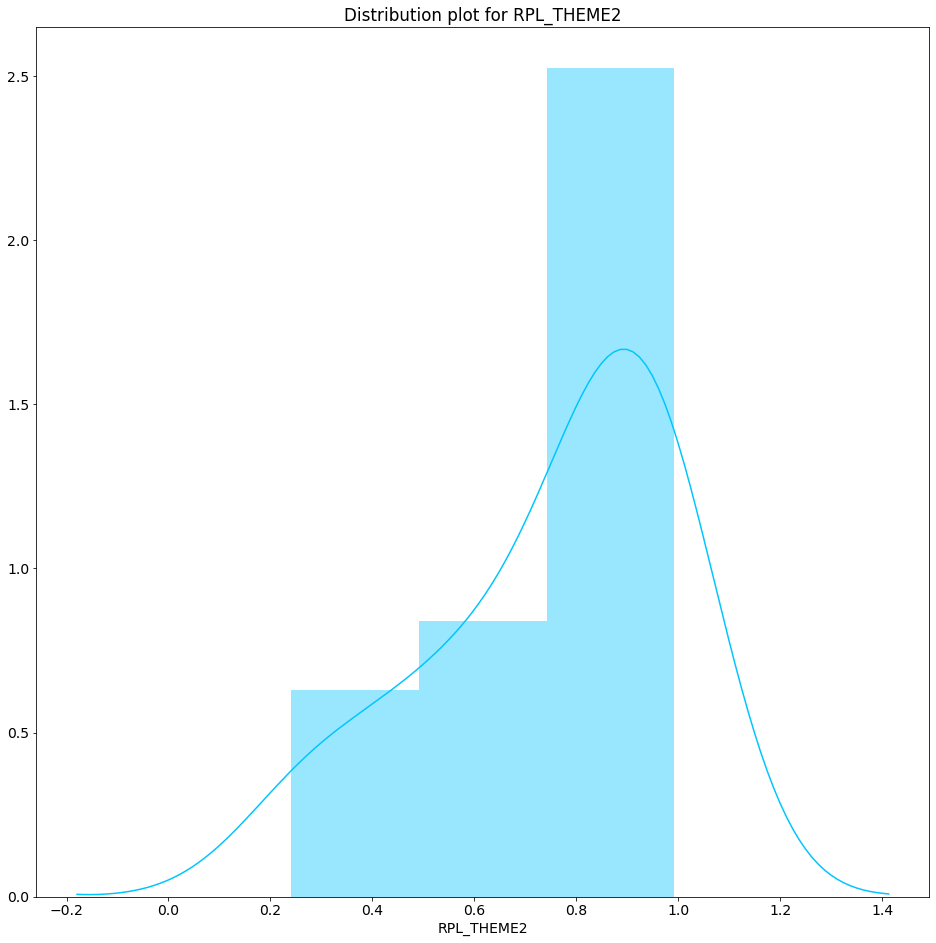

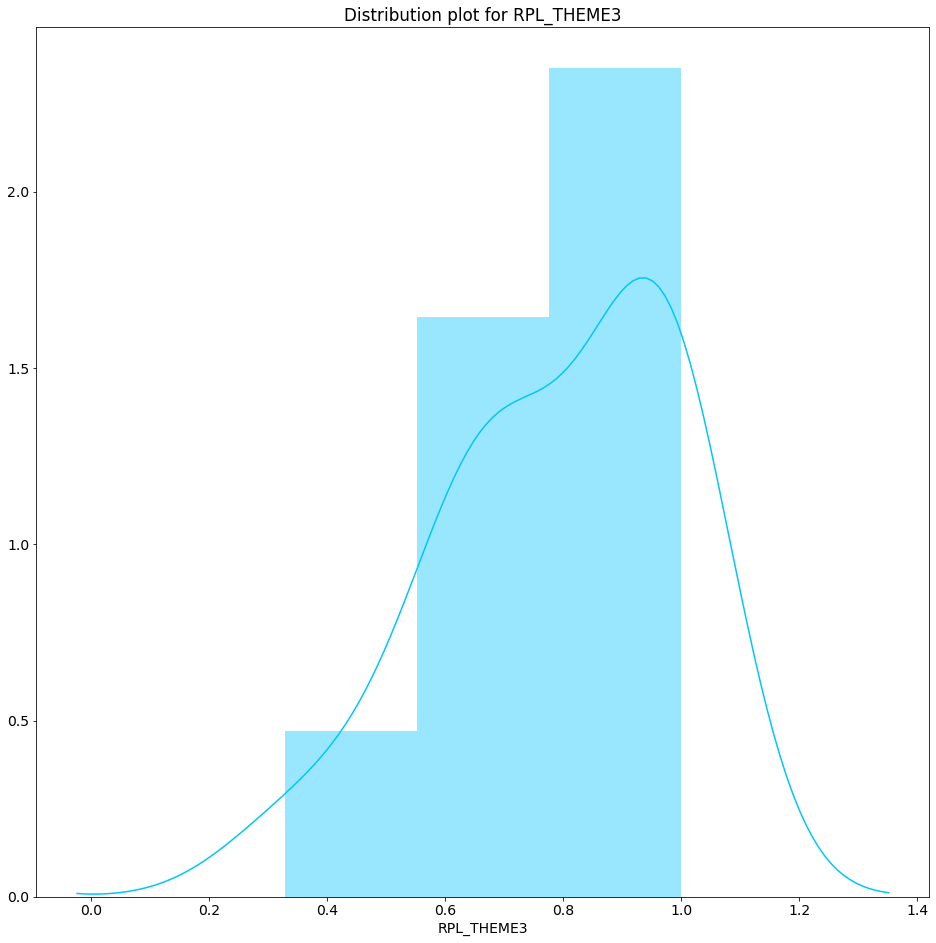

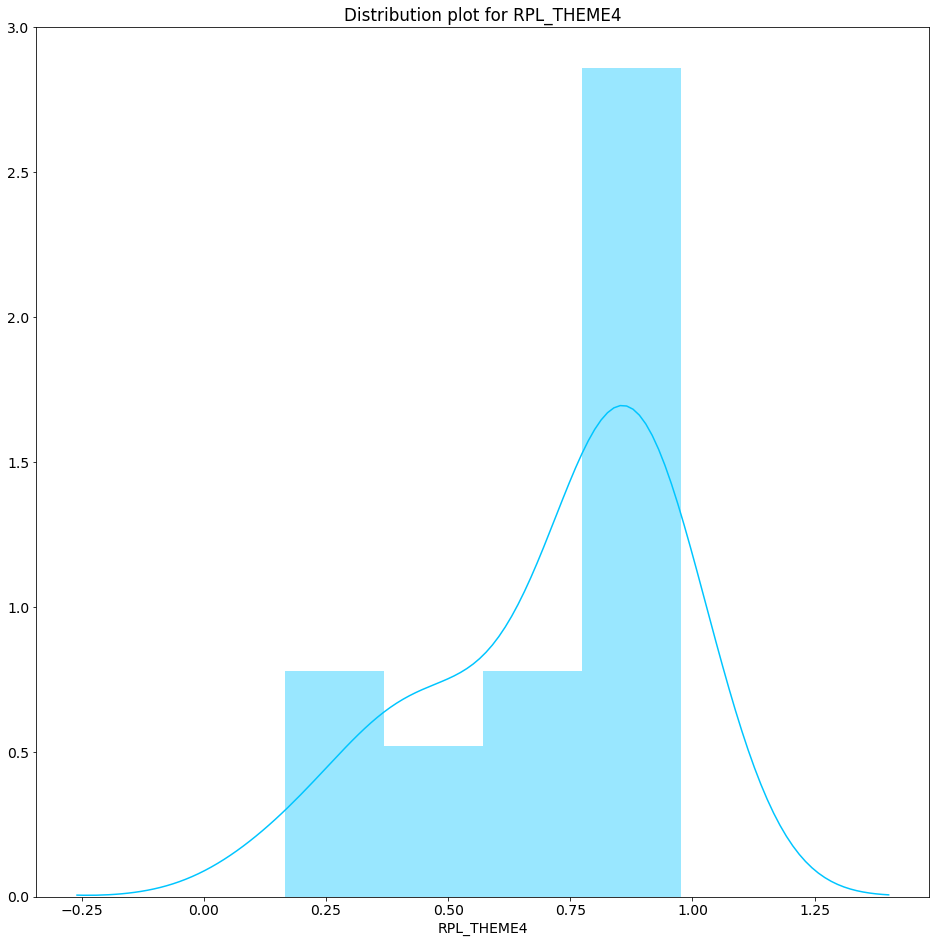

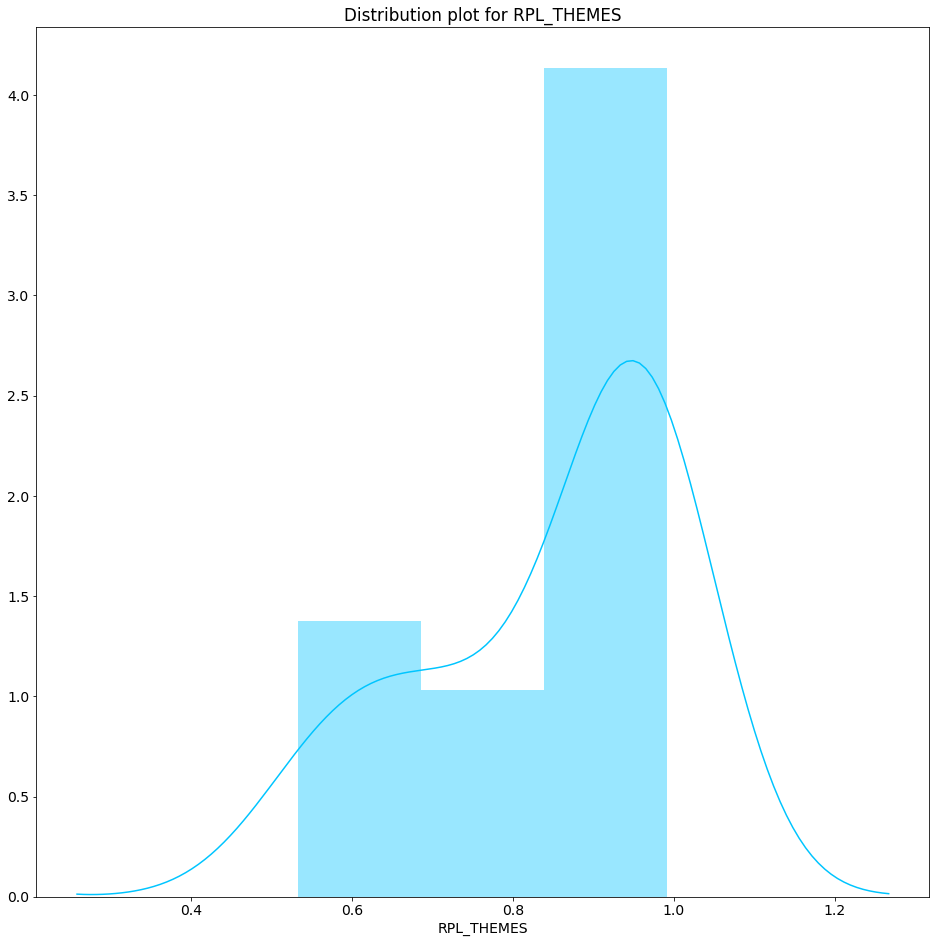

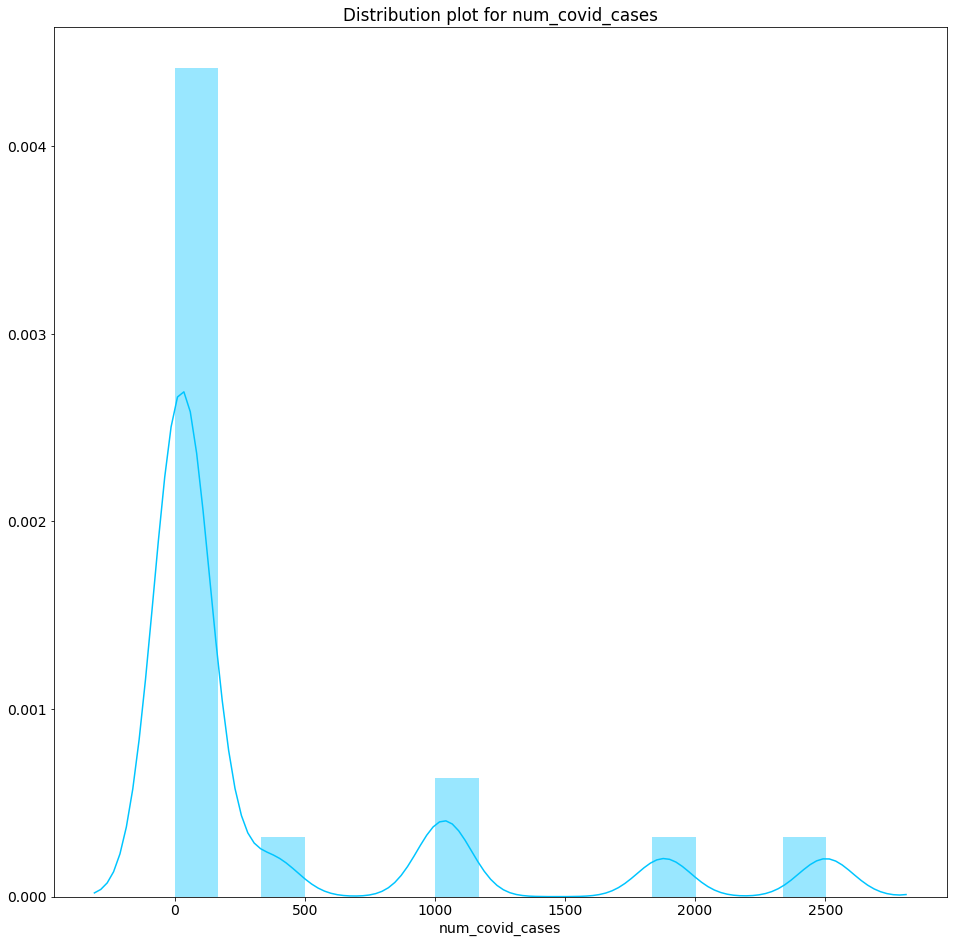

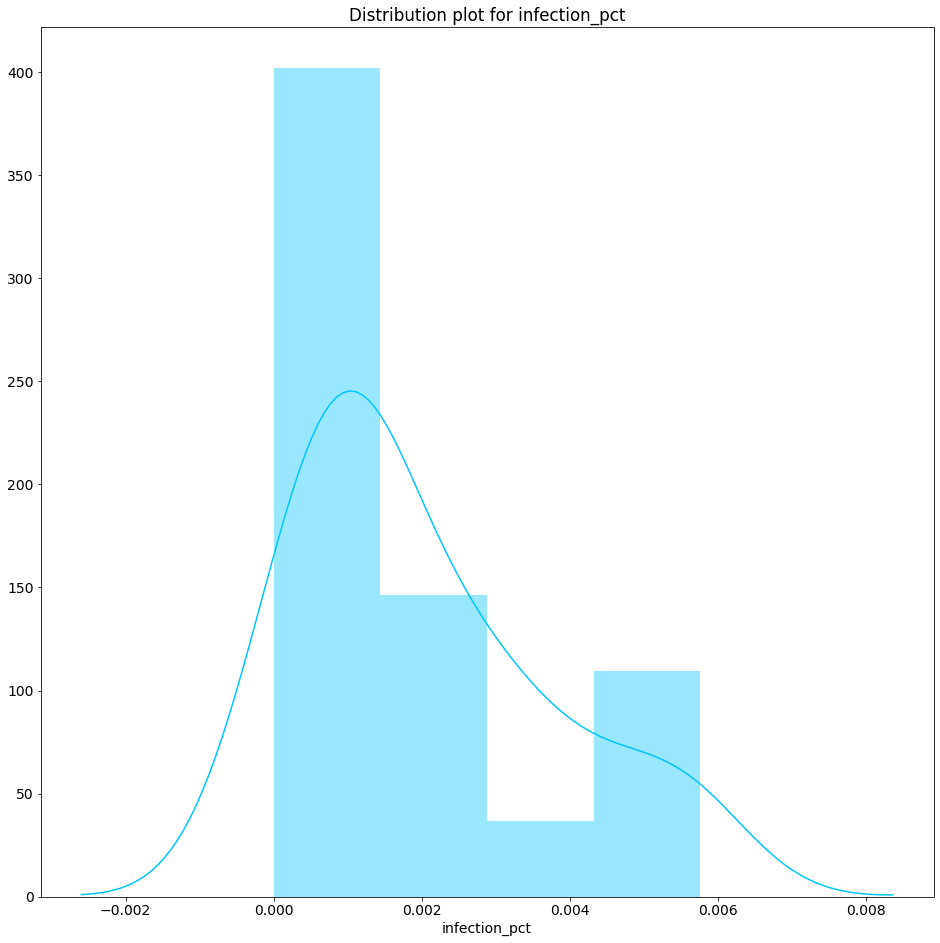

In [24]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_11)

[**Back to EDA begining**](#explore_data)<br>

[**Back to top**](#top)<br>

<a id='cat_pop_density'></a>

## What does the Distribution of our Data look like when we use the Categorical column for population density?

- Here we will look at the same columns as we did by Region but will use the ```pop_density_category```

1. **Low** - This will be all the counties that have a population density that are in the bottom 25%
2. **High** - This will be all the counties that have a population density that are in the top 25%
3. **Mid** - These will be the remaining counties

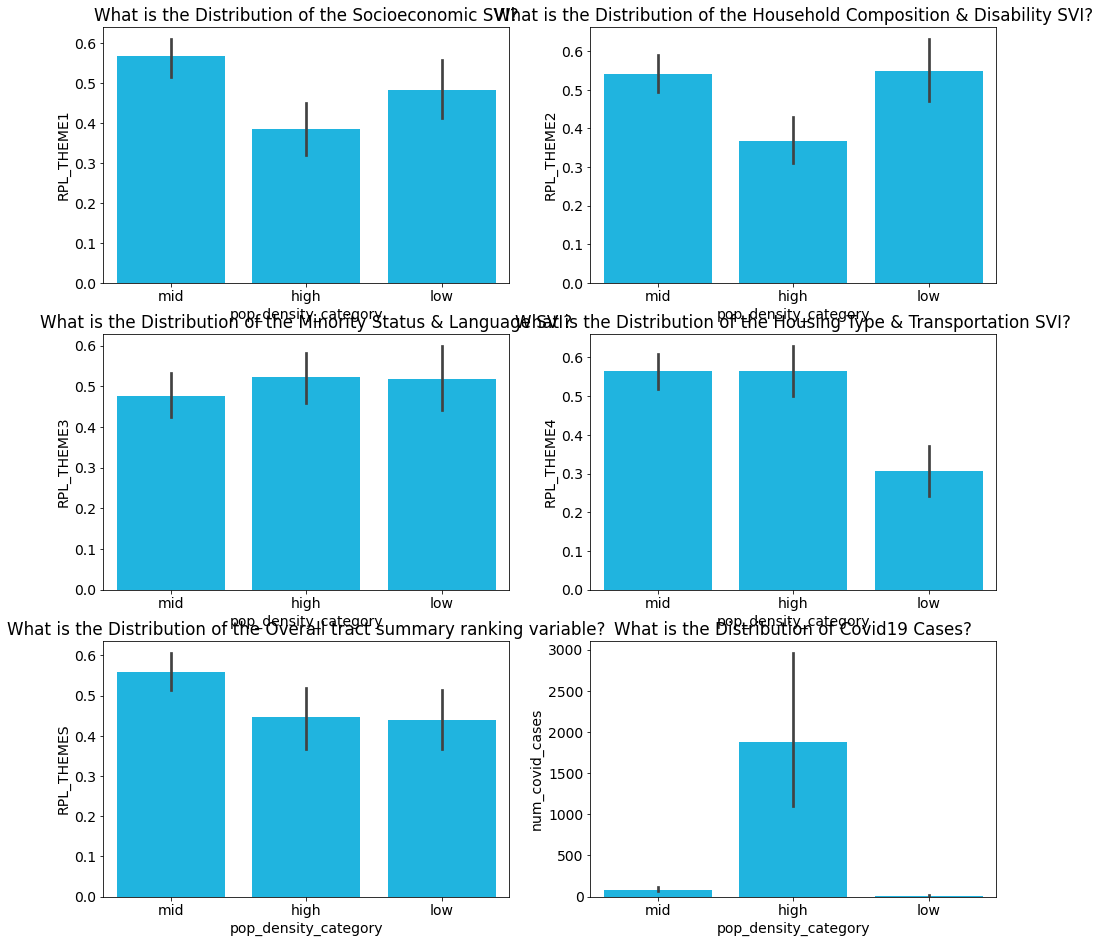

In [25]:
explore.plot_categorical_pop_density_barplots(df)

In [26]:
# Subset the data into Low, Mid and Hight Population Density Dataframes
df_low, df_mid, df_high = explore.pop_density_categoricaol_subset_for_distro_plots(df)

### Distribution Plots for Low Population Density

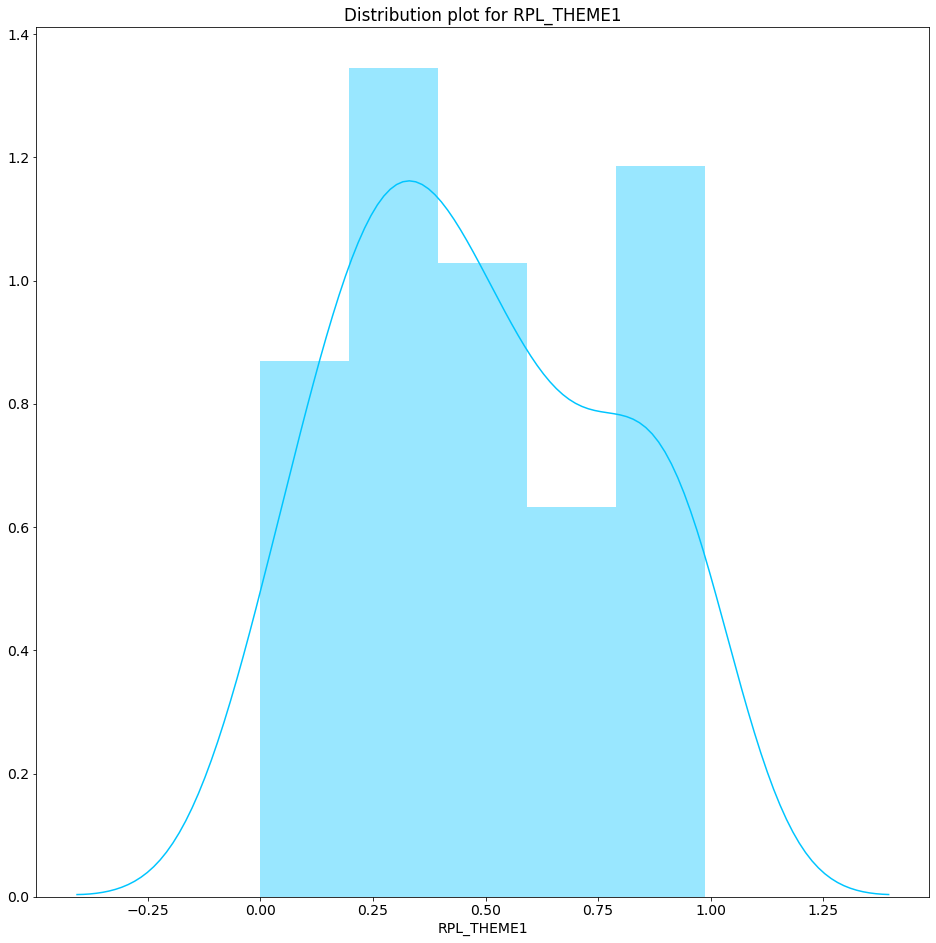

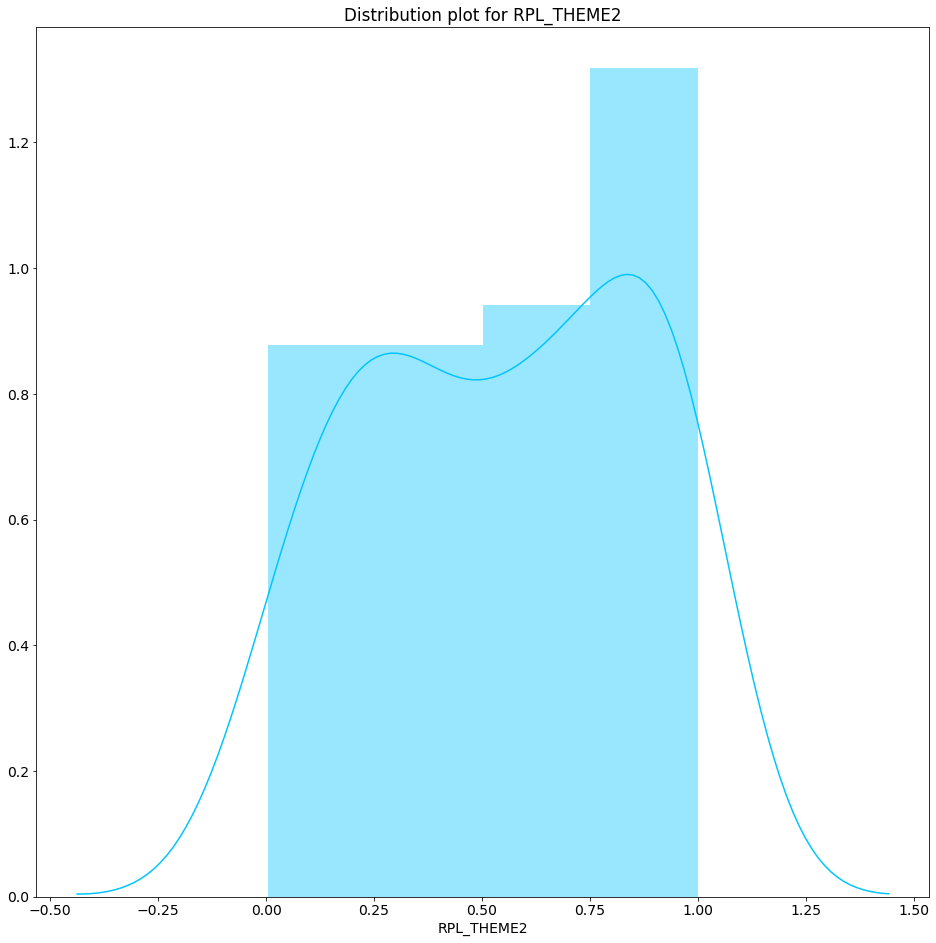

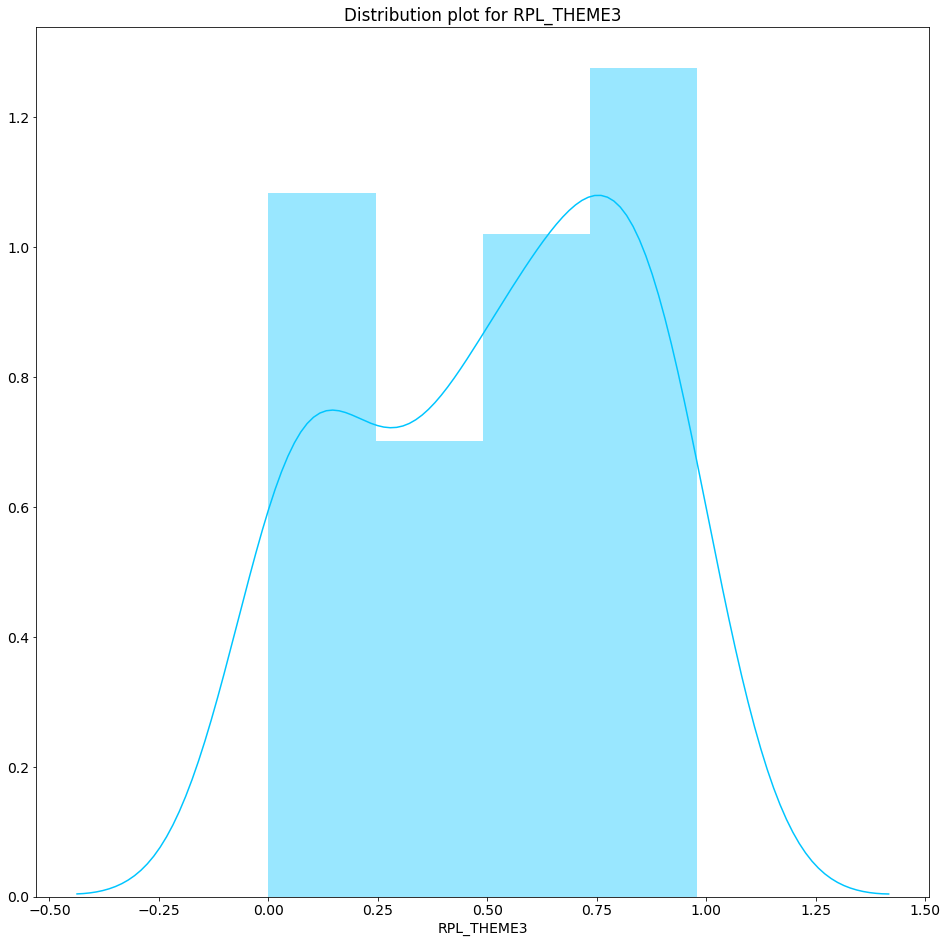

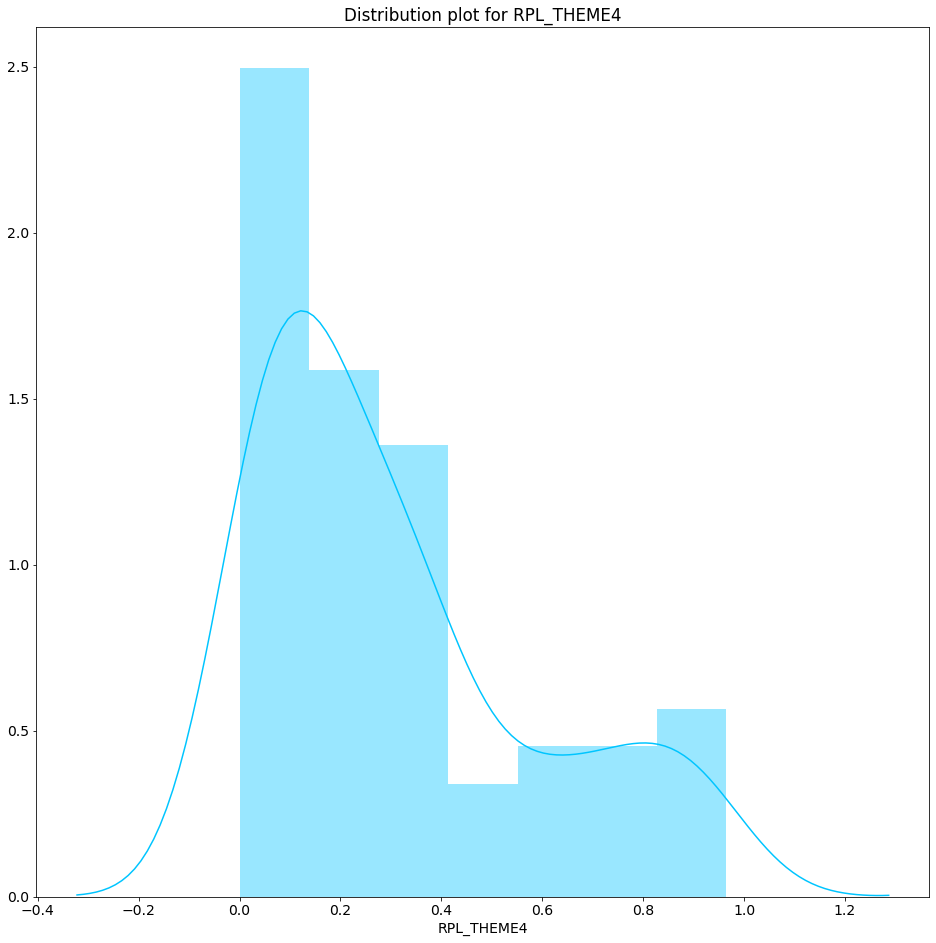

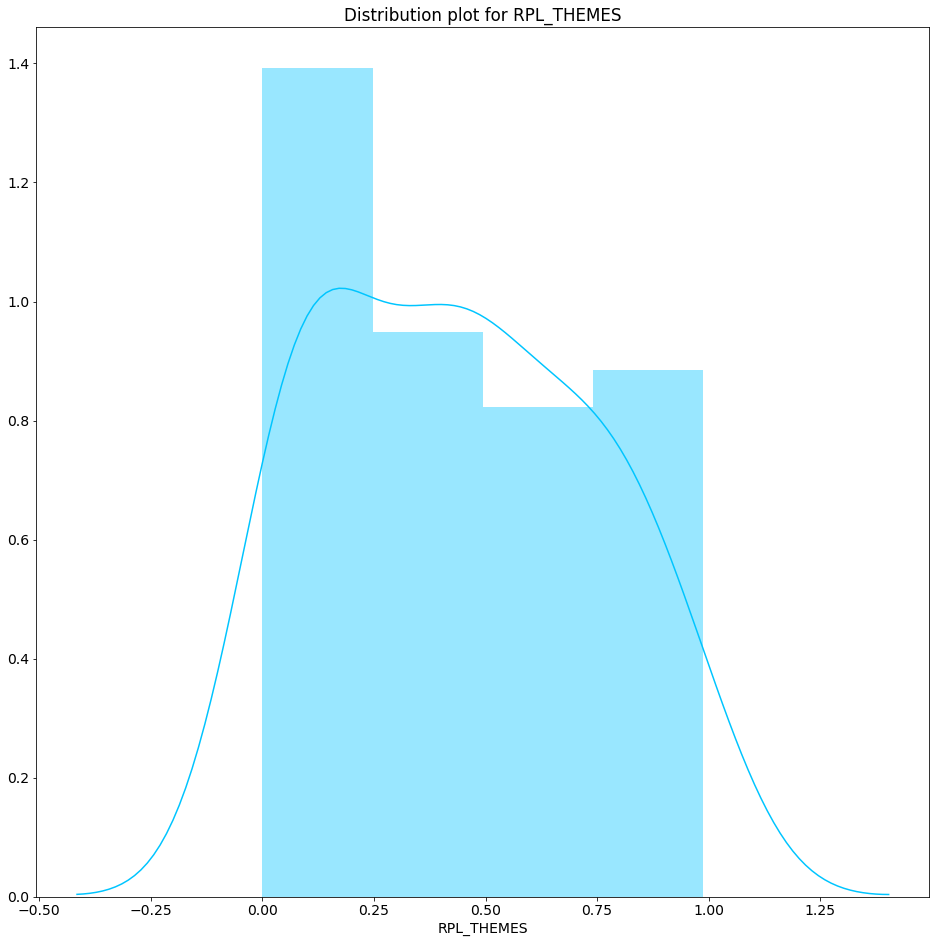

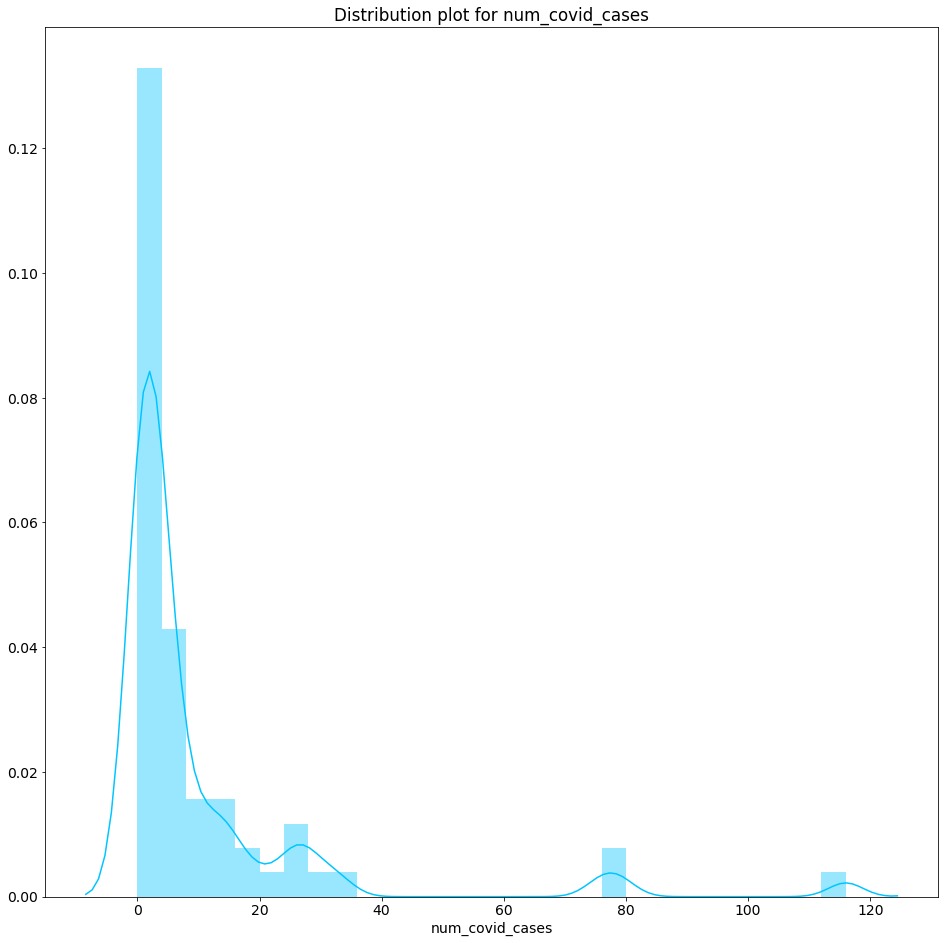

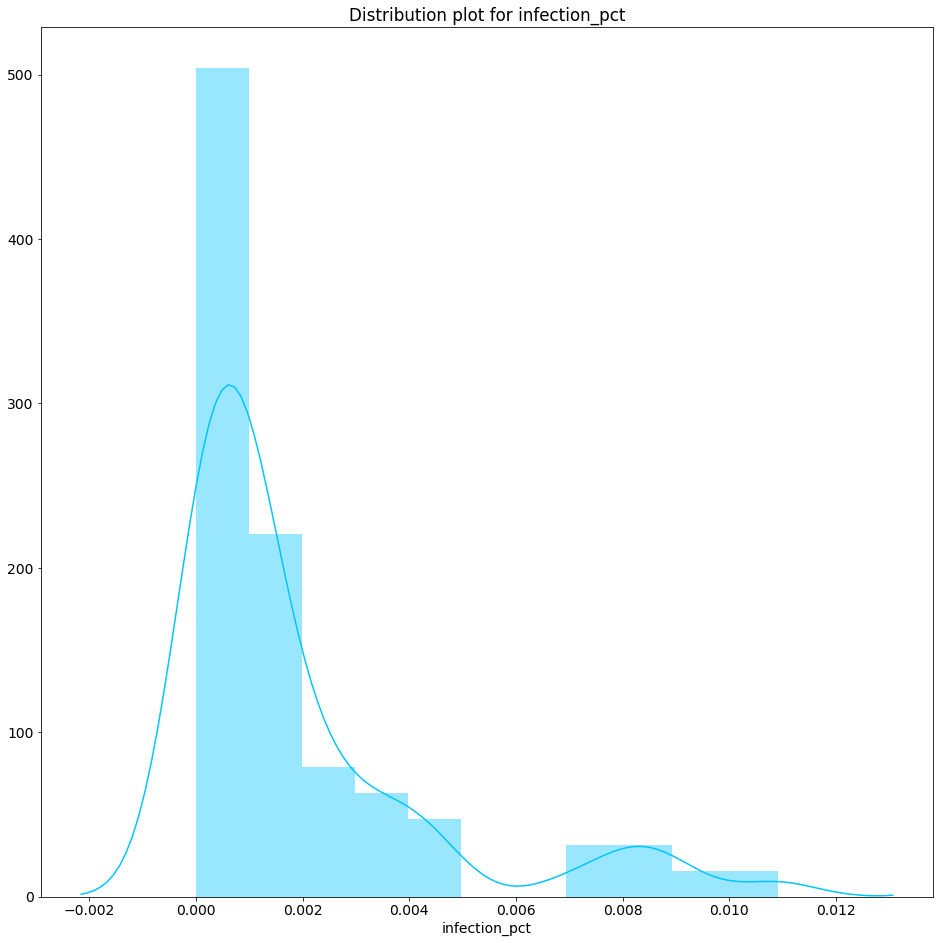

In [27]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_low)

### Distribution Plots for Low Population Density

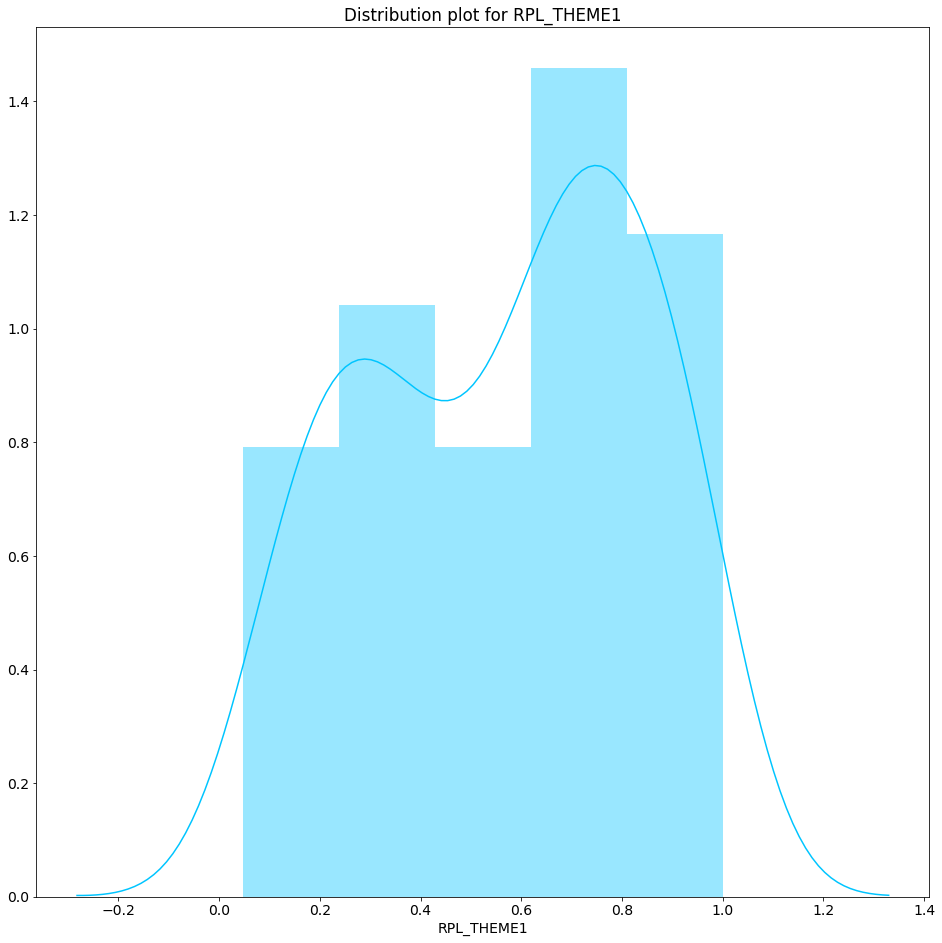

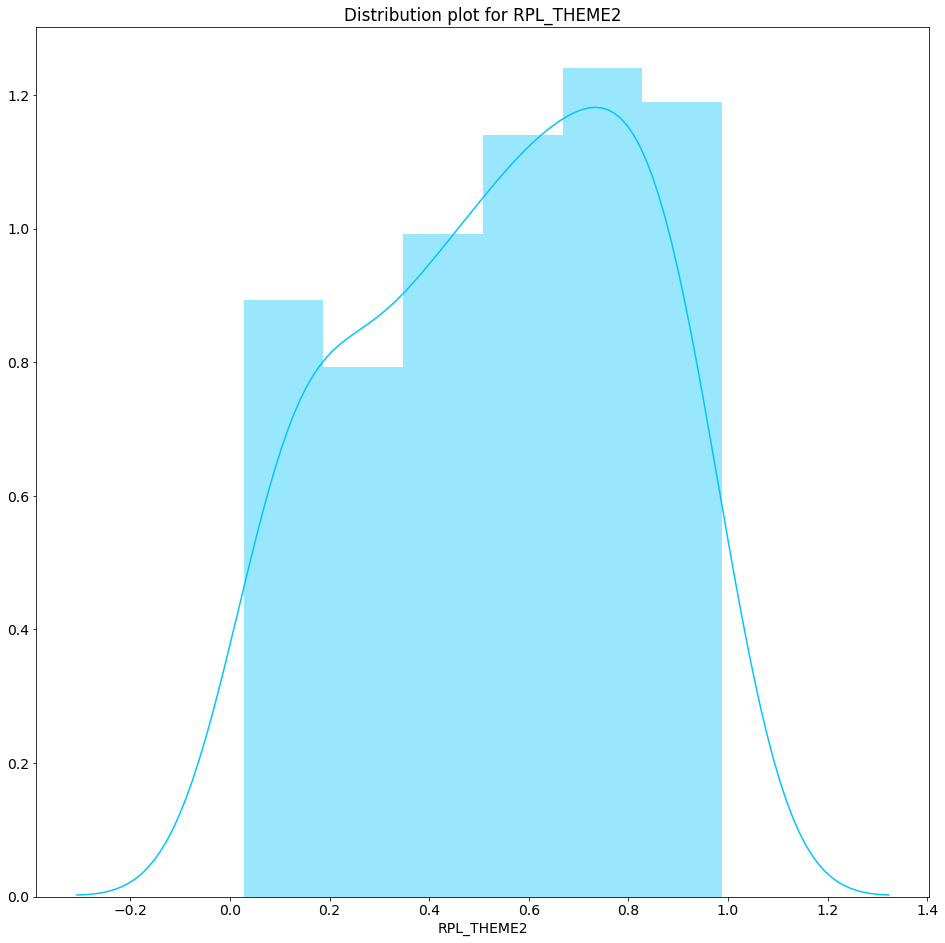

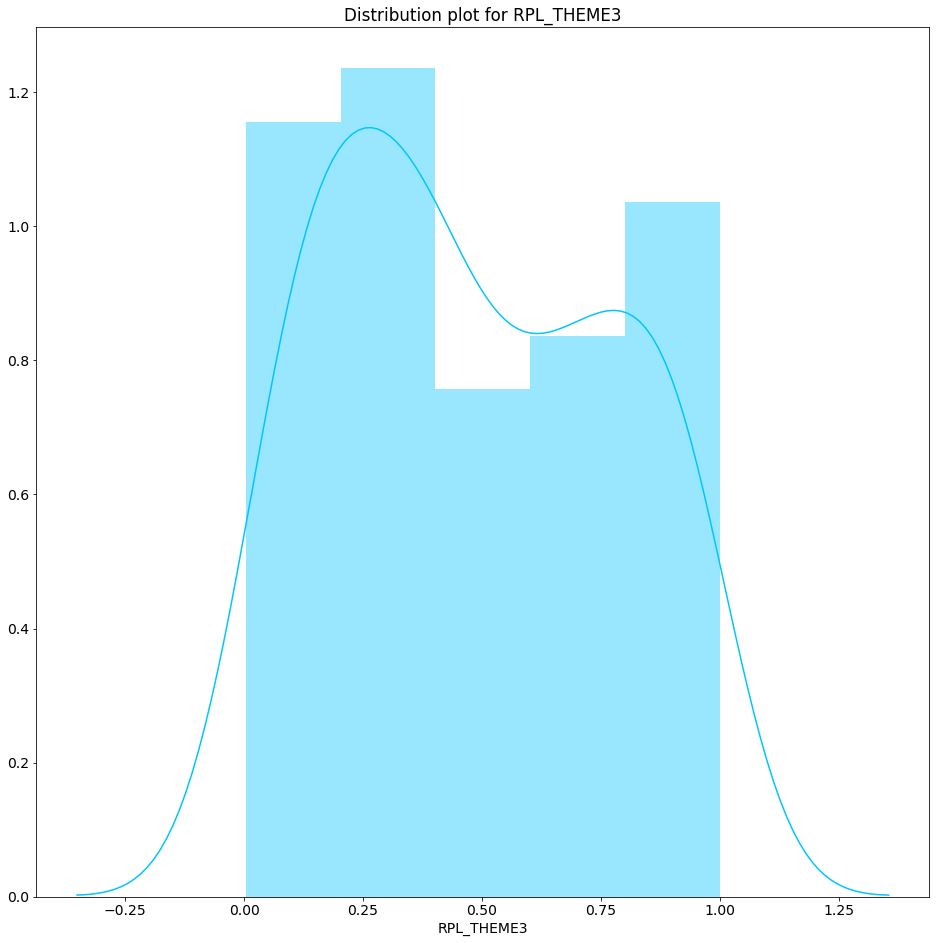

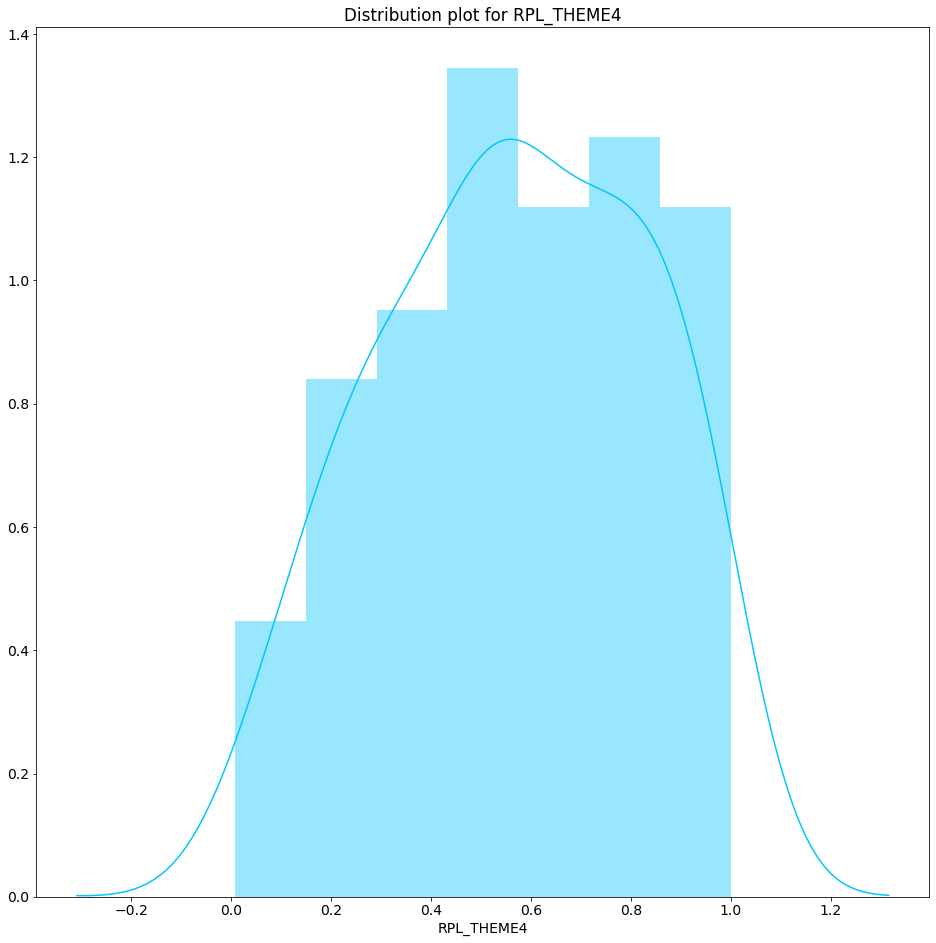

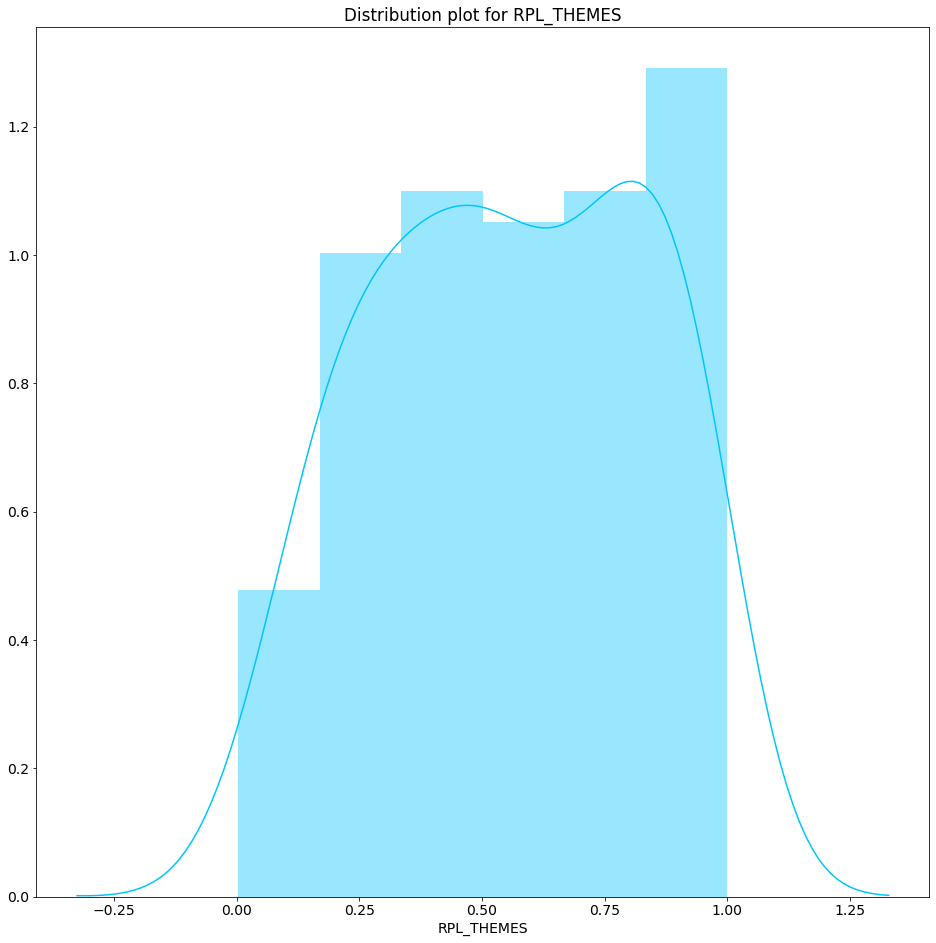

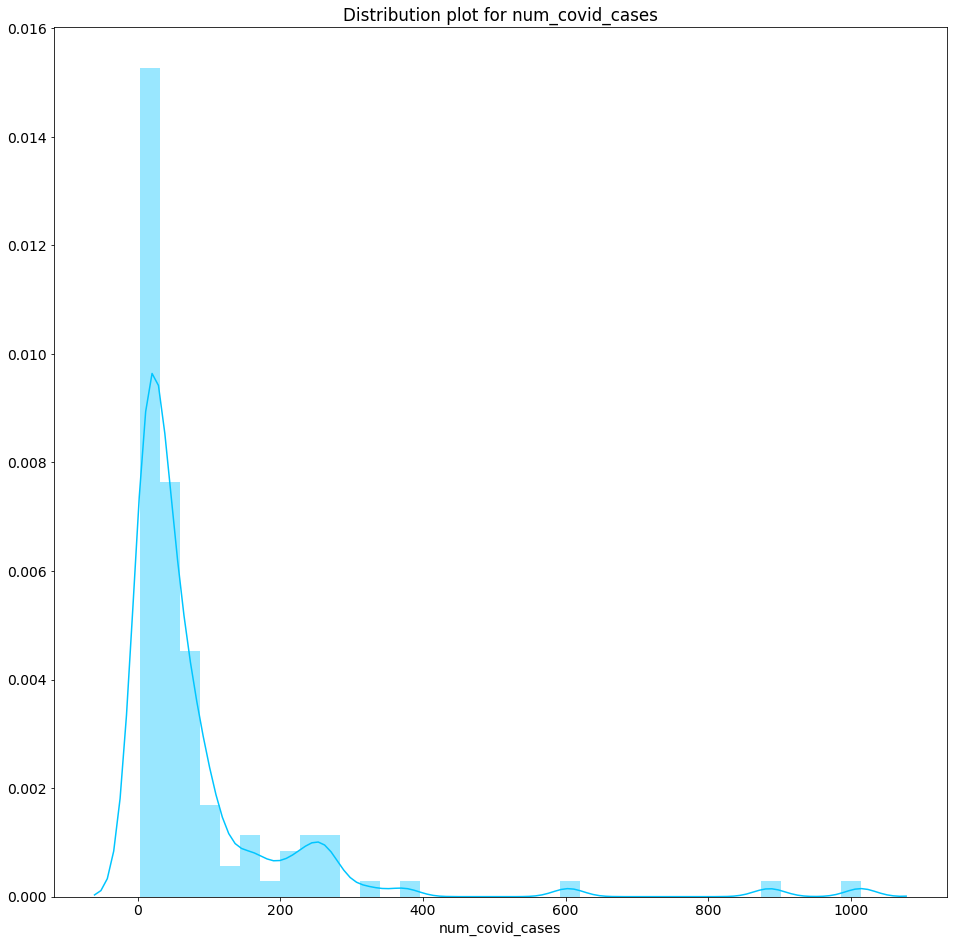

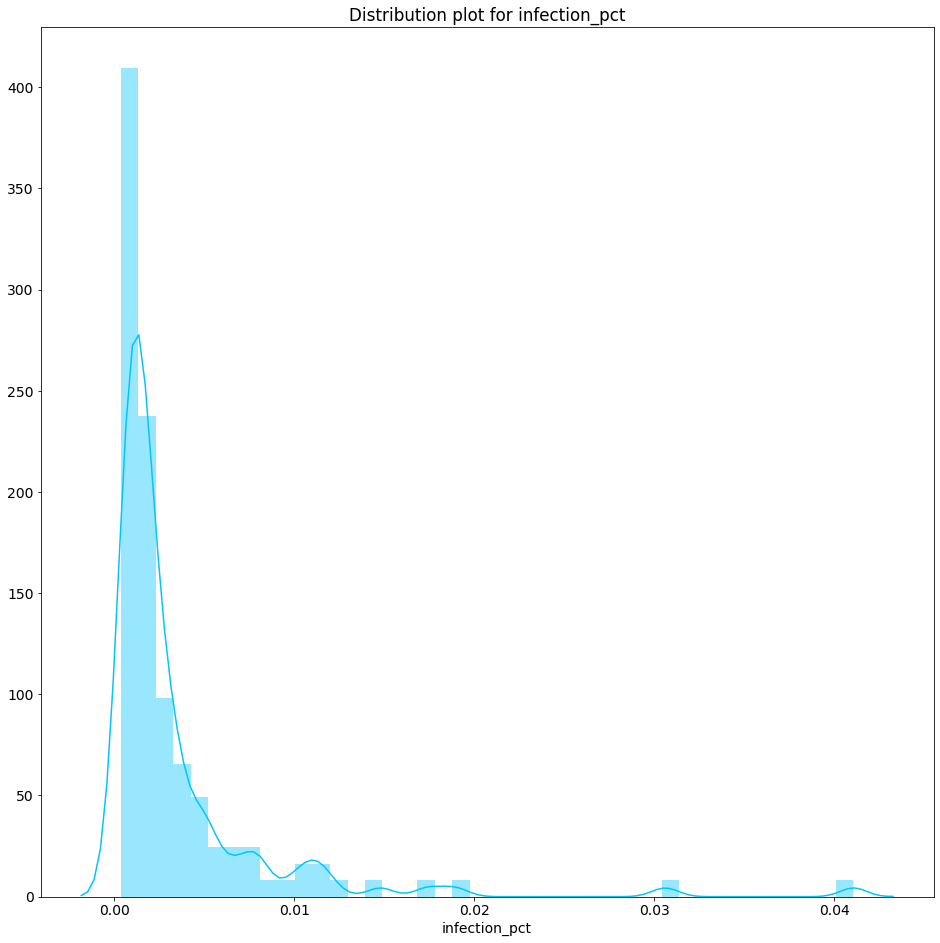

In [28]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_mid)

### Distribution Plots for Low Population Density

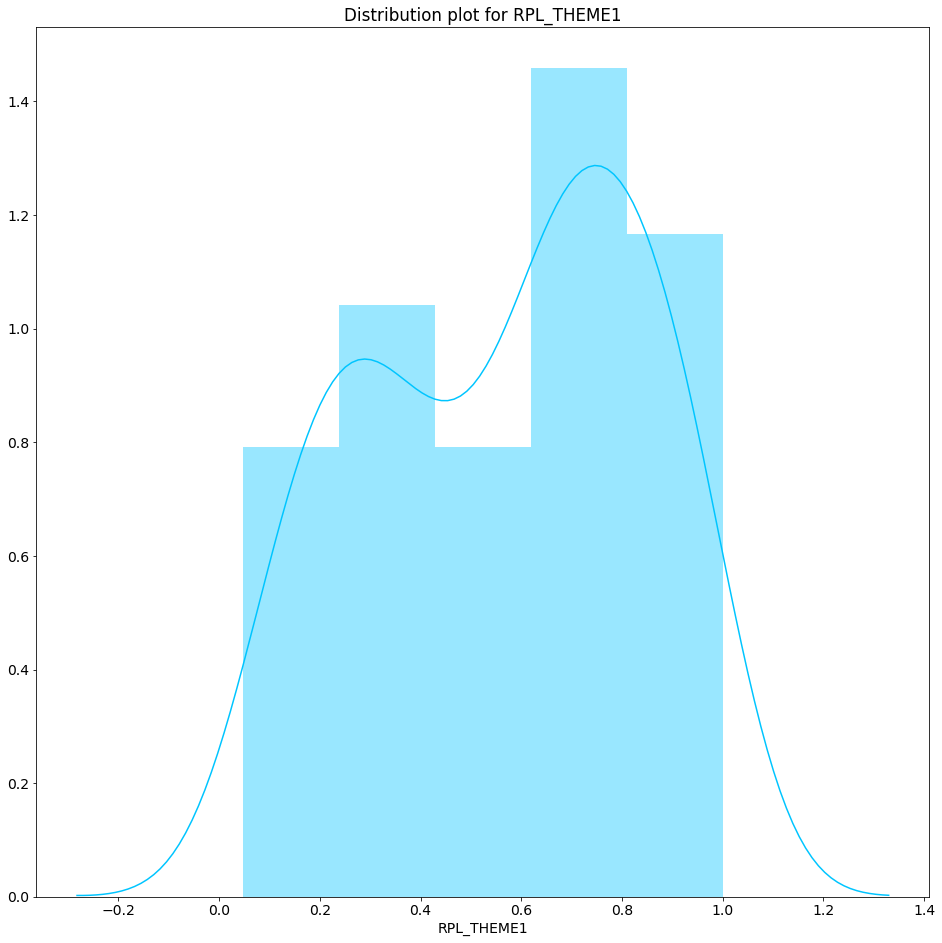

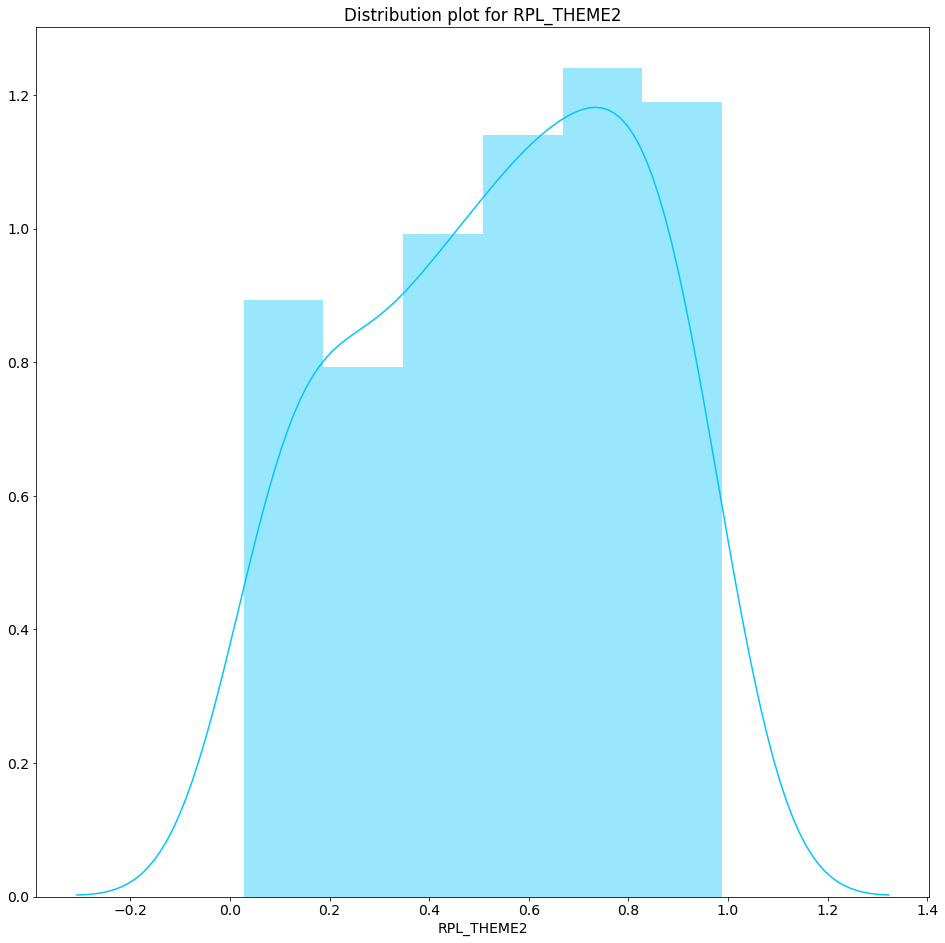

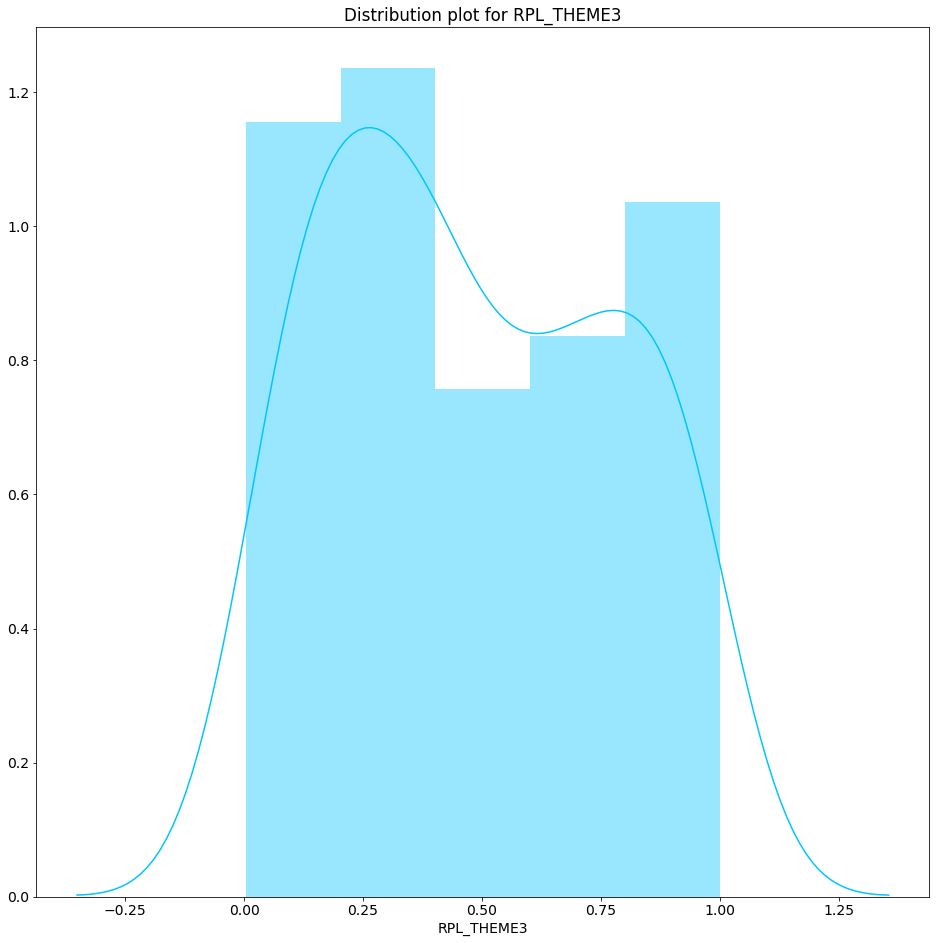

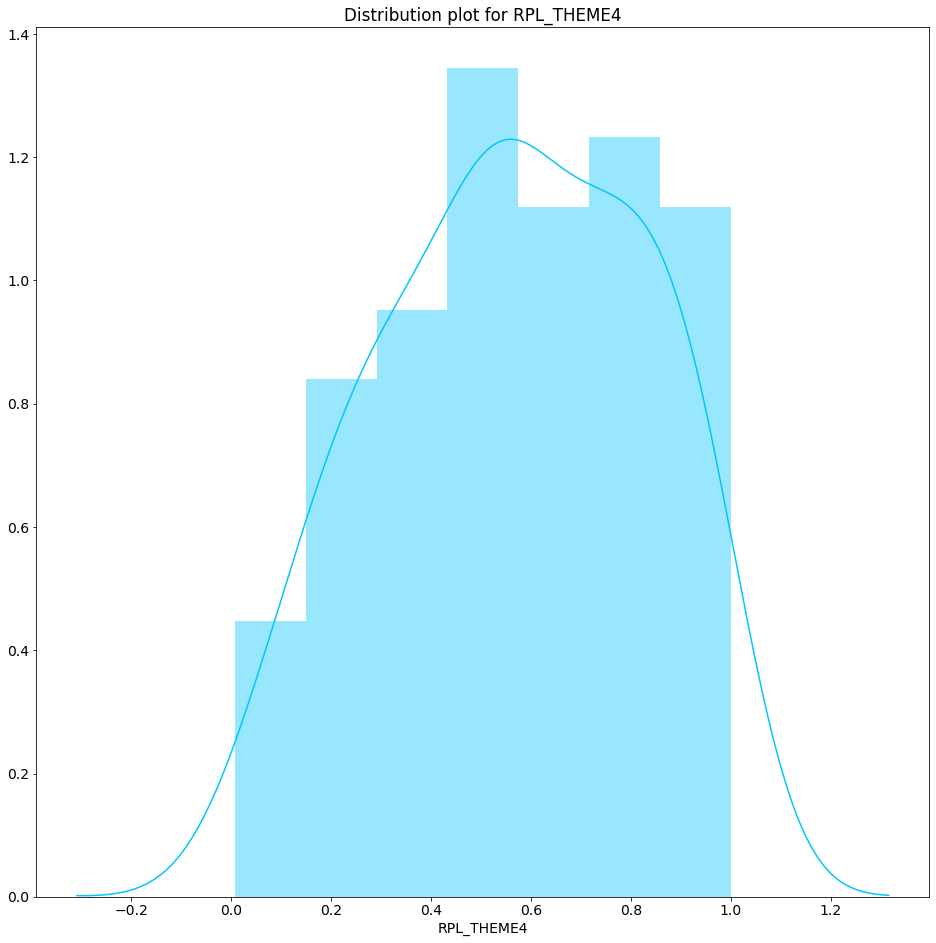

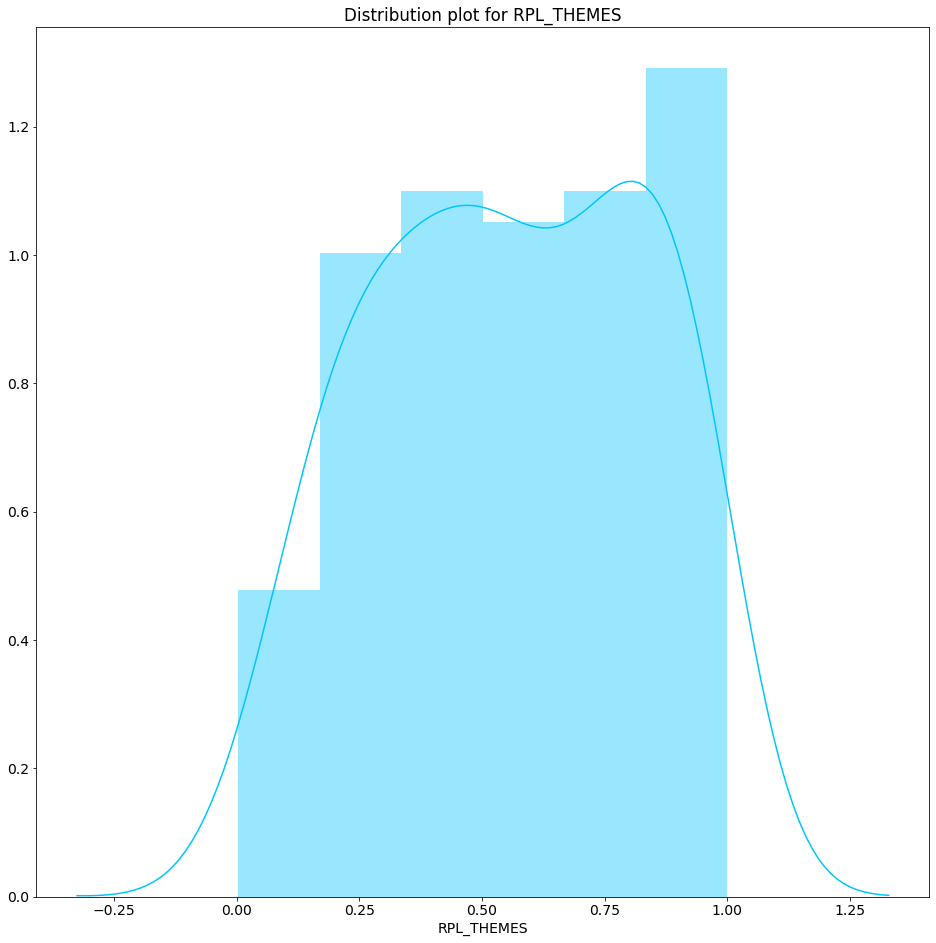

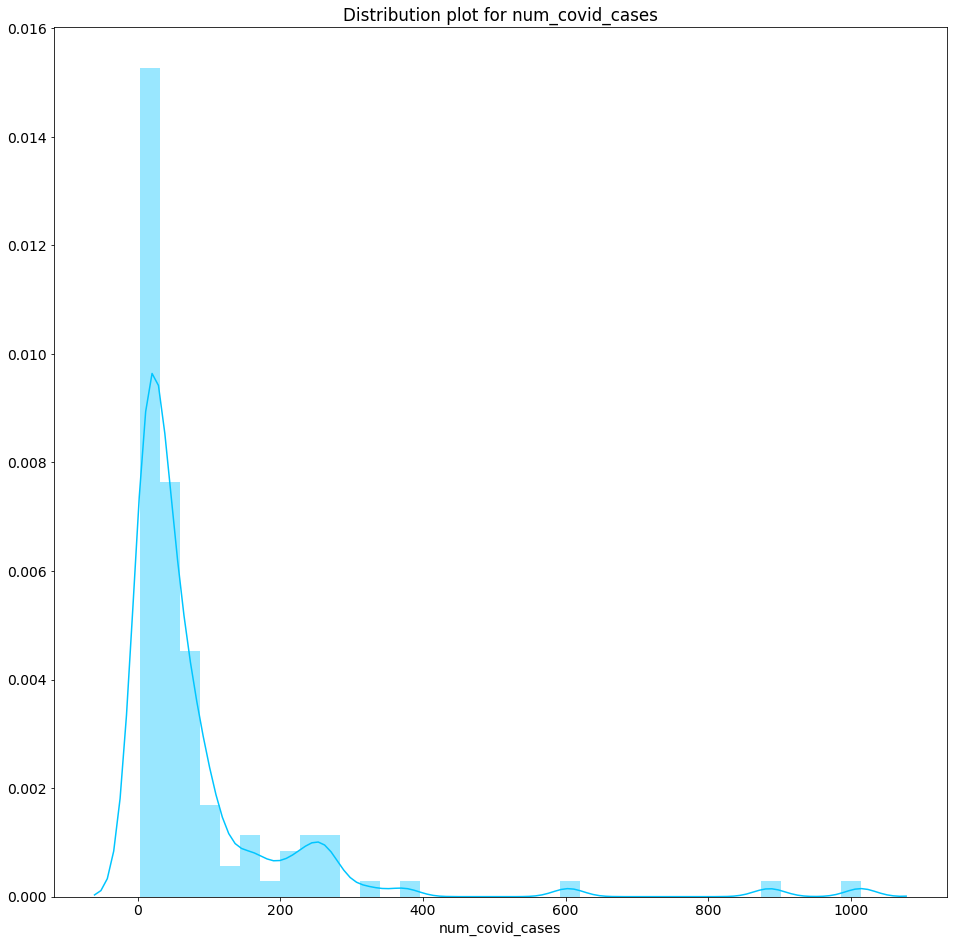

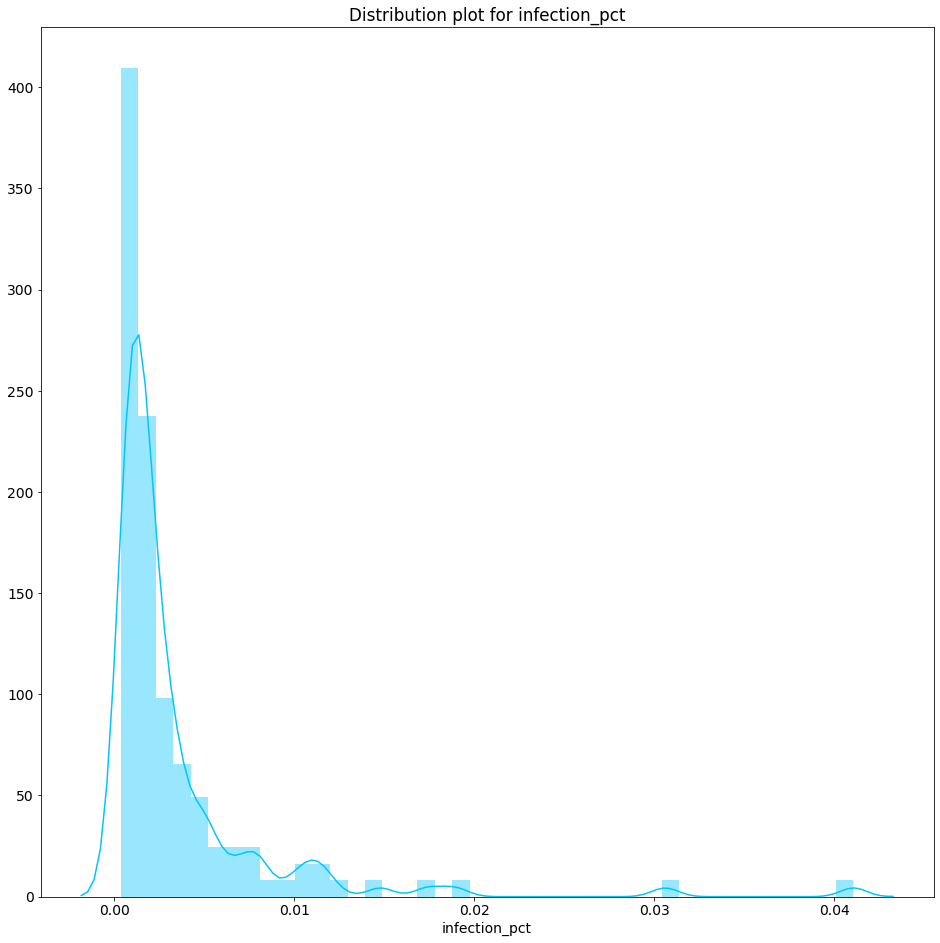

In [29]:
#bring in distroplots
explore.distro_plot_for_entire_dataframe(df_high)

[**Back to Distribution Data whith Categorical Population Density Beginning**](#cat_pop_density)<br>

[**Back to top**](#top)<br>

<a id='pop_density_infection_percent'></a>

## Is there a linear correlation between population density and infection percent?

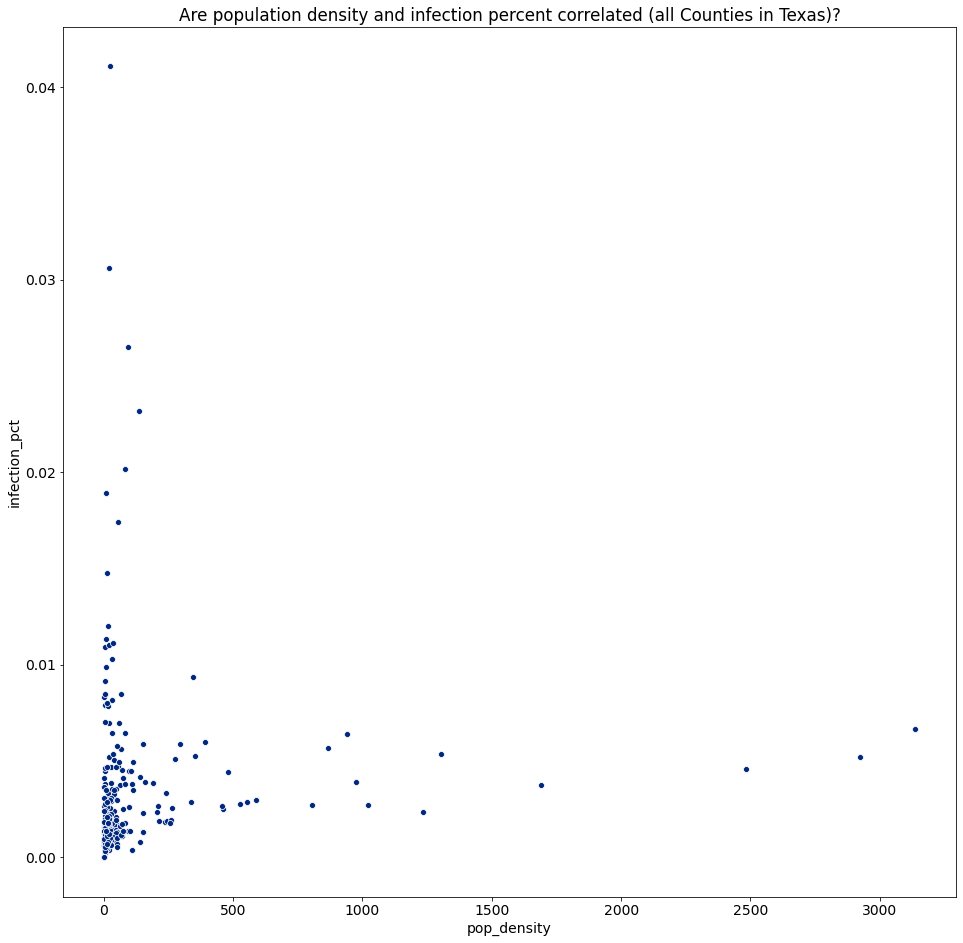

In [30]:
plt.title("Are population density and infection percent correlated (all Counties in Texas)?")
sns.scatterplot(df.pop_density, df.infection_pct, color = '#00287f')

**Takeaways**

It does not look like there is a great linear relationship between the 2, however we will run a statistical test to be sure.

### Pearsons R (Correlation Test)

We will set our $alpha$ to a confidence level of 95%

- $H_0$: There is no linear relationship between population density and infection percent
- $H_a$: There is no linear relationship between population density and infection percent

In [31]:
# set alpha
alpha = .05

# set our x and y
x = df.pop_density
y = df.infection_pct

#apply pearsons to get our probability(p) and coefician correlation(r)
r, p = stats.pearsonr(x, y)

print('r=', r)
print('p=', p)

r= 0.07453983782472609
p= 0.23650909096937012


In [32]:
if p > alpha:
    print(f'''
    Because p ({p:.2f}) > alpha (.05), we fail to reject the null hypothesis.
    This means that there is no statistical significance in the linear relationship
    between population density and infection rate. 
    ''')
else:
    print(f'''
    Because p ({p:.2f}) < alpha (.05), we reject the null hypothesis.
    This means that there is some statistical significance in the linear relationship
    between population density and infection rate. 
    ''')


    Because p (0.24) > alpha (.05), we fail to reject the null hypothesis.
    This means that there is no statistical significance in the linear relationship
    between population density and infection rate. 
    


Takeaways:
- Since there is no linear relationship between population density and infection percent for all of the County's, we will try subsetting them into similar sized population density's to see if we can find a linear relationship.

In [33]:
#get dataframes for each popluations density category low, mid, high
df_low, df_mid, df_high = explore.get_pop_density_categoricaol_subset(df)

### Do the Counties with a low density population have a linear relationship with Infection Rate?

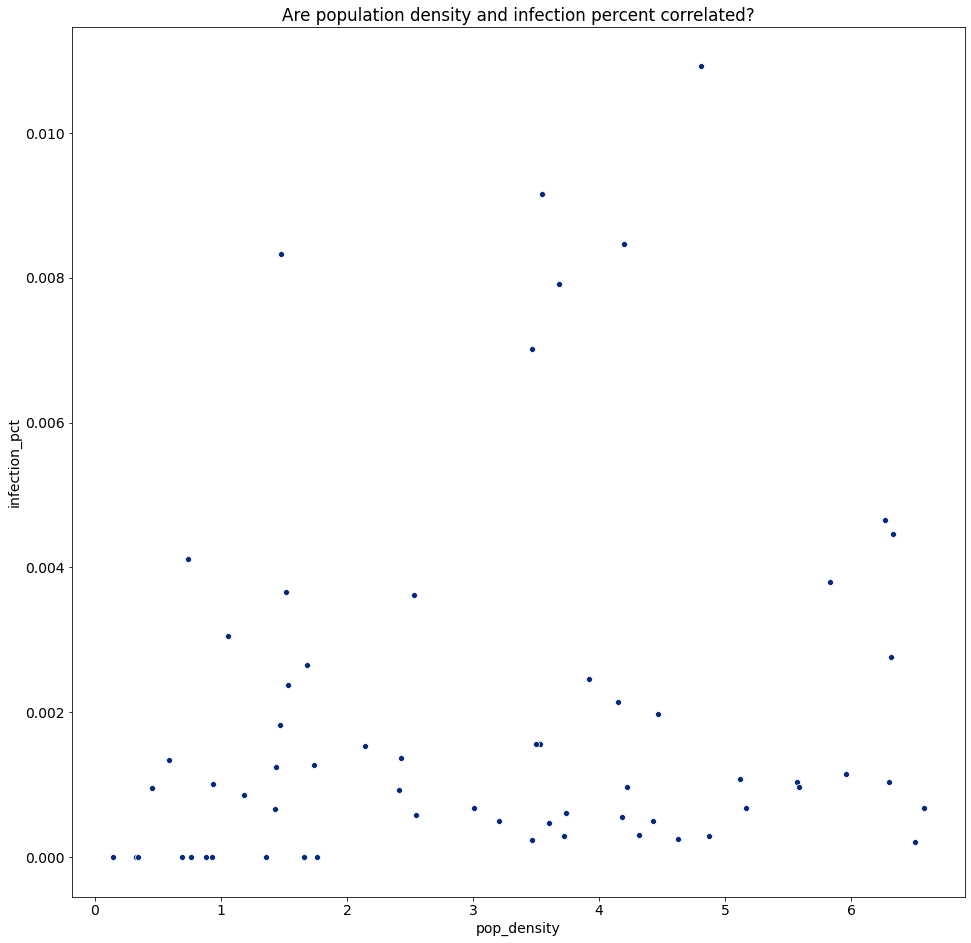

In [34]:
plt.title("Are population density and infection percent correlated?")
sns.scatterplot(df_low.pop_density, df_low.infection_pct, color = '#00287f')

**Takeaways:**
- Here we see the counties are spread out a bit more so we will need to run Pearson's R to check the correlation as well as the p value

#### Pearsons R (Correlation Test)

We will set our $alpha$ to a confidence level of 95%

- $H_0$: There is no linear relationship between population density and infection percent
- $H_a$: There is no linear relationship between population density and infection percent

In [35]:
# set alpha
alpha = .05

# set our x and y
x = df_low.pop_density
y = df_low.infection_pct

#apply pearsons to get our probability(p) and coefician correlation(r)
r, p = stats.pearsonr(x, y)

print('r=', r)
print('p=', p)

r= 0.1781740189303164
p= 0.15895402875926826


In [36]:
if p > alpha:
    print(f'''
    Because p ({p:.2f}) > alpha (.05), we fail to reject the null hypothesis.
    This means that there is no statistical significance in the linear relationship
    between population density and infection rate. 
    ''')
else:
    print(f'''
    Because p ({p:.2f}) < alpha (.05), we reject the null hypothesis.
    This means that there is some statistical significance in the linear relationship
    between population density and infection rate. 
    ''')


    Because p (0.16) > alpha (.05), we fail to reject the null hypothesis.
    This means that there is no statistical significance in the linear relationship
    between population density and infection rate. 
    


### Do the Counties with a High density population have a linear relationship with Infection Rate?

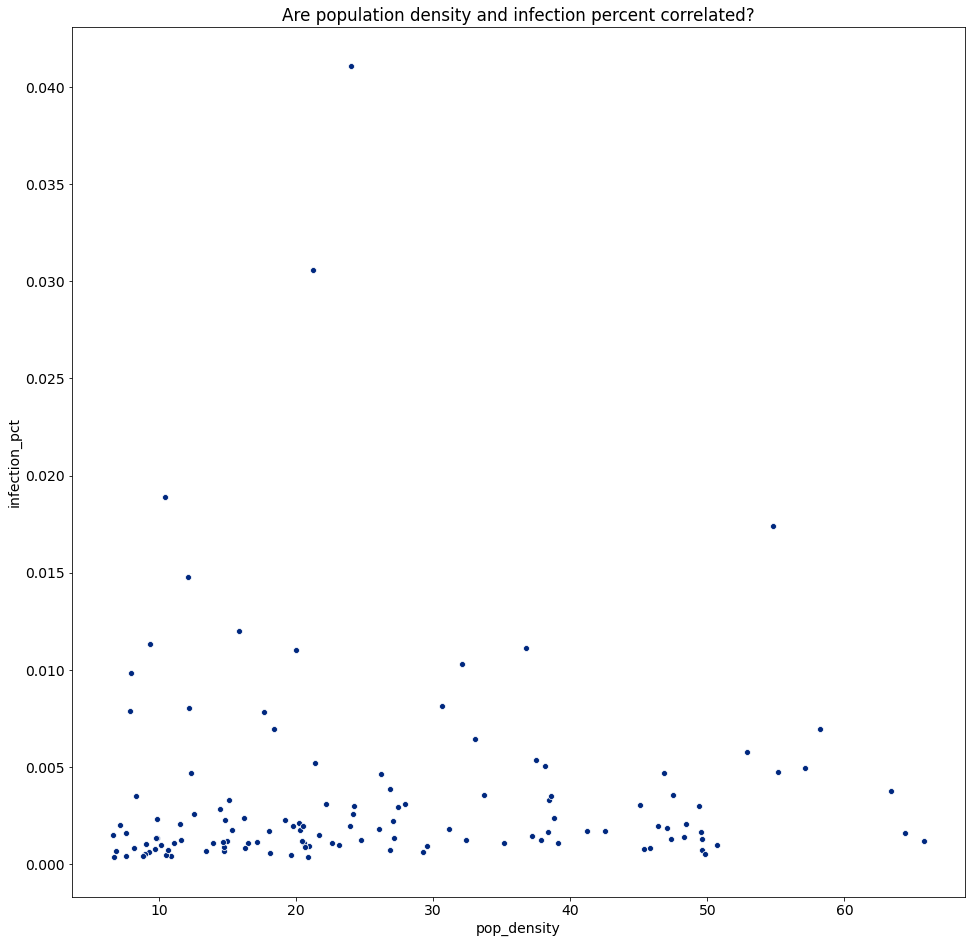

In [37]:
plt.title("Are population density and infection percent correlated?")
sns.scatterplot(df_high.pop_density, df_high.infection_pct, color = '#00287f')

Takeaways:
- Here there does seem to be a pattern between population density and infection percent for the counties grouped as High Population

#### Pearsons R (Correlation Test)

We will set our $alpha$ to a confidence level of 95%

- $H_0$: There is no linear relationship between population density and infection percent
- $H_a$: There is no linear relationship between population density and infection percent

In [38]:
# set alpha
alpha = .05

# set our x and y
x = df_high.pop_density
y = df_high.infection_pct

#apply pearsons to get our probability(p) and coefician correlation(r)
r, p = stats.pearsonr(x, y)

print('r=', r)
print('p=', p)

r= 0.008880380360667246
p= 0.9213840038074509


In [39]:
if p > alpha:
    print(f'''
    Because p ({p:.2f}) > alpha (.05), we fail to reject the null hypothesis.
    This means that there is no statistical significance in the linear relationship
    between population density and infection rate. 
    ''')
else:
    print(f'''
    Because p ({p:.2f}) < alpha (.05), we reject the null hypothesis.
    This means that there is some statistical significance in the linear relationship
    between population density and infection rate. 
    ''')


    Because p (0.92) > alpha (.05), we fail to reject the null hypothesis.
    This means that there is no statistical significance in the linear relationship
    between population density and infection rate. 
    


### Do the Counties with a Mid Density Population have a Linear Relationship with Infection Rate?

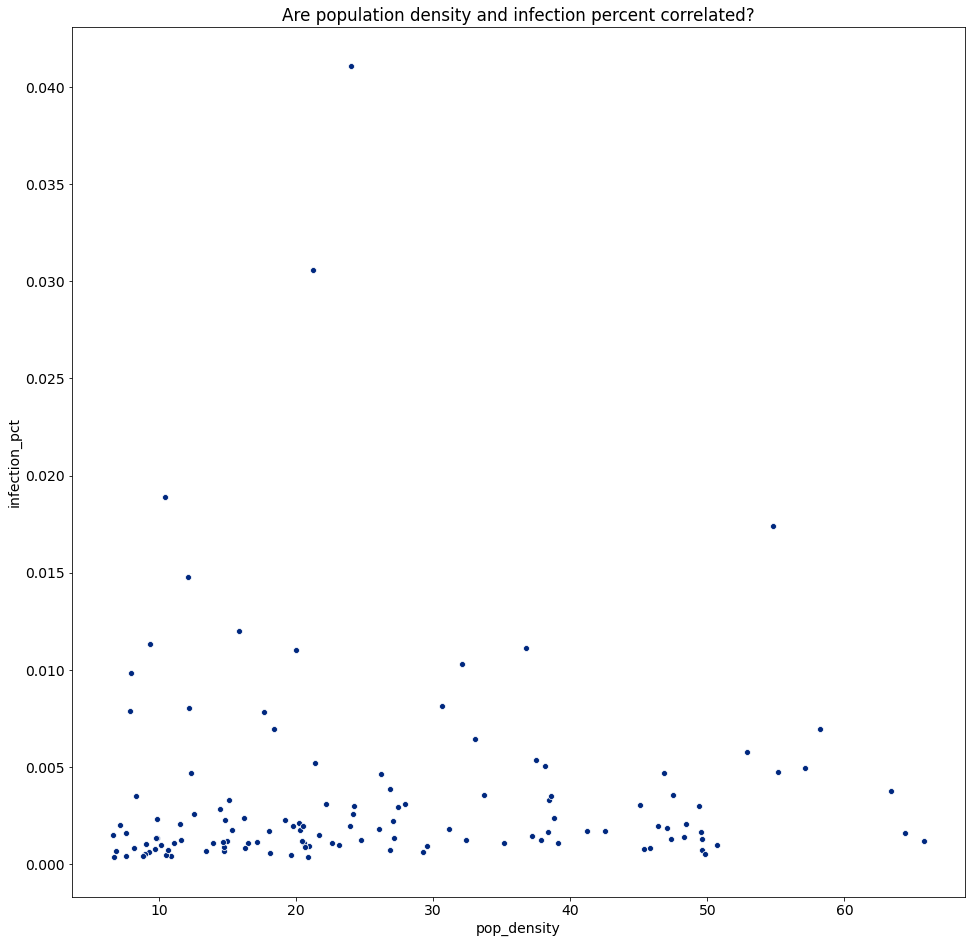

In [40]:
plt.title("Are population density and infection percent correlated?")
sns.scatterplot(df_mid.pop_density, df_mid.infection_pct, color = '#00287f')

Takeaways:
- There does seem to be a pattern between population density and infection percent for the counties grouped as Mid Population Density

#### Pearsons R (Correlation Test)

We will set our $alpha$ to a confidence level of 95%

- $H_0$: There is no linear relationship between population density and infection percent
- $H_a$: There is no linear relationship between population density and infection percent

In [41]:
# set alpha
alpha = .05

# set our x and y
x = df_mid.pop_density
y = df_mid.infection_pct

#apply pearsons to get our probability(p) and coefician correlation(r)
r, p = stats.pearsonr(x, y)

print('r=', r)
print('p=', p)

r= 0.008880380360667246
p= 0.9213840038074509


In [42]:
if p > alpha:
    print(f'''
    Because p ({p:.2f}) > alpha (.05), we fail to reject the null hypothesis.
    This means that there is no statistical significance in the linear relationship
    between population density and infection rate. 
    ''')
else:
    print(f'''
    Because p ({p:.2f}) < alpha (.05), we reject the null hypothesis.
    This means that there is some statistical significance in the linear relationship
    between population density and infection rate. 
    ''')


    Because p (0.92) > alpha (.05), we fail to reject the null hypothesis.
    This means that there is no statistical significance in the linear relationship
    between population density and infection rate. 
    


**Takeaways:**
- Since we failed to reject the null hypothesis for each category in population density we can safely say there is no statistical significance in the linear relationship for Population Density and Infection Percent 

[**Correlation Between Population Density and Infection Percent**](#pop_density_infection_percent)<br>

[**Back to top**](#top)<br>

<a id='senior_citizens'></a>

## Is there a correlation between the number of Senior Citizens in a County and Infection Percent?

Text(0.5, 1.0, 'Senior Citizens and Infection percentage')

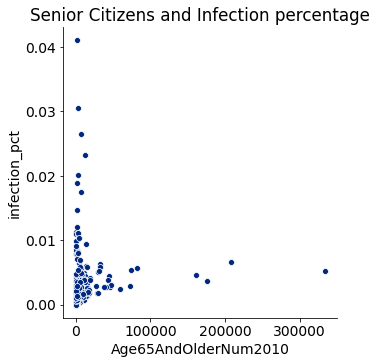

In [43]:
sns.relplot(x="Age65AndOlderNum2010", y="infection_pct", data=df, color = '#00287f')
plt.title("Senior Citizens and Infection percentage")

#### Chi Squared

We will set our $alpha$ to a confidence level of 95%

- $H_0$: Senior citizen percent and infection percent are independent of each other.
- $H_a$: Senior citizen percent and infection percent are dependent of each other.

In [44]:
observed = pd.crosstab(df.senior_pct, df.infection_pct_category)

In [45]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected 
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 1  0  1]
 [ 3  0  2]
 [ 2  1  3]
 [ 6  1  7]
 [ 5  0  3]
 [ 8  1  8]
 [ 4  1  8]
 [ 6  6 13]
 [ 8  2 13]
 [ 6  3  7]
 [ 4  5  8]
 [ 1  4  7]
 [ 3  4 13]
 [ 1  1  9]
 [ 0  9  4]
 [ 2  7  5]
 [ 0  1  1]
 [ 1  3  4]
 [ 1  3  2]
 [ 1  3  3]
 [ 1  2  1]
 [ 0  4  1]
 [ 0  1  1]
 [ 0  1  1]
 [ 0  0  1]
 [ 0  1  0]]
---
Expected

[[ 0.50393701  0.50393701  0.99212598]
 [ 1.25984252  1.25984252  2.48031496]
 [ 1.51181102  1.51181102  2.97637795]
 [ 3.52755906  3.52755906  6.94488189]
 [ 2.01574803  2.01574803  3.96850394]
 [ 4.28346457  4.28346457  8.43307087]
 [ 3.27559055  3.27559055  6.4488189 ]
 [ 6.2992126   6.2992126  12.4015748 ]
 [ 5.79527559  5.79527559 11.40944882]
 [ 4.03149606  4.03149606  7.93700787]
 [ 4.28346457  4.28346457  8.43307087]
 [ 3.02362205  3.02362205  5.95275591]
 [ 5.03937008  5.03937008  9.92125984]
 [ 2.77165354  2.77165354  5.45669291]
 [ 3.27559055  3.27559055  6.4488189 ]
 [ 3.52755906  3.52755906  6.94488189]
 [ 0.50393701  0.50393701  0.99212598]


In [46]:
if p > alpha:
    print(f'''
    Because p ({p:.2f}) > alpha (.05), we fail to reject the null hypothesis.
    This means that senior citizen percent and infection percent are 
    independent of each other. 
    ''')
else:
    print(f'''
    Because p ({p:.2f}) < alpha (.05), we reject the null hypothesis.
    This means that senior citizen percent and infection percent are 
    dependent of each other. 
    ''')


    Because p (0.01) < alpha (.05), we reject the null hypothesis.
    This means that senior citizen percent and infection percent are 
    dependent of each other. 
    


[**Back to Correlation Between Nursing Homes and Infection Percent Beginning**](#senior_citizens)<br>

[**Back to top**](#top)<br>

<a id='nursing_homes'></a>

## Is there a correlation between the number of Nursing Homes in a County and Infection Percent?

Text(0.5, 1.0, 'Number of Nursing Homes and Infection percentage')

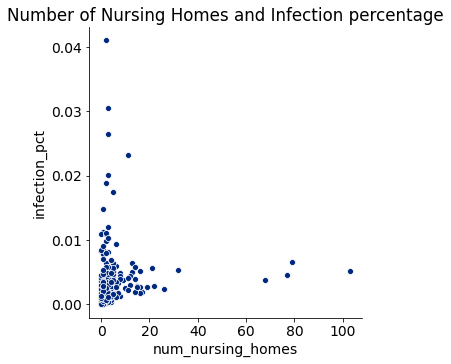

In [47]:
sns.relplot(x="num_nursing_homes", y="infection_pct", data=df, color = '#00287f')
plt.title("Number of Nursing Homes and Infection percentage")

#### Chi Squared

We will set our $alpha$ to a confidence level of 95%

- $H_0$: Number of nursing homes and infection percent are independent of each other.
- $H_a$: Number of nursing homes and infection percent are dependent of each other.

In [48]:
observed = pd.crosstab(df.num_nursing_homes, df.infection_pct)

In [49]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected 
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[7 0 1 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
---
Expected

[[1.47244094 0.13385827 0.13385827 ... 0.13385827 0.13385827 0.13385827]
 [2.94488189 0.26771654 0.26771654 ... 0.26771654 0.26771654 0.26771654]
 [1.77559055 0.16141732 0.16141732 ... 0.16141732 0.16141732 0.16141732]
 ...
 [0.04330709 0.00393701 0.00393701 ... 0.00393701 0.00393701 0.00393701]
 [0.04330709 0.00393701 0.00393701 ... 0.00393701 0.00393701 0.00393701]
 [0.04330709 0.00393701 0.00393701 ... 0.00393701 0.00393701 0.00393701]]
---

chi^2 = 6575.4759
p     = 0.0117


In [50]:
if p > alpha:
    print(f'''
    Because p ({p:.3f}) > alpha (.05), we fail to reject the null hypothesis.
    This means that the number of nursing homes and infection percent are 
    independent of each other. 
    ''')
else:
    print(f'''
    Because p ({p:.3f}) < alpha (.05), we reject the null hypothesis.
    This means that the number of nursing homes and infection percent are 
    dependent of each other. 
    ''')


    Because p (0.012) < alpha (.05), we reject the null hypothesis.
    This means that the number of nursing homes and infection percent are 
    dependent of each other. 
    


[**Back to Correlation Between Nursing Homes and Infection Percent Beginning**](#nursing_homes)<br>

[**Back to top**](#top)<br>

<a id='SVI_scores'></a>

## Do the Various Vulnerability Scores correlate to the Infection percent?

Here we are going to look at the various SVI and test each one by Region:

The Categories are:
- RPL_THEME1 - Socioeconomic
- RPL_THEME2 - Household Composition & Disability
- RPL_THEME3 - Minority Status & Language
- RPL_THEME4 - Housing Type & Transportation
- RPL_THEMES - Overall tract summary ranking variable

In [51]:
#round the infection percent to 3 deciaml places
df.infection_pct = df.infection_pct.round(3)

In [52]:
#bring in fresh data for each region (these will be subset dataframes)
df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11 = explore.get_all_region_subsets_for_chi2_test(df)

### Is the Infection Percent dependent on the Overall SVI score?

***Region 1***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Overall Vulnerability score in Region 1
- $H_a$ - Infection rate is dependent of the Overall Vulnerability score in Region 1

In [53]:
#run chi2 test using function
chi2_reg1, p_reg1, degf_reg1, expected_reg1, obs_reg1 = explore.chi2_test_for_overall_svi_and_infection_percent(df_1)

chi^2 = 1.3260
p     = 0.8569


In [54]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_overall_svi_by_region(p_reg1, 1)


        Because p (0.857) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Overall Vulnerability Score in Region 1 and the infection percent are 
        independent of each other. 
        


***Region 2***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Overall Vulnerability score in Region 2
- $H_a$ - Infection rate is dependent of the Overall Vulnerability score in Region 2

In [55]:
#run chi2 test using function
chi2_reg2, p_reg2, degf_reg2, expected_reg2, obs_reg2 = explore.chi2_test_for_overall_svi_and_infection_percent(df_2)

chi^2 = 5.4277
p     = 0.2462


In [56]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_overall_svi_by_region(p_reg2, 2)


        Because p (0.246) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Overall Vulnerability Score in Region 2 and the infection percent are 
        independent of each other. 
        


***Region 3***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Overall Vulnerability score in Region 3
- $H_a$ - Infection rate is dependent of the Overall Vulnerability score in Region 3

In [57]:
#run chi2 test using function
chi2_reg3, p_reg3, degf_reg3, expected_reg3, obs_reg3 = explore.chi2_test_for_overall_svi_and_infection_percent(df_3)

chi^2 = 4.4141
p     = 0.3528


In [58]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_overall_svi_by_region(p_reg3, 3)


        Because p (0.353) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Overall Vulnerability Score in Region 3 and the infection percent are 
        independent of each other. 
        


***Region 4***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Overall Vulnerability score in Region 4
- $H_a$ - Infection rate is dependent of the Overall Vulnerability score in Region 4

In [59]:
#run chi2 test using function
chi2_reg4, p_reg4, degf_reg4, expected_reg4, obs_reg4 = explore.chi2_test_for_overall_svi_and_infection_percent(df_4)

chi^2 = 4.4456
p     = 0.3490


In [60]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_overall_svi_by_region(p_reg4, 4)


        Because p (0.349) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Overall Vulnerability Score in Region 4 and the infection percent are 
        independent of each other. 
        


***Region 5***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Overall Vulnerability score in Region 5
- $H_a$ - Infection rate is dependent of the Overall Vulnerability score in Region 5

In [61]:
#run chi2 test using function
chi2_reg5, p_reg5, degf_reg5, expected_reg5, obs_reg5 = explore.chi2_test_for_overall_svi_and_infection_percent(df_5)

chi^2 = 6.2500
p     = 0.1812


In [62]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_overall_svi_by_region(p_reg5, 5)


        Because p (0.181) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Overall Vulnerability Score in Region 5 and the infection percent are 
        independent of each other. 
        


***Region 6***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Overall Vulnerability score in Region 6
- $H_a$ - Infection rate is dependent of the Overall Vulnerability score in Region 6

In [63]:
#run chi2 test using function
chi2_reg6, p_reg6, degf_reg6, expected_reg6, obs_reg6 = explore.chi2_test_for_overall_svi_and_infection_percent(df_6)

chi^2 = 3.9464
p     = 0.1390


In [64]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_overall_svi_by_region(p_reg6, 6)


        Because p (0.139) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Overall Vulnerability Score in Region 6 and the infection percent are 
        independent of each other. 
        


***Region 7***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Overall Vulnerability score in Region 7
- $H_a$ - Infection rate is dependent of the Overall Vulnerability score in Region 7

In [65]:
#run chi2 test using function
chi2_reg7, p_reg7, degf_reg7, expected_reg7, obs_reg7 = explore.chi2_test_for_overall_svi_and_infection_percent(df_7)

chi^2 = 1.0221
p     = 0.9064


In [66]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_overall_svi_by_region(p_reg7, 7)


        Because p (0.906) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Overall Vulnerability Score in Region 7 and the infection percent are 
        independent of each other. 
        


***Region 8***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Overall Vulnerability score in Region 8
- $H_a$ - Infection rate is dependent of the Overall Vulnerability score in Region 8

In [67]:
#run chi2 test using function
chi2_reg8, p_reg8, degf_reg8, expected_reg8, obs_reg8 = explore.chi2_test_for_overall_svi_and_infection_percent(df_8)

chi^2 = 3.9212
p     = 0.4168


In [68]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_overall_svi_by_region(p_reg8, 8)


        Because p (0.417) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Overall Vulnerability Score in Region 8 and the infection percent are 
        independent of each other. 
        


***Region 9***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Overall Vulnerability score in Region 9
- $H_a$ - Infection rate is dependent of the Overall Vulnerability score in Region 9

In [69]:
#run chi2 test using function
chi2_reg9, p_reg9, degf_reg9, expected_reg9, obs_reg9 = explore.chi2_test_for_overall_svi_and_infection_percent(df_9)

chi^2 = 2.9055
p     = 0.5738


In [70]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_overall_svi_by_region(p_reg9, 9)


        Because p (0.574) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Overall Vulnerability Score in Region 9 and the infection percent are 
        independent of each other. 
        


***Region 10***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Overall Vulnerability score in Region 10
- $H_a$ - Infection rate is dependent of the Overall Vulnerability score in Region 10

In [71]:
#run chi2 test using function
chi2_reg10, p_reg10, degf_reg10, expected_reg10, obs_reg10 = explore.chi2_test_for_overall_svi_and_infection_percent(df_10)

chi^2 = 7.0000
p     = 0.1359


In [72]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_overall_svi_by_region(p_reg10, 10)


        Because p (0.136) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Overall Vulnerability Score in Region 10 and the infection percent are 
        independent of each other. 
        


***Region 11***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Overall Vulnerability score in Region 11
- $H_a$ - Infection rate is dependent of the Overall Vulnerability score in Region 11

In [73]:
#run chi2 test using function
chi2_reg11, p_reg11, degf_reg11, expected_reg11, obs_reg11 = explore.chi2_test_for_overall_svi_and_infection_percent(df_11)

chi^2 = 4.3725
p     = 0.1123


In [74]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_overall_svi_by_region(p_reg11, 11)


        Because p (0.112) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Overall Vulnerability Score in Region 11 and the infection percent are 
        independent of each other. 
        


In [75]:
all_region_overall_svi_prob = pd.DataFrame({"region":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
                                            "p_value":[p_reg1, p_reg2, p_reg3, p_reg4, p_reg5, p_reg6,
                                           p_reg7, p_reg8, p_reg9, p_reg10, p_reg11]})
all_region_overall_svi_prob["fail_to_reject_null"] = all_region_overall_svi_prob.p_value < .05

In [76]:
all_region_overall_svi_prob

region   p_value  fail_to_reject_null
0        1  0.856946                False
1        2  0.246158                False
2        3  0.352850                False
3        4  0.349047                False
4        5  0.181240                False
5        6  0.139009                False
6        7  0.906433                False
7        8  0.416774                False
8        9  0.573754                False
9       10  0.135888                False
10      11  0.112339                False

***Summary***
- For the overall SVI we failed to reject the null hypothesis in every region.

### Is the Infection Percent dependent on the Socioeconomic SVI?

***Region 1***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Socioeconomic SVI in Region 1
- $H_a$ - Infection rate is dependent of the Overall Socioeconomic SVI in Region 1

In [77]:
chi2_1, p_1, degf_1, expected_1, obs_1 = explore.chi2_test_for_socioeconomic_svi_and_infection_percent(df_1)

chi^2 = 3.5277
p     = 0.4737


In [78]:
explore.if_statement_for_socioeconomic_svi_by_region(p_1, 1)


        Because p (0.474) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Socioeconomic SVI in Region 1 and the infection percent are 
        independent of each other. 
        


***Region 2***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Socioeconomic SVI in Region 2
- $H_a$ - Infection rate is dependent of the Overall Socioeconomic SVI in Region 2

In [79]:
chi2_2, p_2, degf_2, expected_2, obs_2 = explore.chi2_test_for_socioeconomic_svi_and_infection_percent(df_2)

chi^2 = 0.8135
p     = 0.9366


In [80]:
explore.if_statement_for_socioeconomic_svi_by_region(p_2, 2)


        Because p (0.937) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Socioeconomic SVI in Region 2 and the infection percent are 
        independent of each other. 
        


***Region 3***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Socioeconomic SVI in Region 3
- $H_a$ - Infection rate is dependent of the Overall Socioeconomic SVI in Region 3

In [81]:
chi2_3, p_3, degf_3, expected_3, obs_3 = explore.chi2_test_for_socioeconomic_svi_and_infection_percent(df_3)

chi^2 = 1.5254
p     = 0.8221


In [82]:
explore.if_statement_for_socioeconomic_svi_by_region(p_3, 3)


        Because p (0.822) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Socioeconomic SVI in Region 3 and the infection percent are 
        independent of each other. 
        


***Region 4***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Socioeconomic SVI in Region 4
- $H_a$ - Infection rate is dependent of the Overall Socioeconomic SVI in Region 4

In [83]:
chi2_4, p_4, degf_4, expected_4, obs_4 = explore.chi2_test_for_socioeconomic_svi_and_infection_percent(df_4)

chi^2 = 2.6985
p     = 0.2594


In [84]:
explore.if_statement_for_socioeconomic_svi_by_region(p_4, 4)


        Because p (0.259) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Socioeconomic SVI in Region 4 and the infection percent are 
        independent of each other. 
        


***Region 5***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Socioeconomic SVI in Region 5
- $H_a$ - Infection rate is dependent of the Overall Socioeconomic SVI in Region 5

In [85]:
chi2_5, p_5, degf_5, expected_5, obs_5 = explore.chi2_test_for_socioeconomic_svi_and_infection_percent(df_5)

chi^2 = 5.1786
p     = 0.2695


In [86]:
explore.if_statement_for_socioeconomic_svi_by_region(p_5, 5)


        Because p (0.269) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Socioeconomic SVI in Region 5 and the infection percent are 
        independent of each other. 
        


***Region 6***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Socioeconomic SVI in Region 6
- $H_a$ - Infection rate is dependent of the Overall Socioeconomic SVI in Region 6

In [87]:
chi2_6, p_6, degf_6, expected_6, obs_6 = explore.chi2_test_for_socioeconomic_svi_and_infection_percent(df_6)

chi^2 = 2.0782
p     = 0.3538


In [88]:
explore.if_statement_for_socioeconomic_svi_by_region(p_6, 6)


        Because p (0.354) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Socioeconomic SVI in Region 6 and the infection percent are 
        independent of each other. 
        


***Region 7***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Socioeconomic SVI in Region 7
- $H_a$ - Infection rate is dependent of the Overall Socioeconomic SVI in Region 7

In [89]:
chi2_7, p_7, degf_7, expected_7, obs_7 = explore.chi2_test_for_socioeconomic_svi_and_infection_percent(df_7)

chi^2 = 1.7284
p     = 0.7855


In [90]:
explore.if_statement_for_socioeconomic_svi_by_region(p_7, 7)


        Because p (0.786) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Socioeconomic SVI in Region 7 and the infection percent are 
        independent of each other. 
        


***Region 8***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Socioeconomic SVI in Region 8
- $H_a$ - Infection rate is dependent of the Overall Socioeconomic SVI in Region 8

In [91]:
chi2_8, p_8, degf_8, expected_8, obs_8 = explore.chi2_test_for_socioeconomic_svi_and_infection_percent(df_8)

chi^2 = 3.6893
p     = 0.4497


In [92]:
explore.if_statement_for_socioeconomic_svi_by_region(p_8, 8)


        Because p (0.450) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Socioeconomic SVI in Region 8 and the infection percent are 
        independent of each other. 
        


***Region 9***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Socioeconomic SVI in Region 9
- $H_a$ - Infection rate is dependent of the Overall Socioeconomic SVI in Region 9

In [93]:
chi2_9, p_9, degf_9, expected_9, obs_9 = explore.chi2_test_for_socioeconomic_svi_and_infection_percent(df_9)

chi^2 = 2.1978
p     = 0.6994


In [94]:
explore.if_statement_for_socioeconomic_svi_by_region(p_9, 9)


        Because p (0.699) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Socioeconomic SVI in Region 9 and the infection percent are 
        independent of each other. 
        


***Region 10***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Socioeconomic SVI in Region 10
- $H_a$ - Infection rate is dependent of the Overall Socioeconomic SVI in Region 10

In [95]:
chi2_10, p_10, degf_10, expected_10, obs_10 = explore.chi2_test_for_socioeconomic_svi_and_infection_percent(df_10)

chi^2 = 3.0000
p     = 0.2231


In [96]:
explore.if_statement_for_socioeconomic_svi_by_region(p_10, 10)


        Because p (0.223) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Socioeconomic SVI in Region 10 and the infection percent are 
        independent of each other. 
        


***Region 11***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Socioeconomic SVI in Region 11
- $H_a$ - Infection rate is dependent of the Overall Socioeconomic SVI in Region 11

In [97]:
chi2_11, p_11, degf_11, expected_11, obs_11 = explore.chi2_test_for_socioeconomic_svi_and_infection_percent(df_11)

chi^2 = 3.3483
p     = 0.1875


In [98]:
explore.if_statement_for_socioeconomic_svi_by_region(p_11, 11)


        Because p (0.187) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Socioeconomic SVI in Region 11 and the infection percent are 
        independent of each other. 
        


In [99]:
all_region_socioeconomic_svi = pd.DataFrame({"region":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
                                            "p_value":[p_1, p_2, p_3, p_4, p_5, p_6,
                                           p_7, p_8, p_9, p_10, p_11]})
all_region_socioeconomic_svi["fail_to_reject_null"] = all_region_overall_svi_prob.p_value < .05

In [100]:
all_region_socioeconomic_svi

region   p_value  fail_to_reject_null
0        1  0.473674                False
1        2  0.936625                False
2        3  0.822136                False
3        4  0.259439                False
4        5  0.269461                False
5        6  0.353767                False
6        7  0.785547                False
7        8  0.449679                False
8        9  0.699432                False
9       10  0.223130                False
10      11  0.187472                False

### Is the Infection Percent dependent on the Household Composition & Disability SVI score?

***Region 1***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Household Composition & Disability SVI in Region 1
- $H_a$ - Infection rate is dependent of the Household Composition & Disability SVI in Region 1

In [101]:
chi2_1, p_1, degf_1, expected_1, obs_1 = explore.chi2_test_for_housholdcomp_svi_and_infection_percent(df_1)

chi^2 = 4.9625
p     = 0.2912


In [102]:
explore.if_statement_for_housholdcomp_svi_by_region(p_1, 1)


        Because p (0.291) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Composition & Disability SVI in Region 1 and the infection percent are 
        independent of each other. 
        


***Region 2***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Household Composition & Disability SVI in Region 2
- $H_a$ - Infection rate is dependent of the Household Composition & Disability SVI in Region 2

In [103]:
#run the chi test using function
chi2_2, p_2, degf_2, expected_2, obs_2 = explore.chi2_test_for_housholdcomp_svi_and_infection_percent(df_2)

chi^2 = 6.5529
p     = 0.1615


In [104]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housholdcomp_svi_by_region(p_2, 2)


        Because p (0.161) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Composition & Disability SVI in Region 2 and the infection percent are 
        independent of each other. 
        


***Region 3***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Household Composition & Disability SVI in Region 3
- $H_a$ - Infection rate is dependent of the Household Composition & Disability SVI in Region 3

In [105]:
#run the chi test using function
chi2_3, p_3, degf_3, expected_3, obs_3 = explore.chi2_test_for_housholdcomp_svi_and_infection_percent(df_3)

chi^2 = 9.7879
p     = 0.0442


In [106]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housholdcomp_svi_by_region(p_3, 3)


        Because p (0.044) < alpha (.05), we reject the null hypothesis.
        This means that the Composition & Disability SVI in Region 3 and the infection percent are 
        dependent of each other. 
        


***Region 4***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Household Composition & Disability SVI in Region 4
- $H_a$ - Infection rate is dependent of the Household Composition & Disability SVI in Region 4

In [107]:
#run the chi test using function
chi2_4, p_4, degf_4, expected_4, obs_4 = explore.chi2_test_for_housholdcomp_svi_and_infection_percent(df_4)

chi^2 = 3.0712
p     = 0.5460


In [108]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housholdcomp_svi_by_region(p_4, 4)


        Because p (0.546) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Composition & Disability SVI in Region 4 and the infection percent are 
        independent of each other. 
        


***Region 5***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Household Composition & Disability SVI in Region 5
- $H_a$ - Infection rate is dependent of the Household Composition & Disability SVI in Region 5

In [109]:
#run the chi test using function
chi2_5, p_5, degf_5, expected_5, obs_5 = explore.chi2_test_for_housholdcomp_svi_and_infection_percent(df_5)

chi^2 = 1.3636
p     = 0.5057


In [110]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housholdcomp_svi_by_region(p_5, 5)


        Because p (0.506) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Composition & Disability SVI in Region 5 and the infection percent are 
        independent of each other. 
        


***Region 6***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Household Composition & Disability SVI in Region 6
- $H_a$ - Infection rate is dependent of the Household Composition & Disability SVI in Region 6

In [111]:
#run the chi test using function
chi2_6, p_6, degf_6, expected_6, obs_6 = explore.chi2_test_for_housholdcomp_svi_and_infection_percent(df_6)

chi^2 = 2.4375
p     = 0.2956


In [112]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housholdcomp_svi_by_region(p_6, 6)


        Because p (0.296) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Composition & Disability SVI in Region 6 and the infection percent are 
        independent of each other. 
        


***Region 7***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Household Composition & Disability SVI in Region 7
- $H_a$ - Infection rate is dependent of the Household Composition & Disability SVI in Region 7

In [113]:
#run the chi test using function
chi2_7, p_7, degf_7, expected_7, obs_7 = explore.chi2_test_for_housholdcomp_svi_and_infection_percent(df_7)

chi^2 = 7.6398
p     = 0.1057


In [114]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housholdcomp_svi_by_region(p_7, 7)


        Because p (0.106) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Composition & Disability SVI in Region 7 and the infection percent are 
        independent of each other. 
        


***Region 8***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Household Composition & Disability SVI in Region 8
- $H_a$ - Infection rate is dependent of the Household Composition & Disability SVI in Region 8

In [115]:
#run the chi test using function
chi2_8, p_8, degf_8, expected_8, obs_8 = explore.chi2_test_for_housholdcomp_svi_and_infection_percent(df_8)

chi^2 = 4.2048
p     = 0.3790


In [116]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housholdcomp_svi_by_region(p_8, 8)


        Because p (0.379) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Composition & Disability SVI in Region 8 and the infection percent are 
        independent of each other. 
        


***Region 9***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Household Composition & Disability SVI in Region 9
- $H_a$ - Infection rate is dependent of the Household Composition & Disability SVI in Region 9

In [117]:
#run the chi test using function
chi2_9, p_9, degf_9, expected_9, obs_9 = explore.chi2_test_for_housholdcomp_svi_and_infection_percent(df_9)

chi^2 = 5.5527
p     = 0.2351


In [118]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housholdcomp_svi_by_region(p_9, 9)


        Because p (0.235) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Composition & Disability SVI in Region 9 and the infection percent are 
        independent of each other. 
        


***Region 10***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Household Composition & Disability SVI in Region 10
- $H_a$ - Infection rate is dependent of the Household Composition & Disability SVI in Region 10

In [119]:
#run the chi test using function
chi2_10, p_10, degf_10, expected_10, obs_10 = explore.chi2_test_for_housholdcomp_svi_and_infection_percent(df_10)

chi^2 = 8.6667
p     = 0.0700


In [120]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housholdcomp_svi_by_region(p_10, 10)


        Because p (0.070) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Composition & Disability SVI in Region 10 and the infection percent are 
        independent of each other. 
        


***Region 11***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Household Composition & Disability SVI in Region 11
- $H_a$ - Infection rate is dependent of the Household Composition & Disability SVI in Region 11

In [121]:
#run the chi test using function
chi2_11, p_11, degf_11, expected_11, obs_11 = explore.chi2_test_for_housholdcomp_svi_and_infection_percent(df_11)

chi^2 = 1.3818
p     = 0.8473


In [122]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housholdcomp_svi_by_region(p_11, 11)


        Because p (0.847) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Composition & Disability SVI in Region 11 and the infection percent are 
        independent of each other. 
        


In [123]:
all_region_householdcomp_svi = pd.DataFrame({"region":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
                                            "p_value":[p_1, p_2, p_3, p_4, p_5, p_6,
                                           p_7, p_8, p_9, p_10, p_11]})
all_region_householdcomp_svi["fail_to_reject_null"] = all_region_overall_svi_prob.p_value < .05

In [124]:
all_region_householdcomp_svi

region   p_value  fail_to_reject_null
0        1  0.291165                False
1        2  0.161491                False
2        3  0.044157                False
3        4  0.545990                False
4        5  0.505697                False
5        6  0.295599                False
6        7  0.105699                False
7        8  0.379000                False
8        9  0.235134                False
9       10  0.069993                False
10      11  0.847349                False

### Is the Infection Percent dependent on the Minority Status & Language SVI score?

***Region 1***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Minority Status & Language SVI in Region 1
- $H_a$ - Infection rate is dependent of the Minority Status & Language SVI in Region 1

In [125]:
#run the chi test using function
chi2_1, p_1, degf_1, expected_1, obs_1 = explore.chi2_test_for_minority_svi_and_infection_percent(df_1)

chi^2 = 6.5510
p     = 0.1616


In [126]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_minority_svi_by_region(p_1, 1)


        Because p (0.162) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Minority Status & Languagey SVI in Region 1 and the infection percent are 
        independent of each other. 
        


***Region 2***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Minority Status & Language SVI in Region 2
- $H_a$ - Infection rate is dependent of the Minority Status & Language SVI in Region 2

In [127]:
#run the chi test using function
chi2_2, p_2, degf_2, expected_2, obs_2 = explore.chi2_test_for_minority_svi_and_infection_percent(df_2)

chi^2 = 2.9535
p     = 0.2284


In [128]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_minority_svi_by_region(p_2, 2)


        Because p (0.228) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Minority Status & Languagey SVI in Region 2 and the infection percent are 
        independent of each other. 
        


***Region 3***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Minority Status & Language SVI in Region 3
- $H_a$ - Infection rate is dependent of the Minority Status & Language SVI in Region 3

In [129]:
#run the chi test using function
chi2_3, p_3, degf_3, expected_3, obs_3 = explore.chi2_test_for_minority_svi_and_infection_percent(df_3)

chi^2 = 4.2397
p     = 0.3745


In [130]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_minority_svi_by_region(p_3, 3)


        Because p (0.375) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Minority Status & Languagey SVI in Region 3 and the infection percent are 
        independent of each other. 
        


***Region 4***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Minority Status & Language SVI in Region 4
- $H_a$ - Infection rate is dependent of the Minority Status & Language SVI in Region 4

In [131]:
#run the chi test using function
chi2_4, p_4, degf_4, expected_4, obs_4 = explore.chi2_test_for_minority_svi_and_infection_percent(df_4)

chi^2 = 3.4683
p     = 0.4827


In [132]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_minority_svi_by_region(p_4, 4)


        Because p (0.483) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Minority Status & Languagey SVI in Region 4 and the infection percent are 
        independent of each other. 
        


***Region 5***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Minority Status & Language SVI in Region 5
- $H_a$ - Infection rate is dependent of the Minority Status & Language SVI in Region 5

In [133]:
#run the chi test using function
chi2_5, p_5, degf_5, expected_5, obs_5 = explore.chi2_test_for_minority_svi_and_infection_percent(df_5)

chi^2 = 5.6250
p     = 0.0601


In [134]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_minority_svi_by_region(p_5, 5)


        Because p (0.060) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Minority Status & Languagey SVI in Region 5 and the infection percent are 
        independent of each other. 
        


***Region 6***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Minority Status & Language SVI in Region 6
- $H_a$ - Infection rate is dependent of the Minority Status & Language SVI in Region 6

In [135]:
#run the chi test using function
chi2_6, p_6, degf_6, expected_6, obs_6 = explore.chi2_test_for_minority_svi_and_infection_percent(df_6)

chi^2 = 0.0484
p     = 0.8259


In [136]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_minority_svi_by_region(p_6, 6)


        Because p (0.826) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Minority Status & Languagey SVI in Region 6 and the infection percent are 
        independent of each other. 
        


***Region 7***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Minority Status & Language SVI in Region 7
- $H_a$ - Infection rate is dependent of the Minority Status & Language SVI in Region 7

In [137]:
#run the chi test using function
chi2_7, p_7, degf_7, expected_7, obs_7 = explore.chi2_test_for_minority_svi_and_infection_percent(df_7)

chi^2 = 9.4680
p     = 0.0504


In [138]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_minority_svi_by_region(p_7, 7)


        Because p (0.050) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Minority Status & Languagey SVI in Region 7 and the infection percent are 
        independent of each other. 
        


***Region 8***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Minority Status & Language SVI in Region 8
- $H_a$ - Infection rate is dependent of the Minority Status & Language SVI in Region 8

In [139]:
#run the chi test using function
chi2_8, p_8, degf_8, expected_8, obs_8 = explore.chi2_test_for_minority_svi_and_infection_percent(df_8)

chi^2 = 8.6074
p     = 0.0717


In [140]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_minority_svi_by_region(p_8, 8)


        Because p (0.072) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Minority Status & Languagey SVI in Region 8 and the infection percent are 
        independent of each other. 
        


***Region 9***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Minority Status & Language SVI in Region 9
- $H_a$ - Infection rate is dependent of the Minority Status & Language SVI in Region 9

In [141]:
#run the chi test using function
chi2_9, p_9, degf_9, expected_9, obs_9 = explore.chi2_test_for_minority_svi_and_infection_percent(df_9)

chi^2 = 1.6927
p     = 0.7920


In [142]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_minority_svi_by_region(p_9, 9)


        Because p (0.792) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Minority Status & Languagey SVI in Region 9 and the infection percent are 
        independent of each other. 
        


***Region 10***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Minority Status & Language SVI in Region 10
- $H_a$ - Infection rate is dependent of the Minority Status & Language SVI in Region 10

In [143]:
#run the chi test using function
chi2_10, p_10, degf_10, expected_10, obs_10 = explore.chi2_test_for_minority_svi_and_infection_percent(df_10)

chi^2 = 3.0000
p     = 0.2231


In [144]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_minority_svi_by_region(p_10, 10)


        Because p (0.223) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Minority Status & Languagey SVI in Region 10 and the infection percent are 
        independent of each other. 
        


***Region 11***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Minority Status & Language SVI in Region 11
- $H_a$ - Infection rate is dependent of the Minority Status & Language SVI in Region 11

In [145]:
#run the chi test using function
chi2_11, p_11, degf_11, expected_11, obs_11 = explore.chi2_test_for_minority_svi_and_infection_percent(df_11)

chi^2 = 3.9766
p     = 0.1369


In [146]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_minority_svi_by_region(p_11, 11)


        Because p (0.137) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Minority Status & Languagey SVI in Region 11 and the infection percent are 
        independent of each other. 
        


In [147]:
all_region_minority_svi = pd.DataFrame({"region":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
                                            "p_value":[p_1, p_2, p_3, p_4, p_5, p_6,
                                           p_7, p_8, p_9, p_10, p_11]})
all_region_minority_svi["fail_to_reject_null"] = all_region_minority_svi.p_value < .05
all_region_minority_svi

region   p_value  fail_to_reject_null
0        1  0.161603                False
1        2  0.228381                False
2        3  0.374541                False
3        4  0.482722                False
4        5  0.060055                False
5        6  0.825936                False
6        7  0.050408                False
7        8  0.071698                False
8        9  0.792038                False
9       10  0.223130                False
10      11  0.136930                False

### Is the Infection Percent dependent on the Housing Type & Transportation SVI score?

***Region 1***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Housing Type & Transportation SVI in Region 1
- $H_a$ - Infection rate is dependent of the Housing Type & Transportation in Region 1

In [148]:
#run the chi test using function
chi2_1, p_1, degf_1, expected_1, obs_1 = explore.chi2_test_for_housing_transp_svi_and_infection_percent(df_1)

chi^2 = 3.8328
p     = 0.4291


In [149]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housing_transp_svi_by_region(p_1, 1)


        Because p (0.429) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Housing Type & Transportation SVI in Region 1 and the infection percent are 
        independent of each other. 
        


***Region 2***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Housing Type & Transportation SVI in Region 2
- $H_a$ - Infection rate is dependent of the Housing Type & Transportation in Region 2

In [150]:
#run the chi test using function
chi2_2, p_2, degf_2, expected_2, obs_2 = explore.chi2_test_for_housing_transp_svi_and_infection_percent(df_2)

chi^2 = 2.9868
p     = 0.5600


In [151]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housing_transp_svi_by_region(p_2, 2)


        Because p (0.560) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Housing Type & Transportation SVI in Region 2 and the infection percent are 
        independent of each other. 
        


***Region 3***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Housing Type & Transportation SVI in Region 3
- $H_a$ - Infection rate is dependent of the Housing Type & Transportation in Region 3

In [152]:
#run the chi test using function
chi2_3, p_3, degf_3, expected_3, obs_3 = explore.chi2_test_for_housing_transp_svi_and_infection_percent(df_3)

chi^2 = 4.2318
p     = 0.3755


In [153]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housing_transp_svi_by_region(p_3, 3)


        Because p (0.376) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Housing Type & Transportation SVI in Region 3 and the infection percent are 
        independent of each other. 
        


***Region 4***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Housing Type & Transportation SVI in Region 4
- $H_a$ - Infection rate is dependent of the Housing Type & Transportation in Region 4

In [154]:
#run the chi test using function
chi2_4, p_4, degf_4, expected_4, obs_4 = explore.chi2_test_for_housing_transp_svi_and_infection_percent(df_4)

chi^2 = 14.9740
p     = 0.0048


In [155]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housing_transp_svi_by_region(p_4, 4)


        Because p (0.005) < alpha (.05), we reject the null hypothesis.
        This means that the Housing Type & Transportation SVI in Region 4 and the infection percent are 
        dependent of each other. 
        


***Region 5***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Housing Type & Transportation SVI in Region 5
- $H_a$ - Infection rate is dependent of the Housing Type & Transportation in Region 5

In [156]:
#run the chi test using function
chi2_5, p_5, degf_5, expected_5, obs_5 = explore.chi2_test_for_housing_transp_svi_and_infection_percent(df_5)

chi^2 = 3.1875
p     = 0.5270


In [157]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housing_transp_svi_by_region(p_5, 5)


        Because p (0.527) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Housing Type & Transportation SVI in Region 5 and the infection percent are 
        independent of each other. 
        


***Region 6***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Housing Type & Transportation SVI in Region 6
- $H_a$ - Infection rate is dependent of the Housing Type & Transportation in Region 6

In [158]:
#run the chi test using function
chi2_6, p_6, degf_6, expected_6, obs_6 = explore.chi2_test_for_housing_transp_svi_and_infection_percent(df_6)

chi^2 = 4.8183
p     = 0.0899


In [159]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housing_transp_svi_by_region(p_6, 6)


        Because p (0.090) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Housing Type & Transportation SVI in Region 6 and the infection percent are 
        independent of each other. 
        


***Region 7***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Housing Type & Transportation SVI in Region 7
- $H_a$ - Infection rate is dependent of the Housing Type & Transportation in Region 7

In [160]:
#run the chi test using function
chi2_7, p_7, degf_7, expected_7, obs_7 = explore.chi2_test_for_housing_transp_svi_and_infection_percent(df_7)

chi^2 = 3.6004
p     = 0.4628


In [161]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housing_transp_svi_by_region(p_7, 7)


        Because p (0.463) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Housing Type & Transportation SVI in Region 7 and the infection percent are 
        independent of each other. 
        


***Region 8***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Housing Type & Transportation SVI in Region 8
- $H_a$ - Infection rate is dependent of the Housing Type & Transportation in Region 8

In [162]:
#run the chi test using function
chi2_8, p_8, degf_8, expected_8, obs_8 = explore.chi2_test_for_housing_transp_svi_and_infection_percent(df_8)

chi^2 = 2.3800
p     = 0.6662


In [163]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housing_transp_svi_by_region(p_8, 8)


        Because p (0.666) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Housing Type & Transportation SVI in Region 8 and the infection percent are 
        independent of each other. 
        


***Region 9***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Housing Type & Transportation SVI in Region 9
- $H_a$ - Infection rate is dependent of the Housing Type & Transportation in Region 9

In [164]:
#run the chi test using function
chi2_9, p_9, degf_9, expected_9, obs_9 = explore.chi2_test_for_housing_transp_svi_and_infection_percent(df_9)

chi^2 = 3.1328
p     = 0.5359


In [165]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housing_transp_svi_by_region(p_9, 9)


        Because p (0.536) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Housing Type & Transportation SVI in Region 9 and the infection percent are 
        independent of each other. 
        


***Region 10***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Housing Type & Transportation SVI in Region 10
- $H_a$ - Infection rate is dependent of the Housing Type & Transportation in Region 10

In [166]:
#run the chi test using function
chi2_10, p_10, degf_10, expected_10, obs_10 = explore.chi2_test_for_housing_transp_svi_and_infection_percent(df_10)

chi^2 = 7.0000
p     = 0.1359


In [167]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housing_transp_svi_by_region(p_10, 10)


        Because p (0.136) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Housing Type & Transportation SVI in Region 10 and the infection percent are 
        independent of each other. 
        


***Region 11***

Our confidence level will be set to 95%

- $H_0$ - Infection rate is independent of the Housing Type & Transportation SVI in Region 11
- $H_a$ - Infection rate is dependent of the Housing Type & Transportation in Region 11

In [168]:
#run the chi test using function
chi2_11, p_11, degf_11, expected_11, obs_11 = explore.chi2_test_for_housing_transp_svi_and_infection_percent(df_11)

chi^2 = 3.1091
p     = 0.5397


In [169]:
#print out if we reject or fail to reject the null hypotheses
explore.if_statement_for_housing_transp_svi_by_region(p_11, 11)


        Because p (0.540) > alpha (.05), we fail to reject the null hypothesis.
        This means that the Housing Type & Transportation SVI in Region 11 and the infection percent are 
        independent of each other. 
        


In [170]:
all_region_house_transport_svi = pd.DataFrame({"region":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
                                            "p_value":[p_1, p_2, p_3, p_4, p_5, p_6,
                                           p_7, p_8, p_9, p_10, p_11]})
all_region_house_transport_svi["fail_to_reject_null"] = all_region_house_transport_svi.p_value < .05
all_region_house_transport_svi

region   p_value  fail_to_reject_null
0        1  0.429102                False
1        2  0.560030                False
2        3  0.375541                False
3        4  0.004756                 True
4        5  0.526952                False
5        6  0.089894                False
6        7  0.462778                False
7        8  0.666245                False
8        9  0.535855                False
9       10  0.135888                False
10      11  0.539738                False

[**Correlation Between SVI scores and Infection Percent**](#SVI_scores)<br>

[**Back to top**](#top)<br>

<a id='conclusions'></a>

# Conclusions

*The conclusions listed below are based solely on the analysis performed showcased in this notebook. Complete project conclusions including takeways from Tableau exploration are found in the README of this repository*